In [1]:
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
data = pd.read_csv('data/intresting_data_to_visualize/cancer_b.csv',header=0)
numdata = data.select_dtypes(include=['int64','float64'])
numdata = numdata.iloc[:,1:]
numdata

Radius (mean)  Texture (mean)  Perimeter (mean)  Area (mean)  \
0           13.540           14.36             87.46        566.3   
1           13.080           15.71             85.63        520.0   
2            9.504           12.44             60.34        273.9   
3           13.030           18.42             82.61        523.8   
4            8.196           16.84             51.71        201.9   
..             ...             ...               ...          ...   
352         14.590           22.68             96.39        657.1   
353         11.510           23.93             74.52        403.5   
354         14.050           27.15             91.38        600.4   
355         11.200           29.37             70.67        386.0   
356          7.760           24.54             47.92        181.0   

     Smoothness (mean)  Compactness (mean)  Concavity (mean)  \
0              0.09779             0.08129           0.06664   
1              0.10750             0.12700           0.04568   
2              0.10240             0.06492           0.02956   
3              0.08983             0.03766           0.02562   
4              0.08600             0.05943           0.01588   
..                 ...                 ...               ...   
352            0.08473             0.13300           0.10290   
353            0.09261             0.10210           0.11120   
354            0.09929             0.11260           0.04462   
355            0.07449             0.03558           0.00000   
356            0.05263             0.04362           0.00000   

     Concave points (mean)  Symmetry (mean)  Fractal dimension (mean)  ...  \
0                 0.047810           0.1885                   0.05766  ...   
1                 0.031100           0.1967                   0.06811  ...   
2                 0.020760           0.1815                   0.06905  ...   
3                 0.029230           0.1467                   0.05863  ...   
4                 0.005917           0.1769                   0.06503  ...   
..                     ...              ...                       ...  ...   
352               0.037360           0.1454                   0.06147  ...   
353               0.041050           0.1388                   0.06570  ...   
354               0.043040           0.1537                   0.06171  ...   
355               0.000000           0.1060                   0.05502  ...   
356               0.000000           0.1587                   0.05884  ...   

     Radius (worst)  Texture (worst)  Perimeter (worst)  Area (worst)  \
0            15.110            19.26              99.70         711.2   
1            14.500            20.49              96.09         630.5   
2            10.230            15.66              65.13         314.9   
3            13.300            22.81              84.46         545.9   
4             8.964            21.96              57.26         242.2   
..              ...              ...                ...           ...   
352          15.480            27.27             105.90         733.5   
353          12.480            37.16              82.28         474.2   
354          15.300            33.17             100.20         706.7   
355          11.920            38.30              75.19         439.6   
356           9.456            30.37              59.16         268.6   

     Smoothness (worst)  Compactness (worst)  Concavity (worst)  \
0               0.14400              0.17730            0.23900   
1               0.13120              0.27760            0.18900   
2               0.13240              0.11480            0.08867   
3               0.09701              0.04619            0.04833   
4               0.12970              0.13570            0.06880   
..                  ...                  ...                ...   
352             0.10260              0.31710            0.36620   
353             0.12980              0.25170            0

In [3]:
numdata.columns

Index(['Radius (mean)', 'Texture (mean)', 'Perimeter (mean)', 'Area (mean)',
       'Smoothness (mean)', 'Compactness (mean)', 'Concavity (mean)',
       'Concave points (mean)', 'Symmetry (mean)', 'Fractal dimension (mean)',
       'Radius (se)', 'Texture (se)', 'Perimeter (se)', 'Area (se)',
       'Smoothness (se)', 'Compactness (se)', 'Concavity (se)',
       'Concave points (se)', 'Symmetry (se)', 'Fractal dimension (se)',
       'Radius (worst)', 'Texture (worst)', 'Perimeter (worst)',
       'Area (worst)', 'Smoothness (worst)', 'Compactness (worst)',
       'Concavity (worst)', 'Concave points (worst)', 'Symmetry (worst)',
       'Fractal dimension (worst)'],
      dtype='object')

In [4]:
from matplotlib.backends.backend_pdf import PdfPages


In [5]:
with PdfPages("./cancerGraphs/cancerColumens.pdf") as pdf:
    for i in range(len(numdata.columns)):
        plt.title(f'column {i+1}')
        plt.hist(numdata.iloc[:,i].values,bins=10,edgecolor='black')
        plt.ylabel('Frequency')
        plt.xlabel(numdata.columns[i])
        pdf.savefig()
        plt.close()

In [14]:
bins=10
with PdfPages("./cancerGraphs/cancerColumens.pdf") as pdf:
    for i in range(len(numdata.columns)):
        plt.title(f'column {i+1}')
        plt.hist(numdata.iloc[:,i].values,bins=10,edgecolor='black')
        plt.ylabel('Frequency')
        plt.xlabel(numdata.columns[i])
        pdf.savefig()
        plt.close()
        current_columen = numdata.iloc[:,i].values
        max_value = current_columen.max()
        min_value = current_columen.min()
        start = min_value
        binrange = round((max_value - min_value) / bins, 2)
        # print(min_value)
        # print(max_value)
        # print(binrange)

        with PdfPages(f"./cancerGraphs/subgraph{i+1}.pdf") as pdfbin:
            for j in range(bins):
                    offset = round(start + binrange, 2)

                    new_numdata = current_columen[(current_columen >= start) & (current_columen<= offset)]
                    # print(new_numdata.shape)
                    plt.hist(new_numdata, bins=10, edgecolor='black')
                    plt.title(f"Histogram of Bin {j+1}")
                    plt.xlabel(f'{numdata.columns[i]} (range {start}-{offset})')
                    plt.ylabel('frequency')
                    pdfbin.savefig()
                    plt.close()
        
                    start = round(start + binrange, 2)
            print(f'saved {i}')

saved 0
saved 1
saved 2
saved 3
saved 4
saved 5
saved 6
saved 7
saved 8
saved 9
saved 10
saved 11
saved 12
saved 13
saved 14
saved 15
saved 16
saved 17
saved 18
saved 19
saved 20
saved 21
saved 22
saved 23
saved 24
saved 25
saved 26
saved 27
saved 28
saved 29


6.981
17.85
1.09


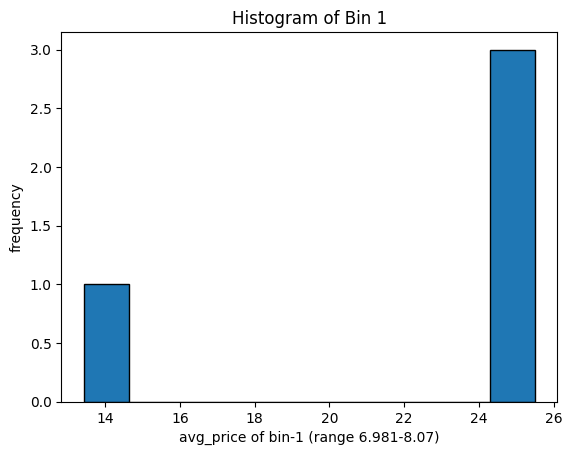

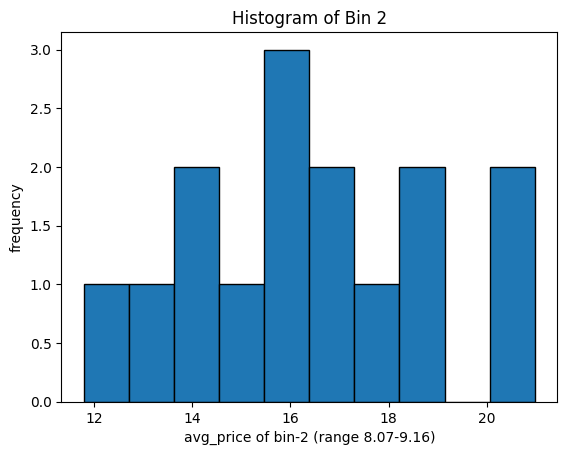

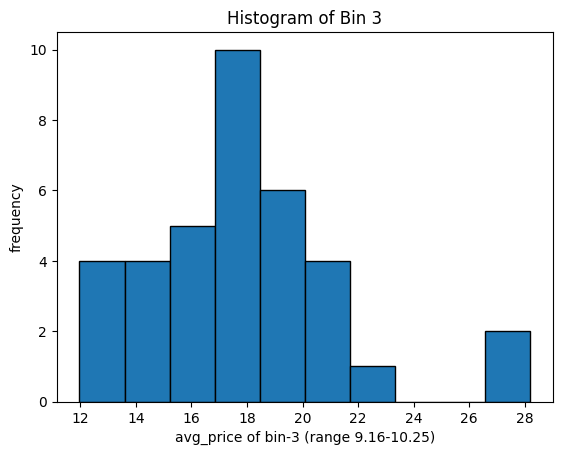

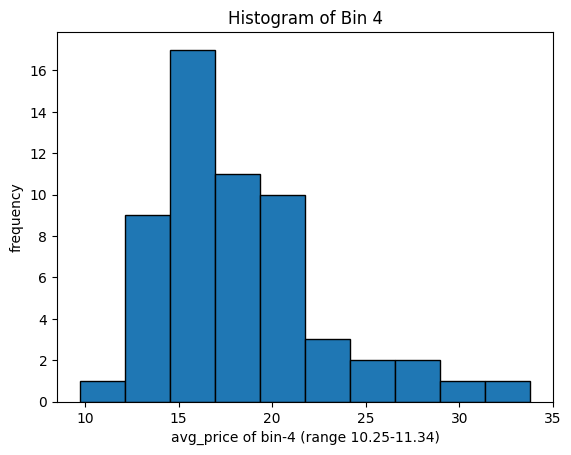

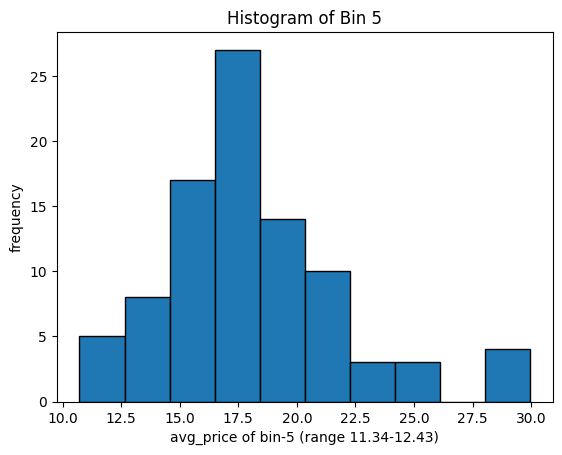

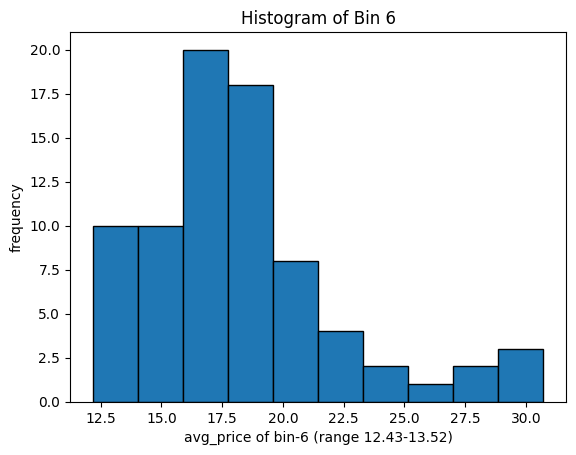

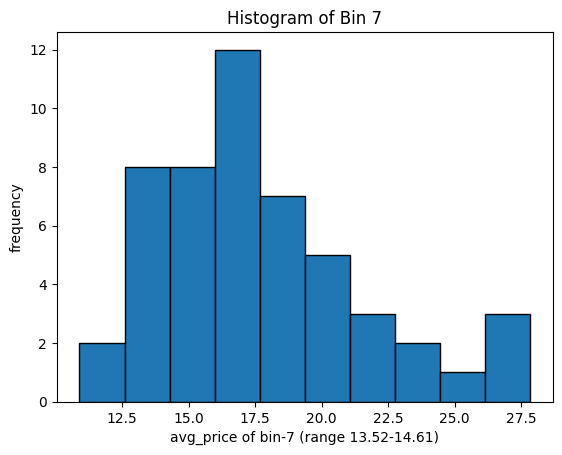

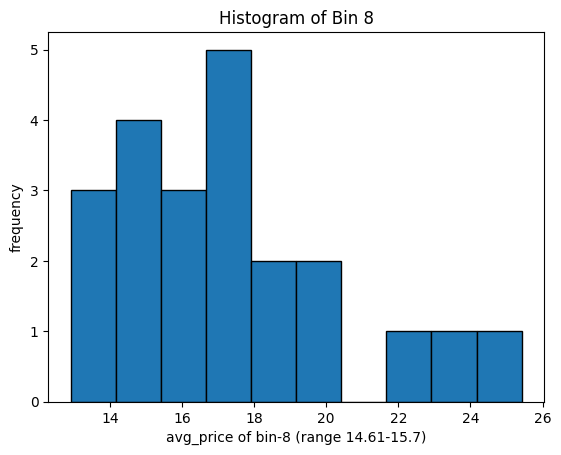

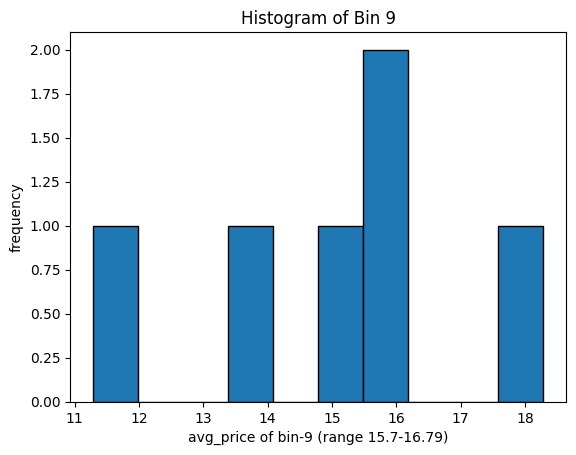

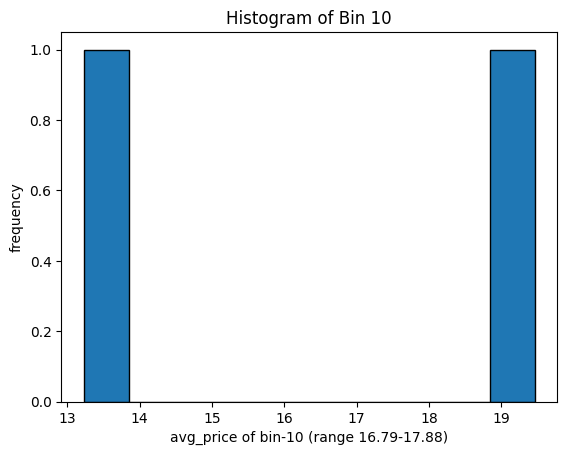

6.981
17.85
1.09


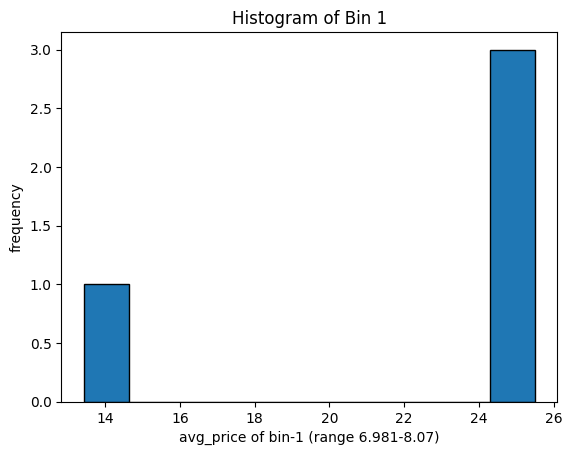

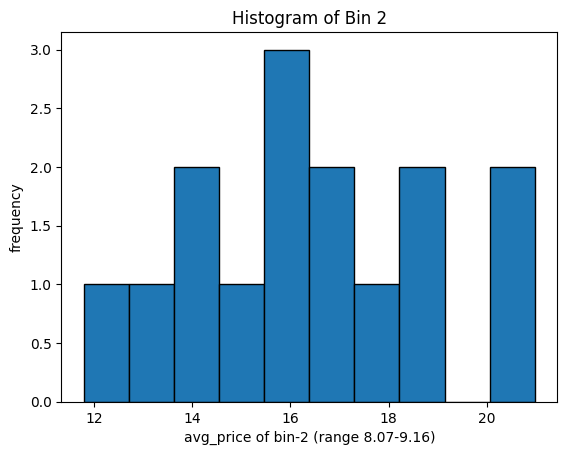

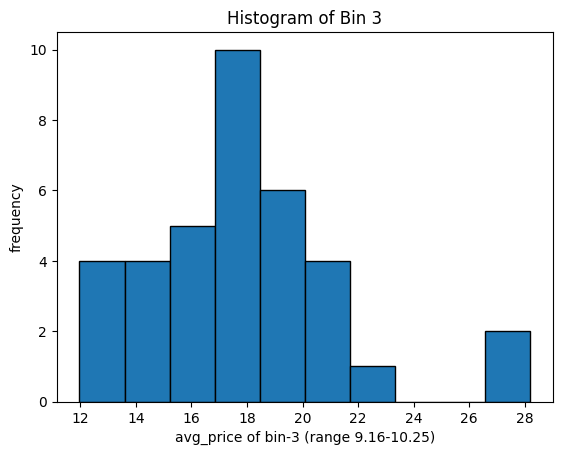

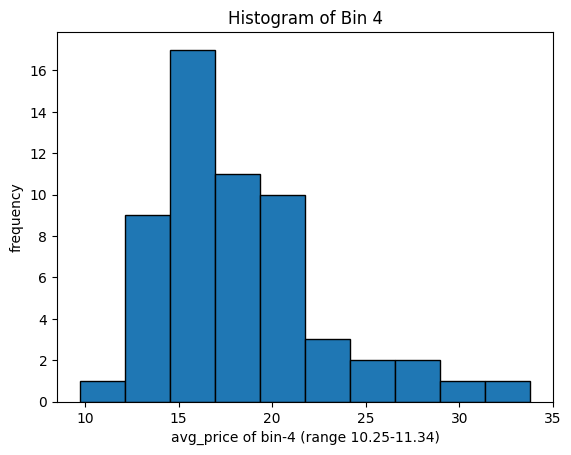

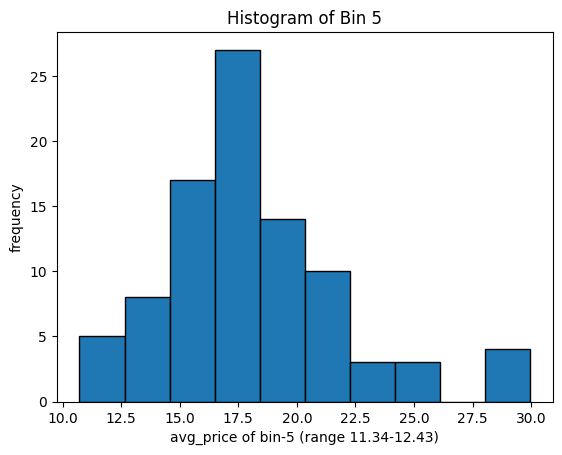

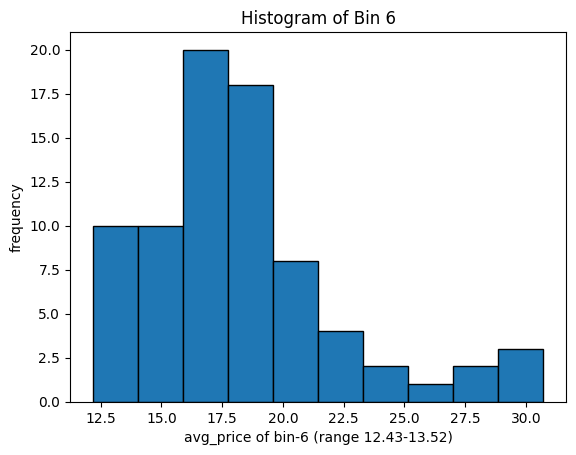

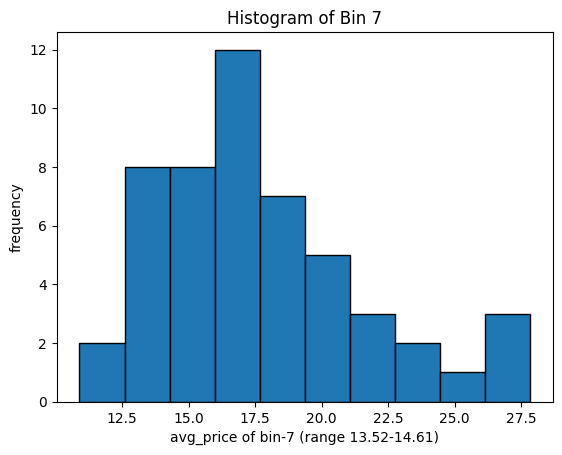

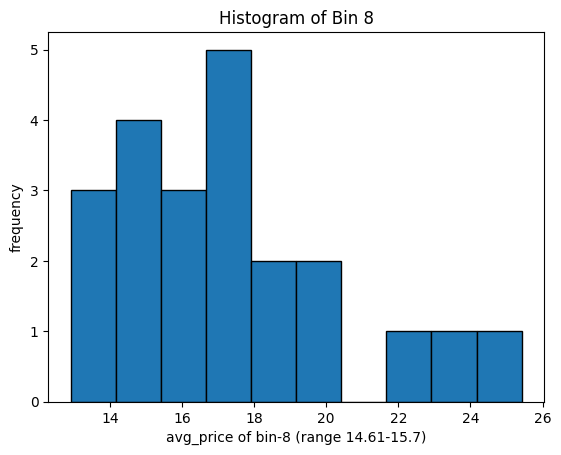

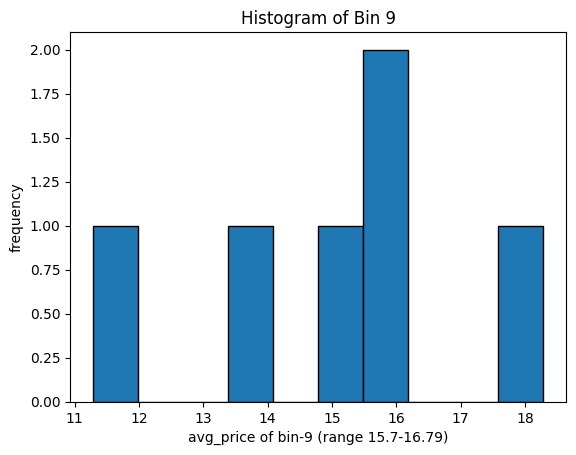

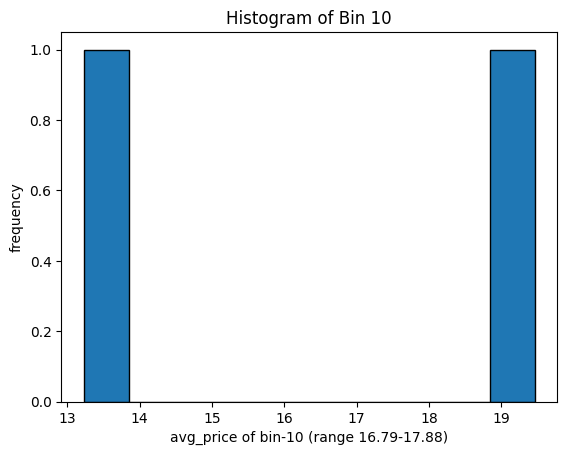

6.981
17.85
1.09


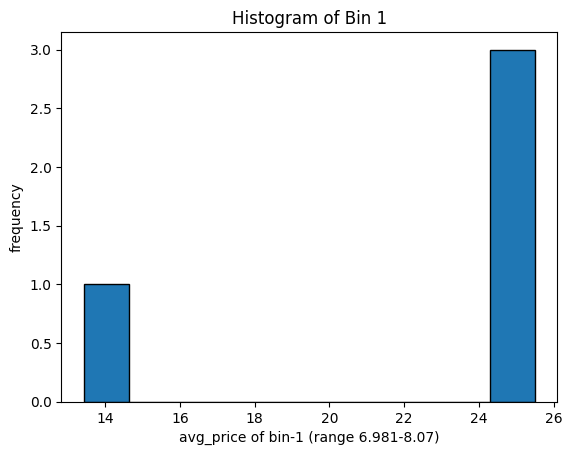

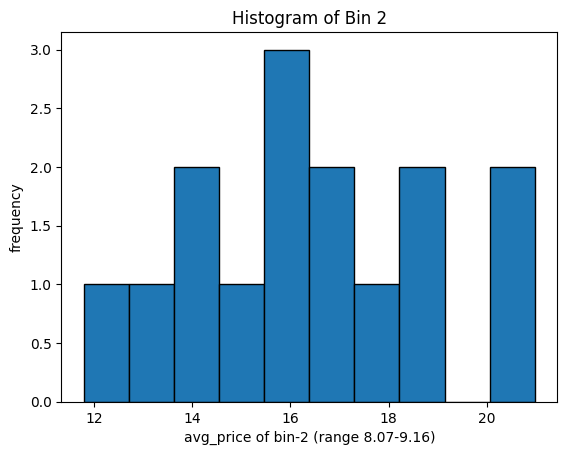

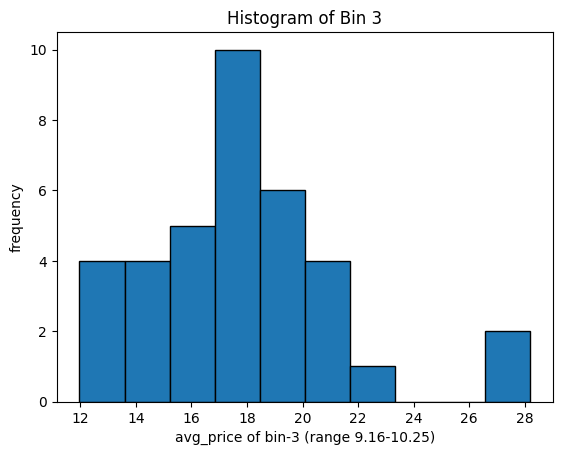

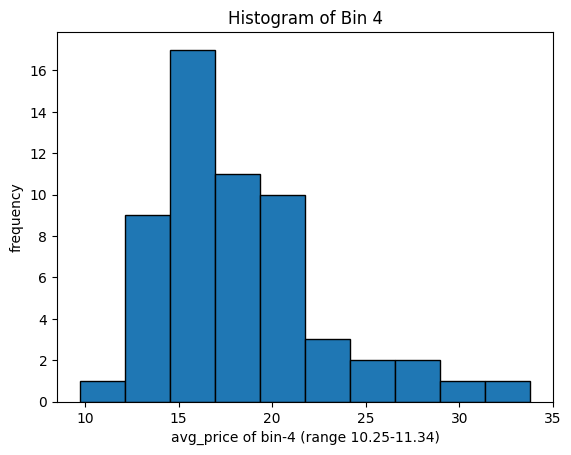

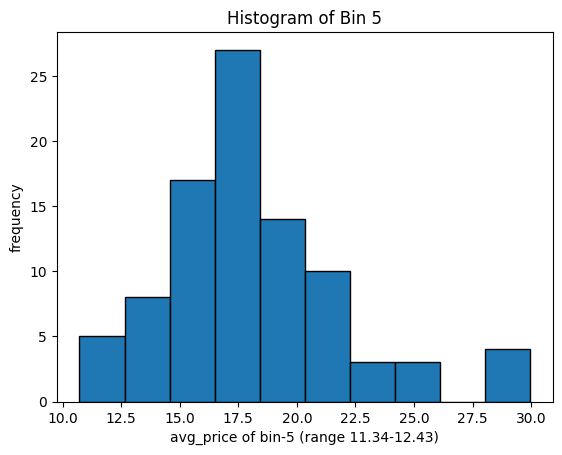

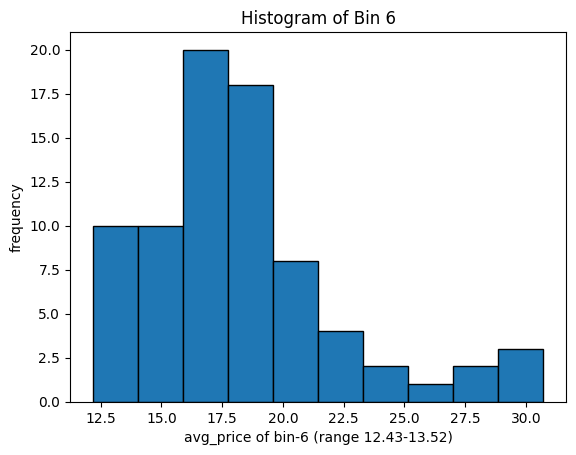

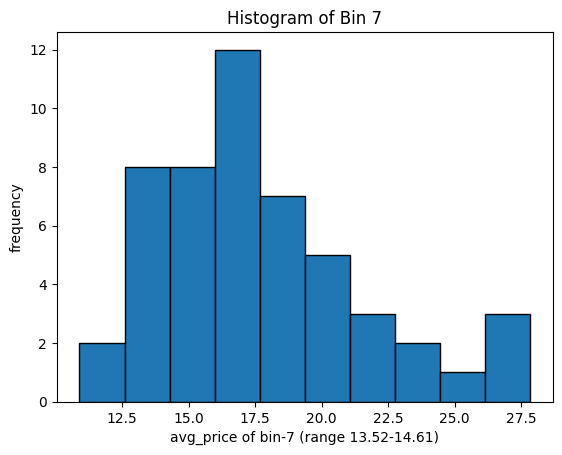

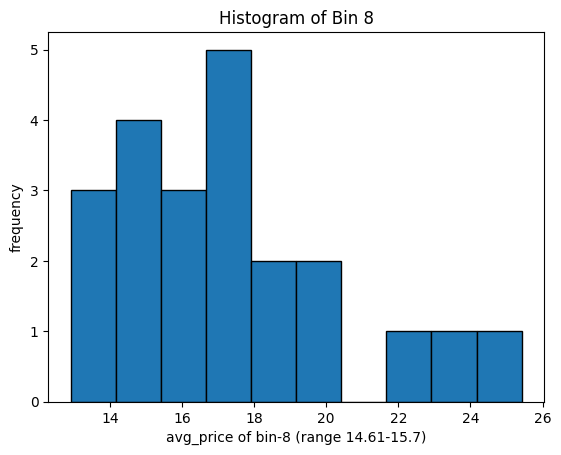

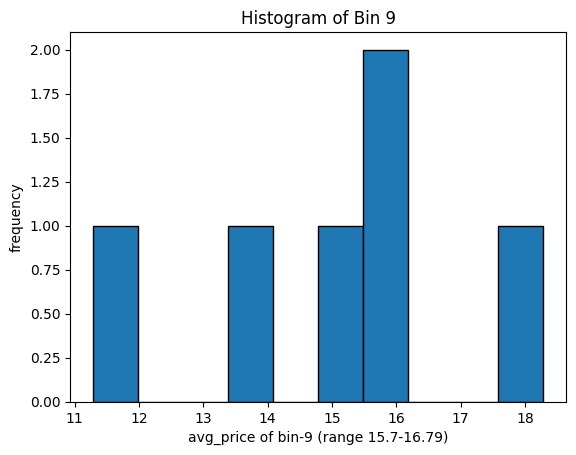

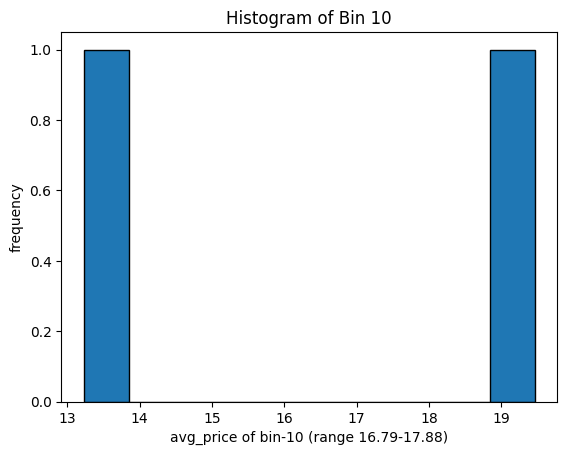

6.981
17.85
1.09


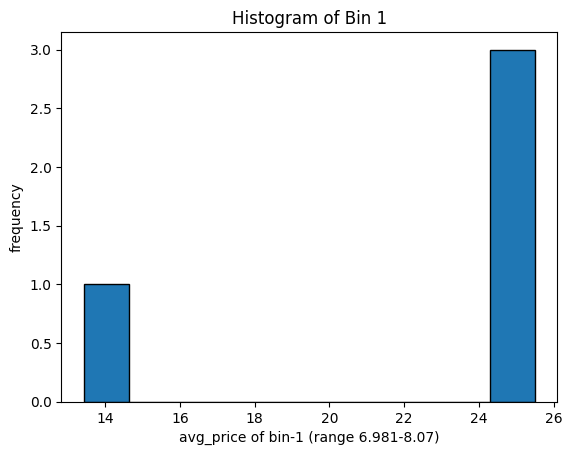

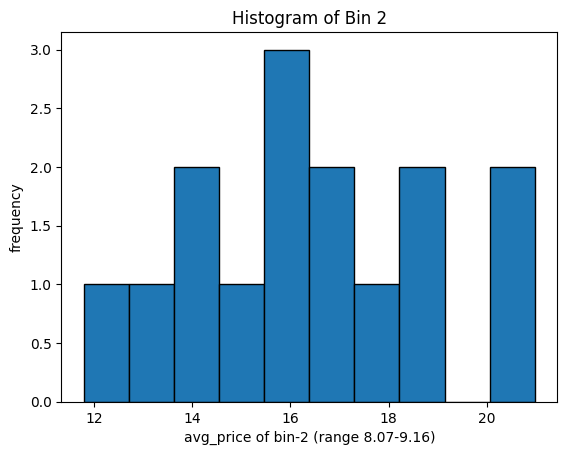

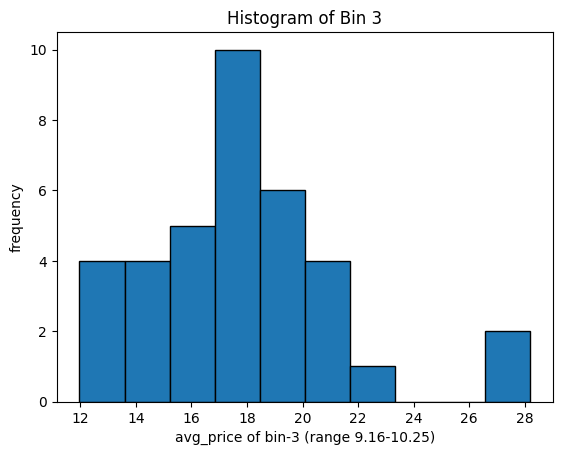

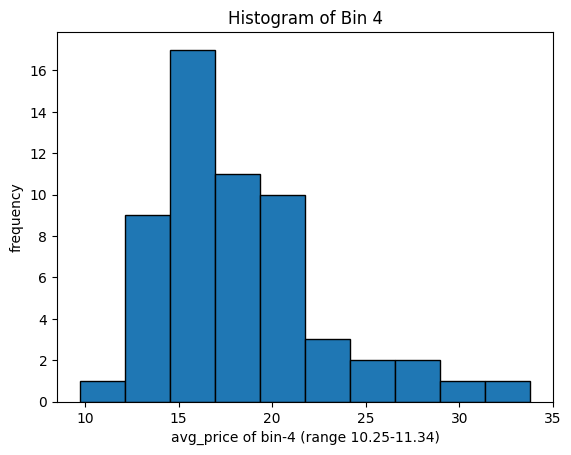

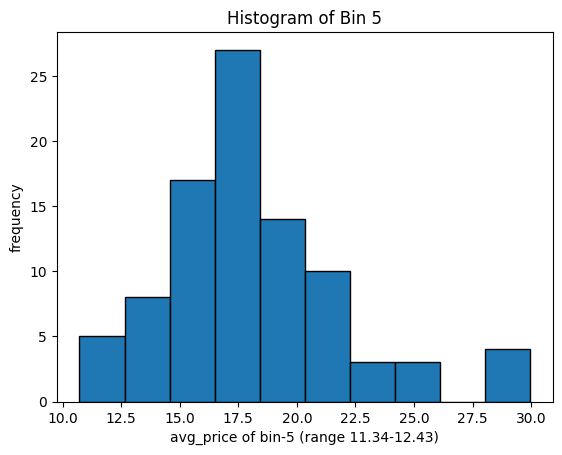

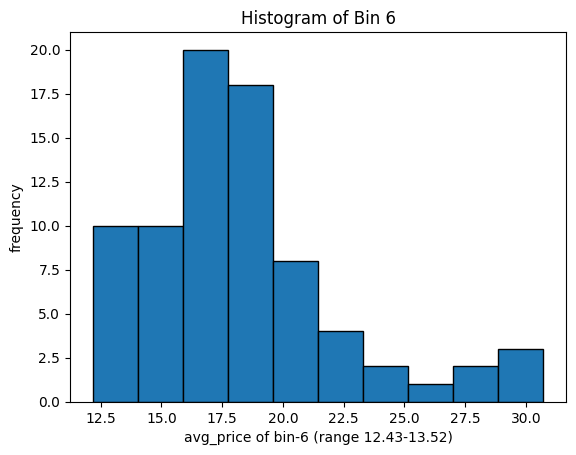

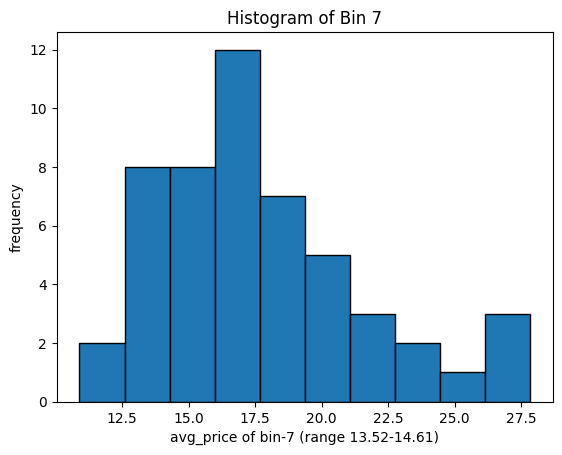

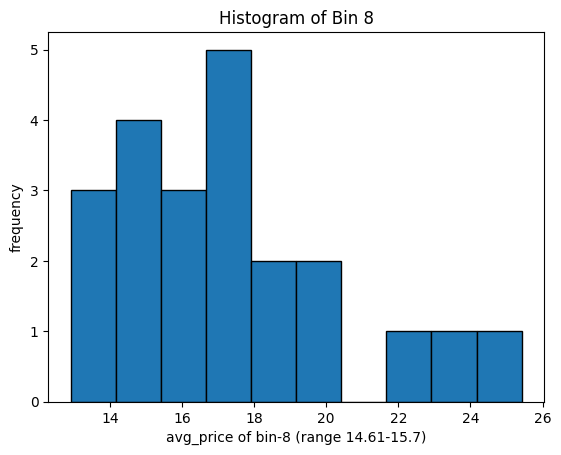

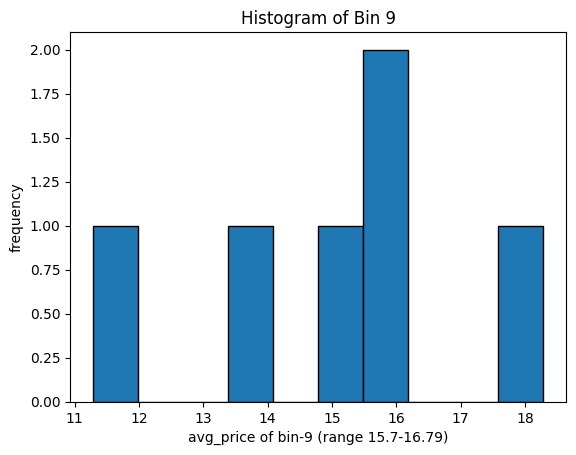

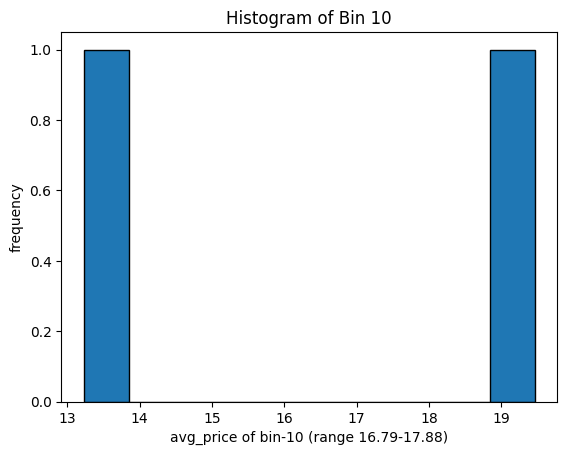

6.981
17.85
1.09


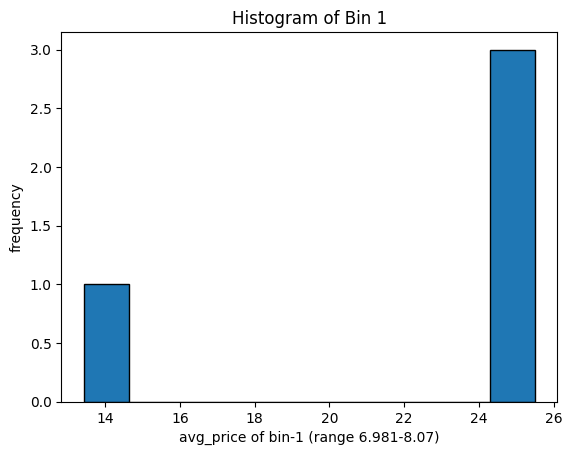

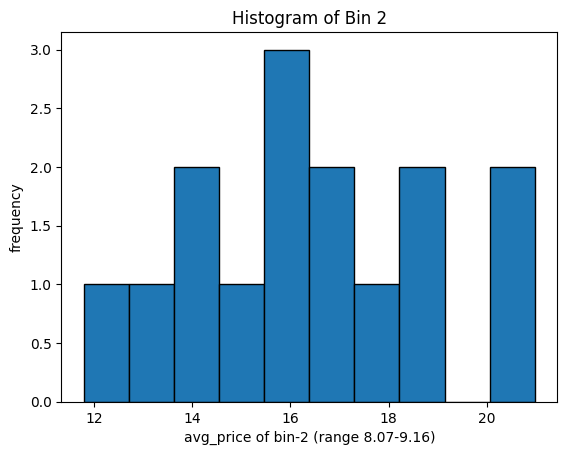

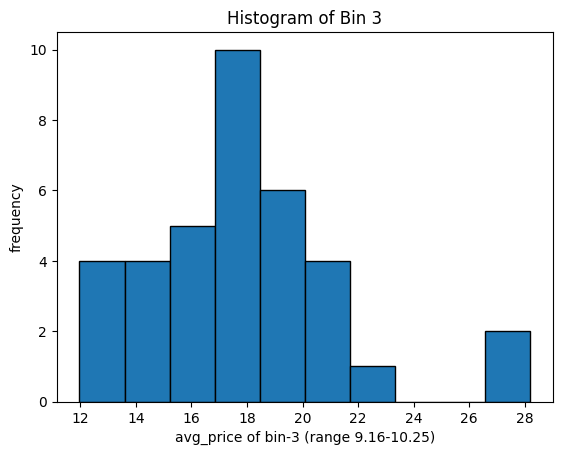

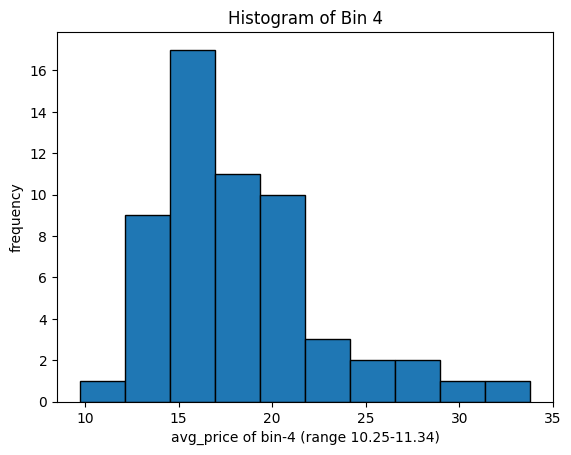

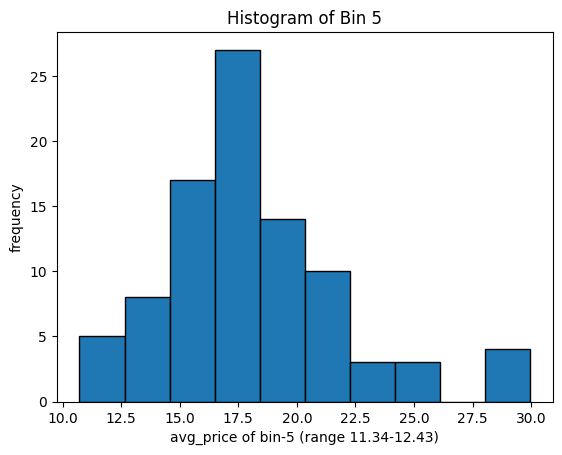

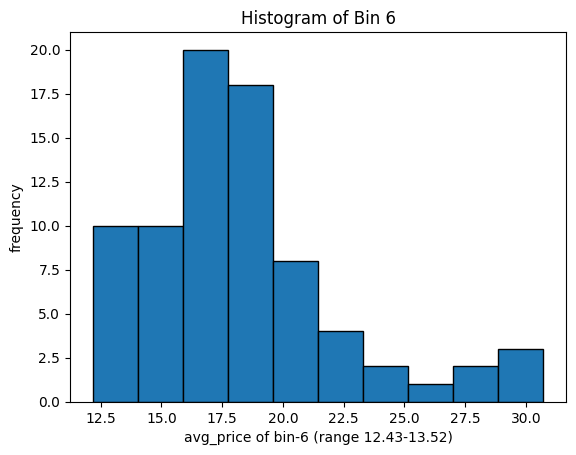

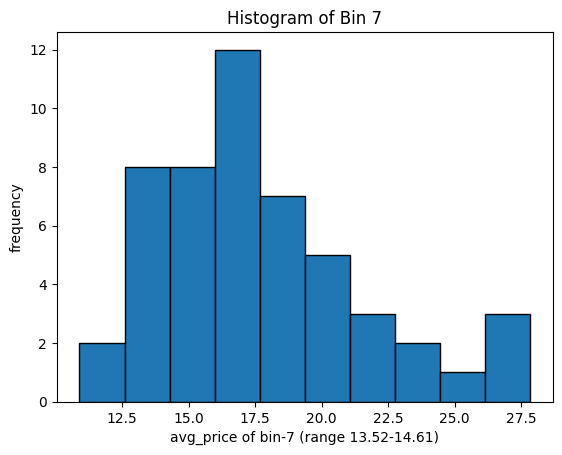

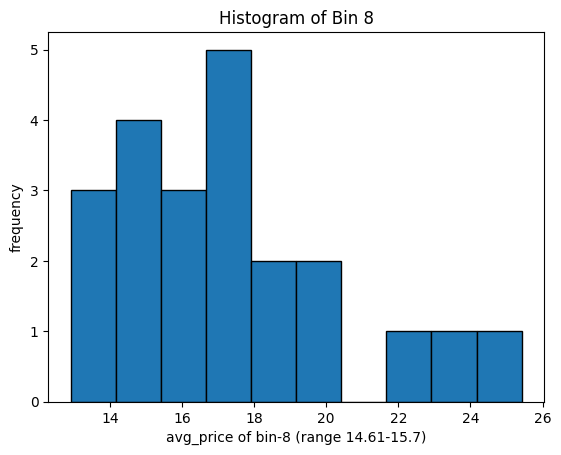

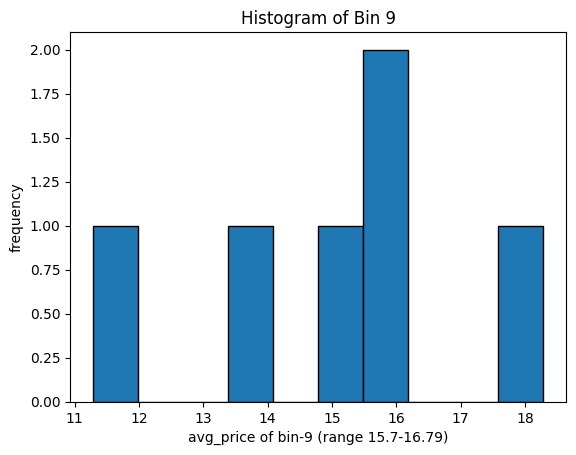

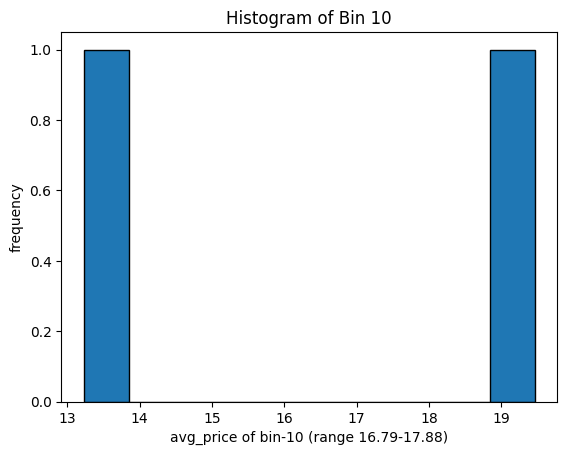

6.981
17.85
1.09


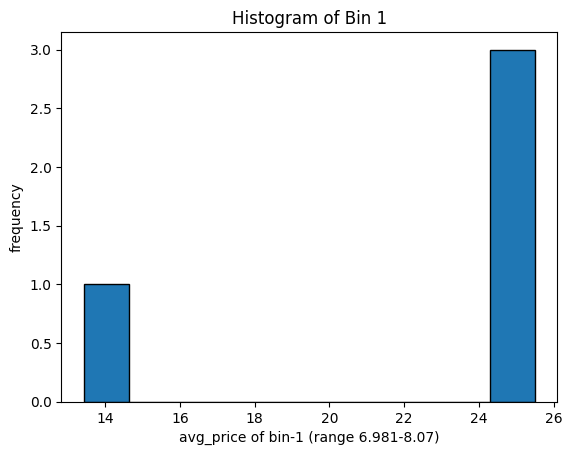

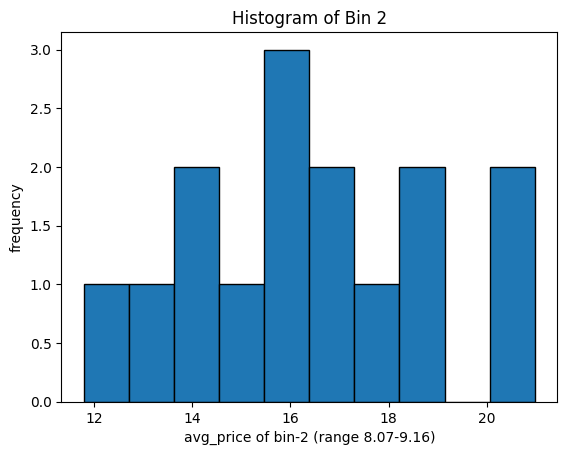

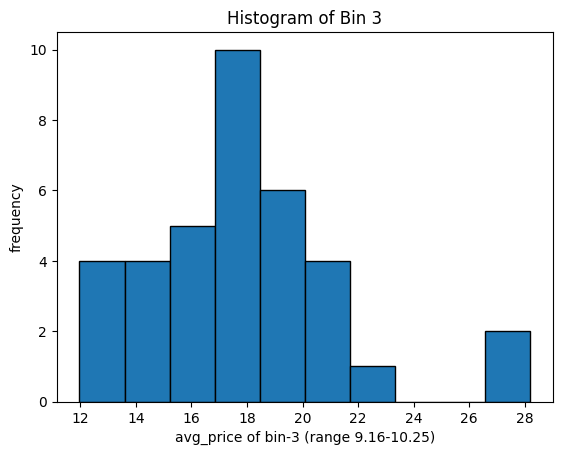

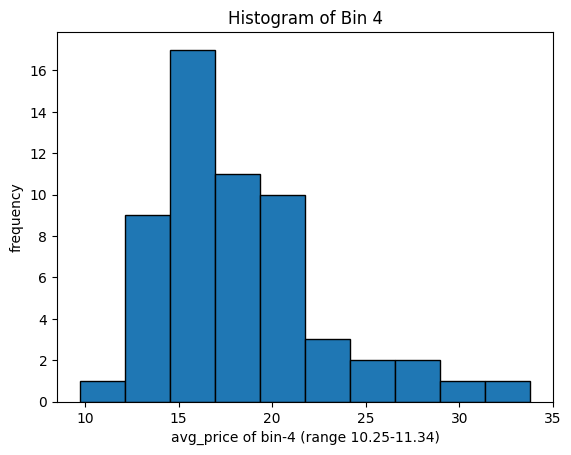

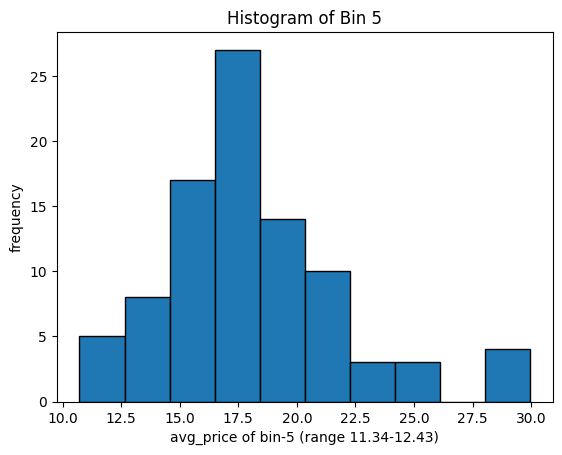

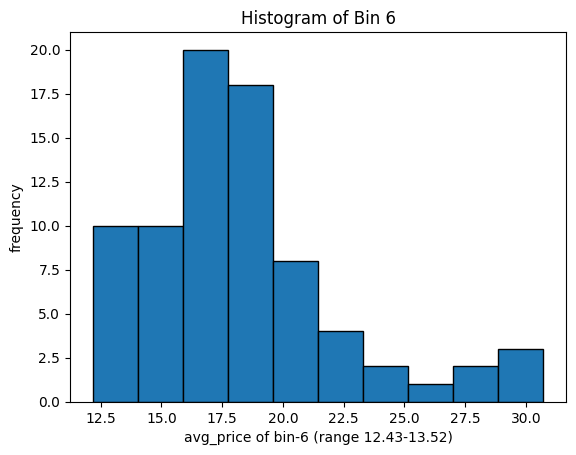

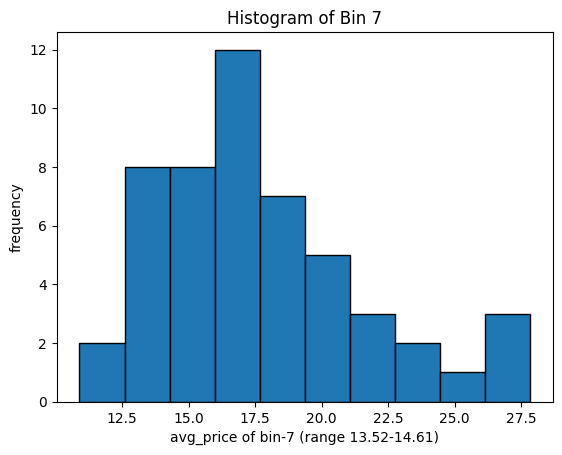

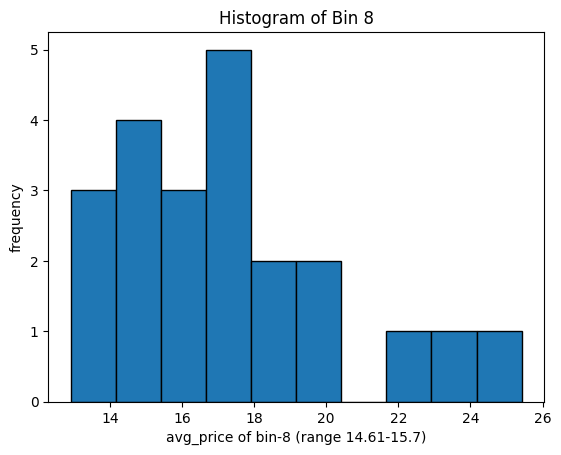

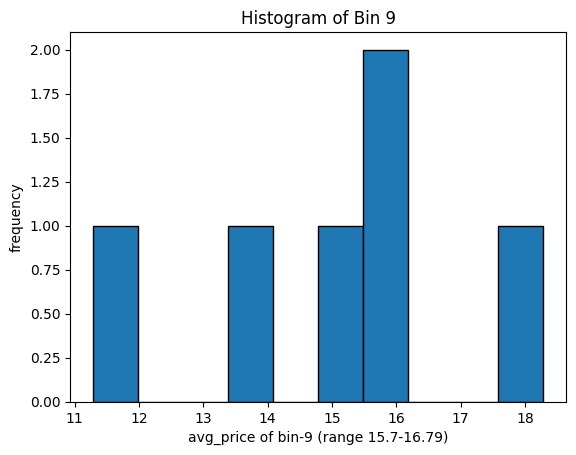

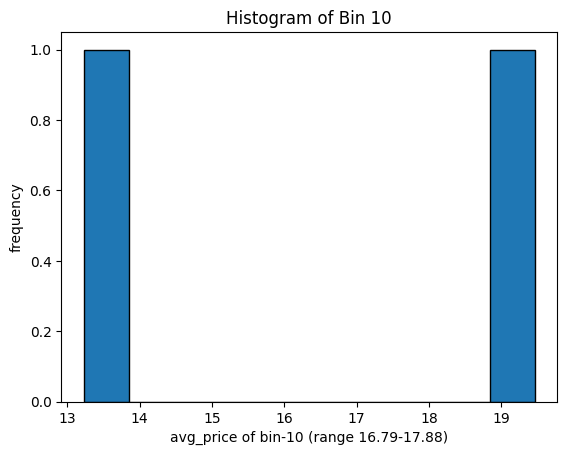

6.981
17.85
1.09


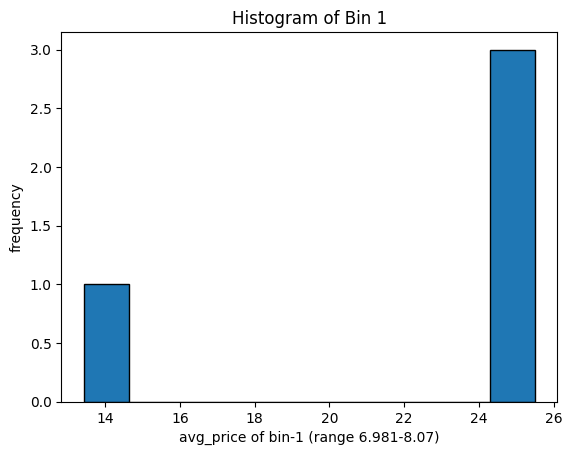

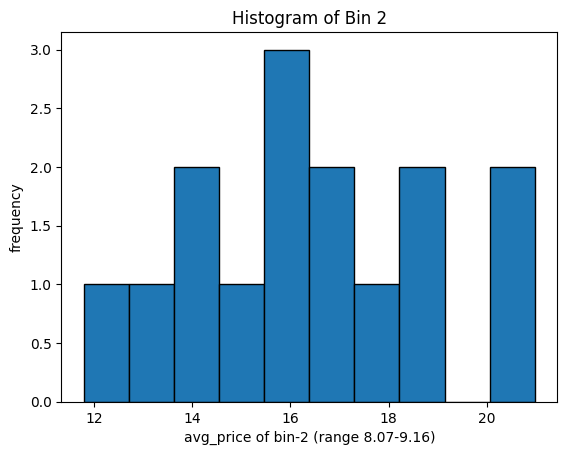

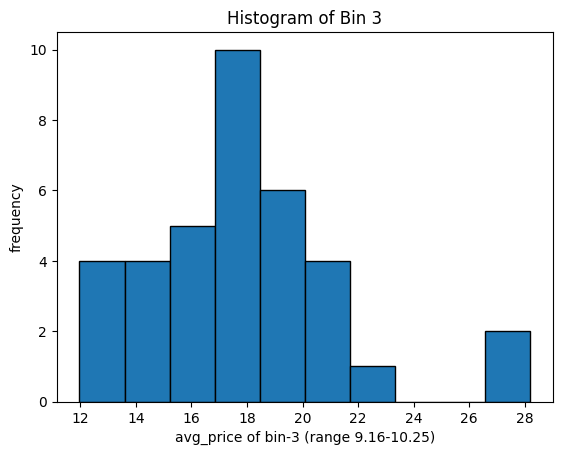

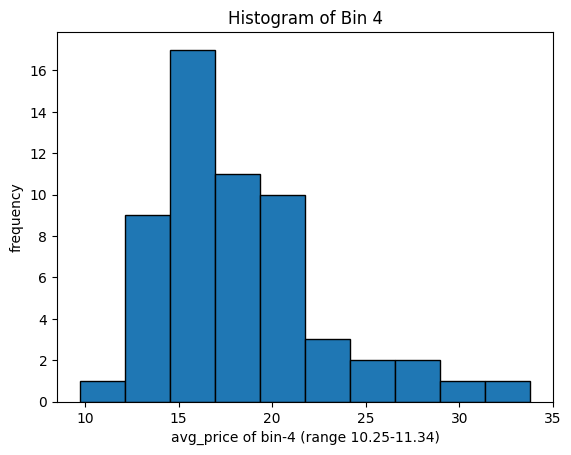

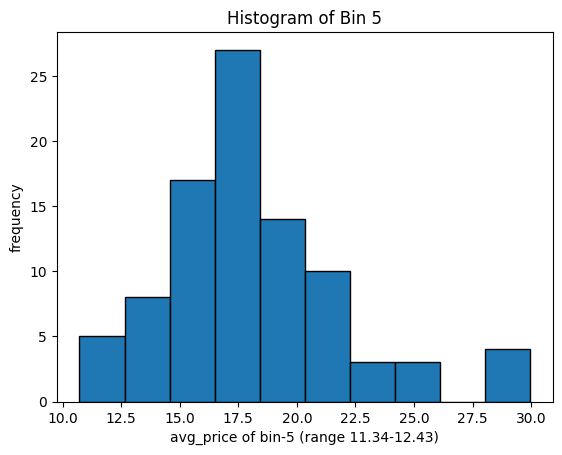

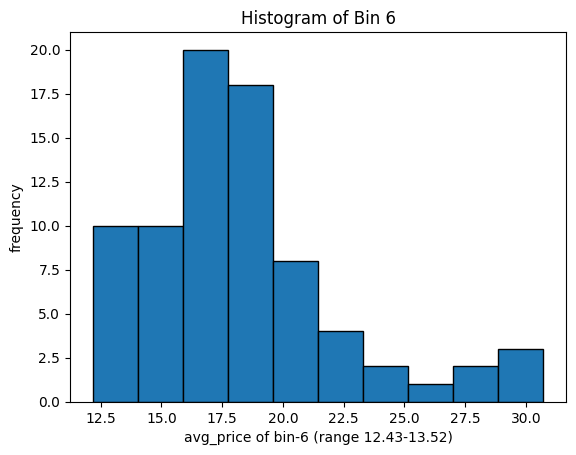

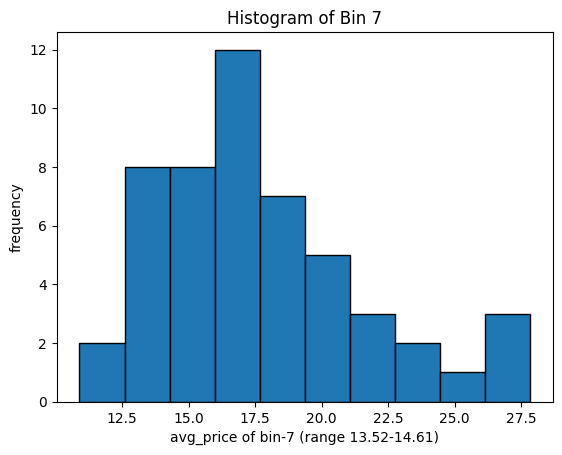

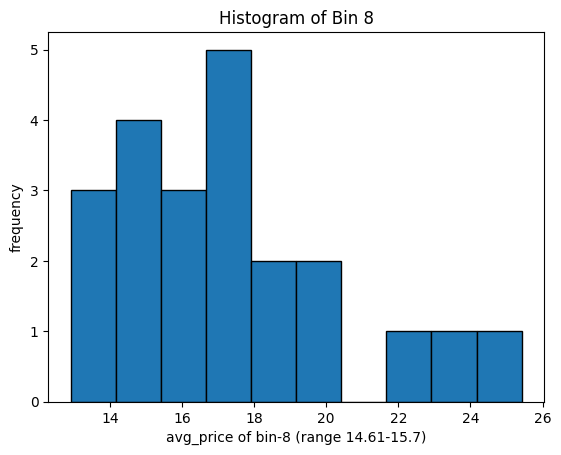

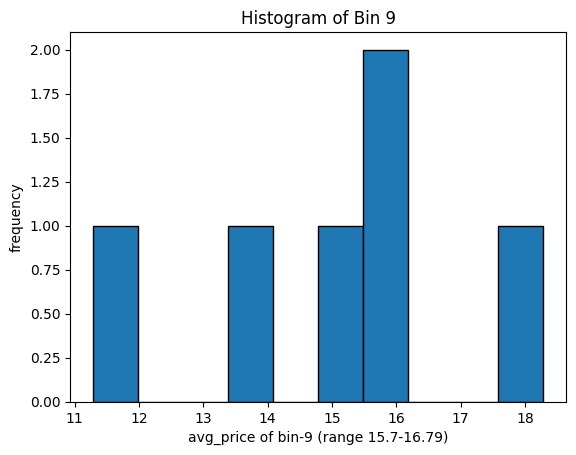

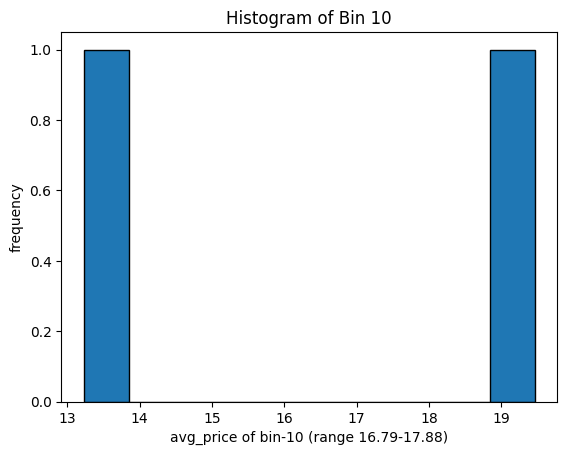

6.981
17.85
1.09


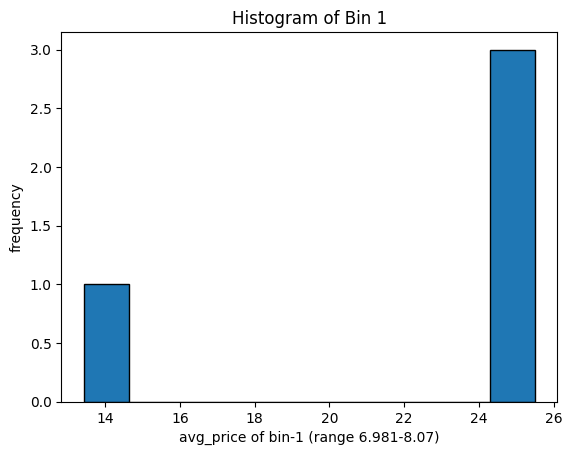

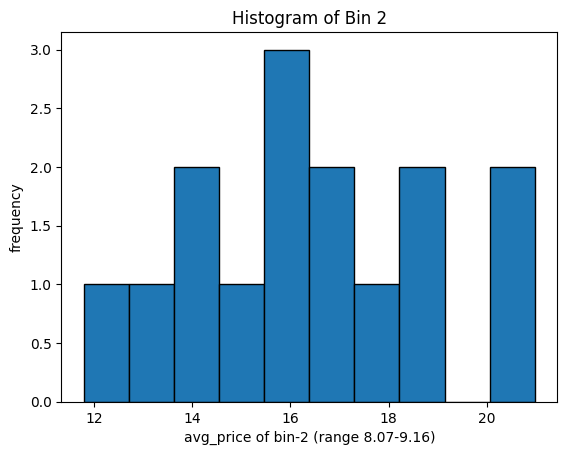

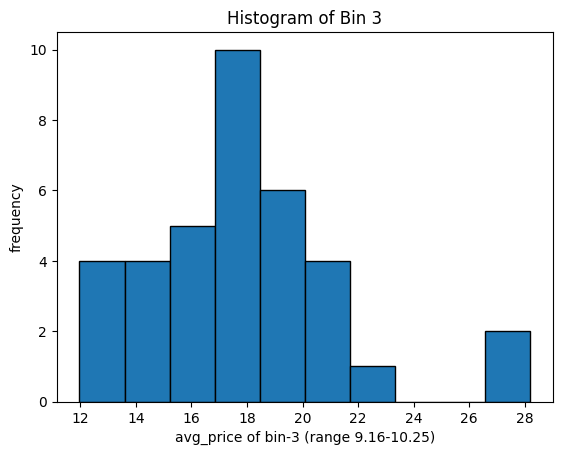

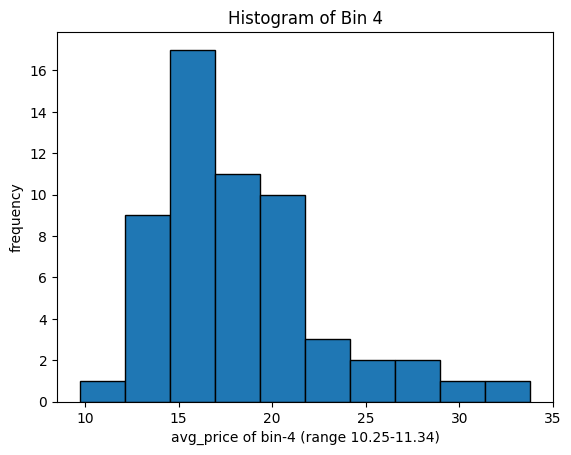

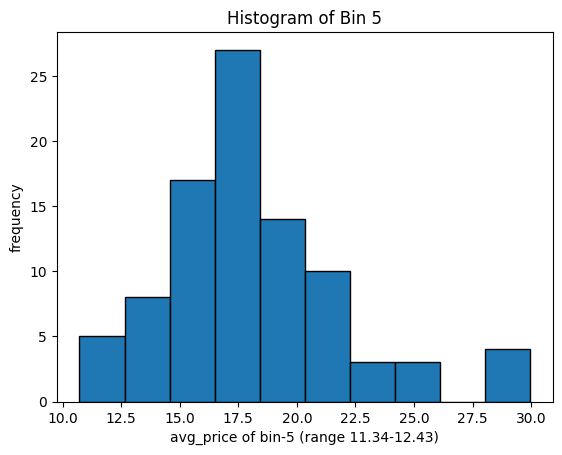

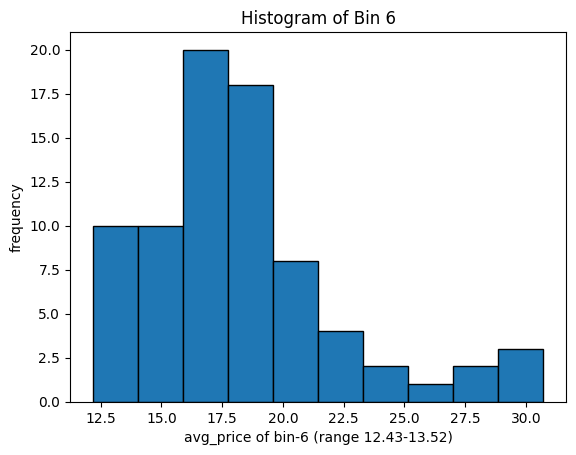

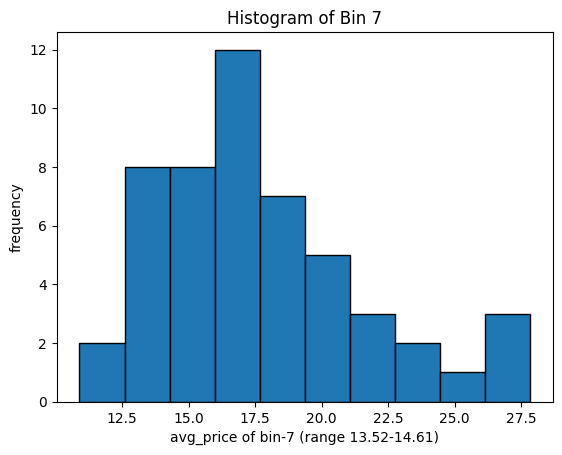

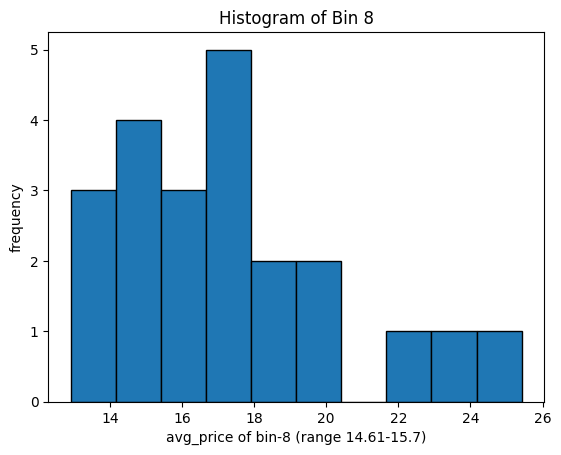

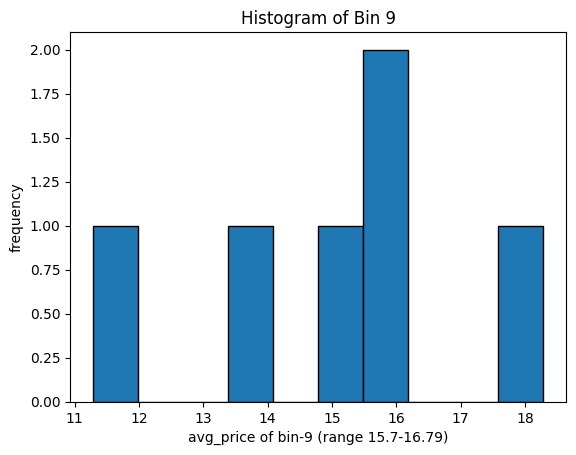

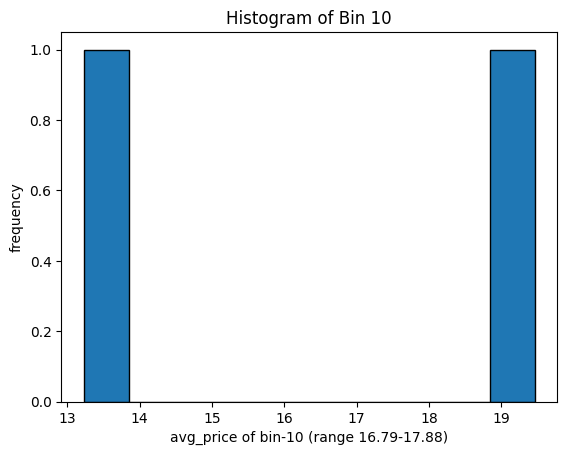

6.981
17.85
1.09


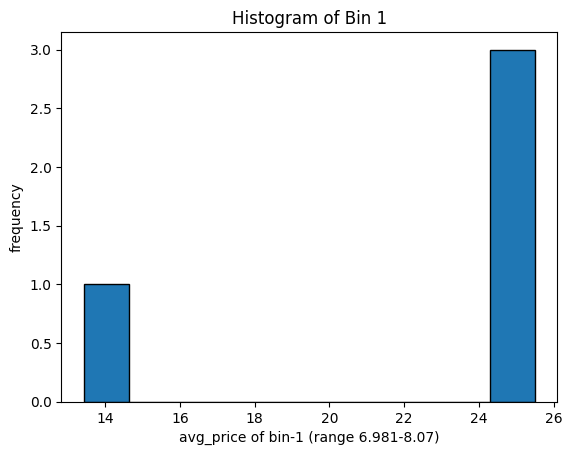

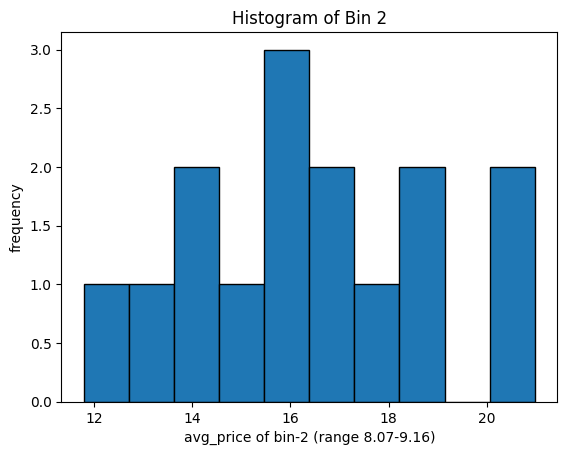

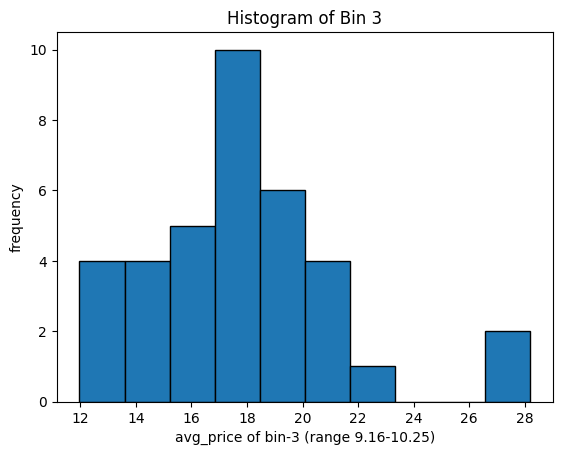

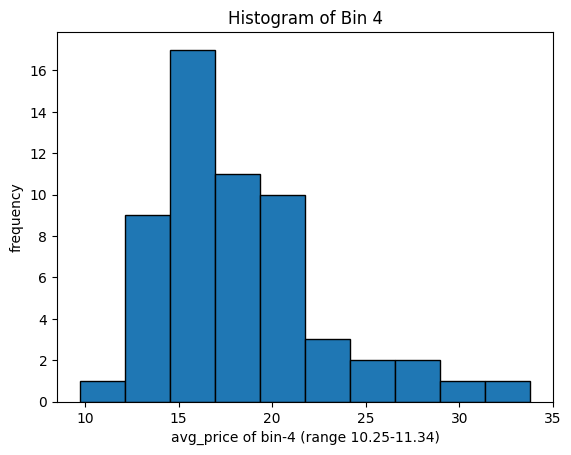

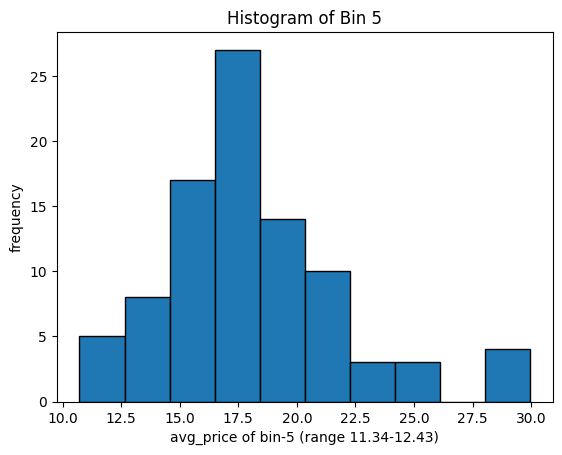

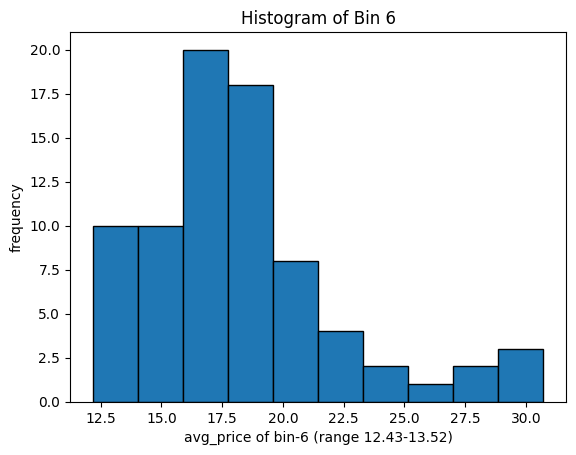

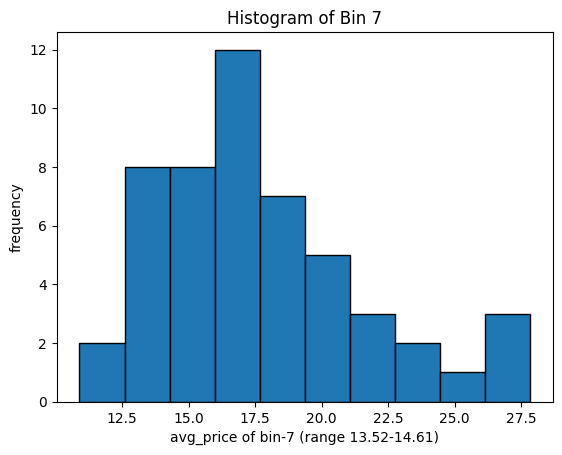

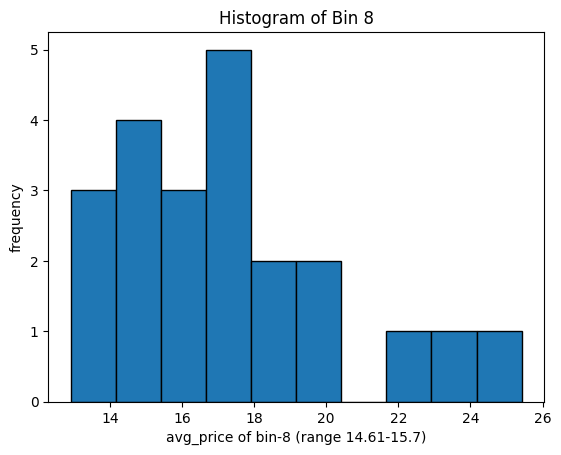

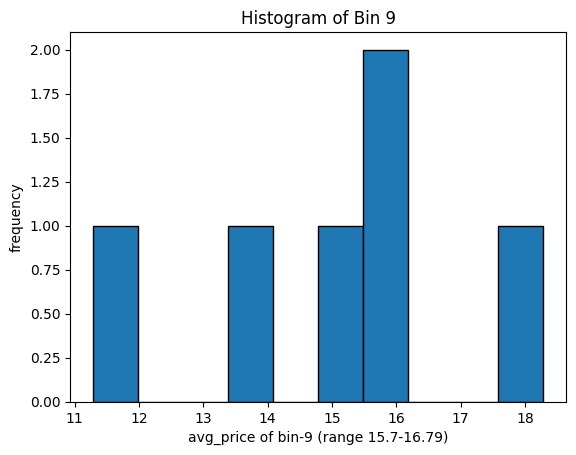

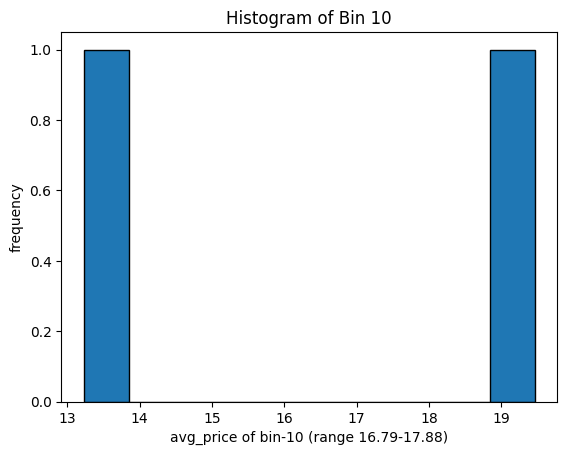

6.981
17.85
1.09


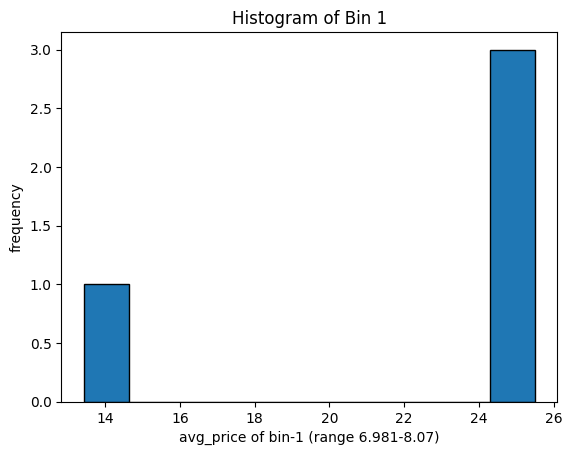

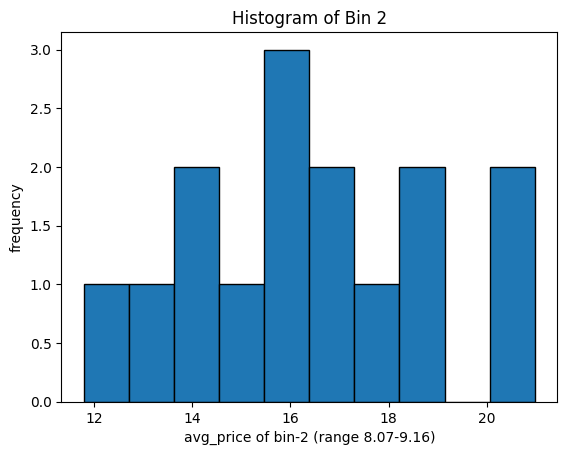

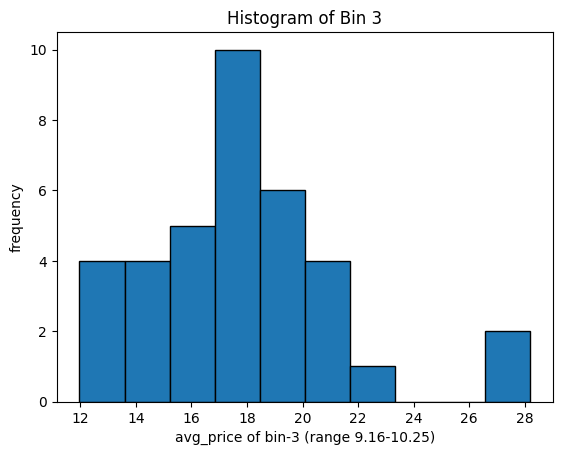

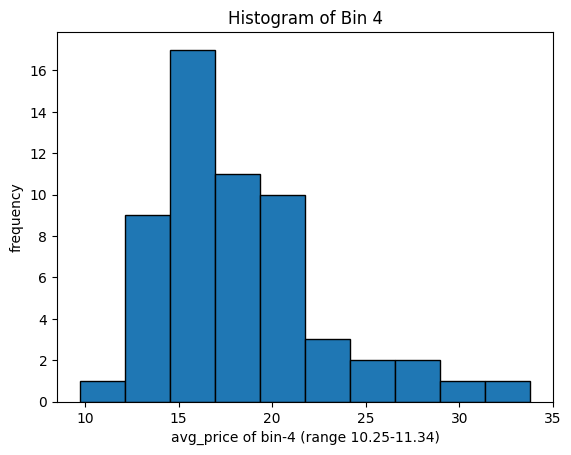

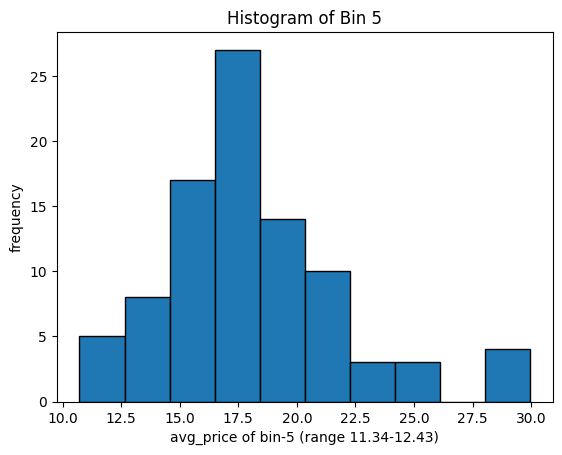

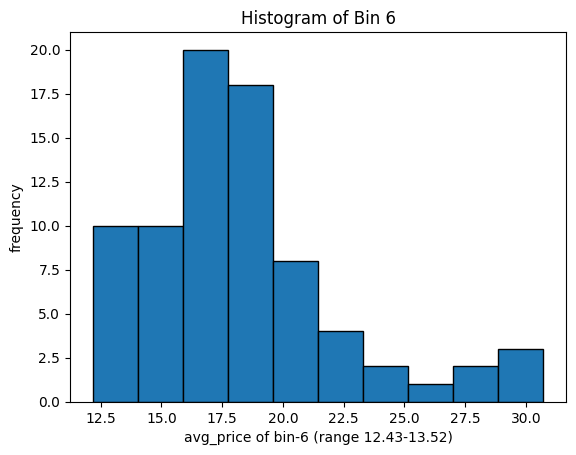

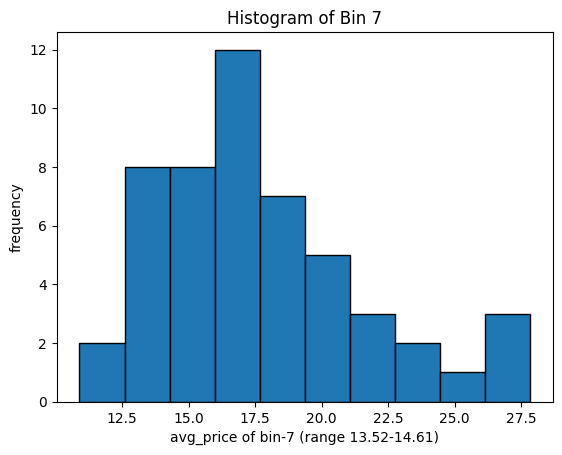

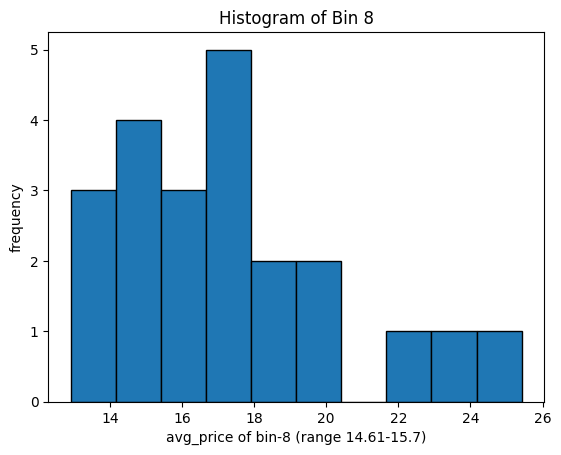

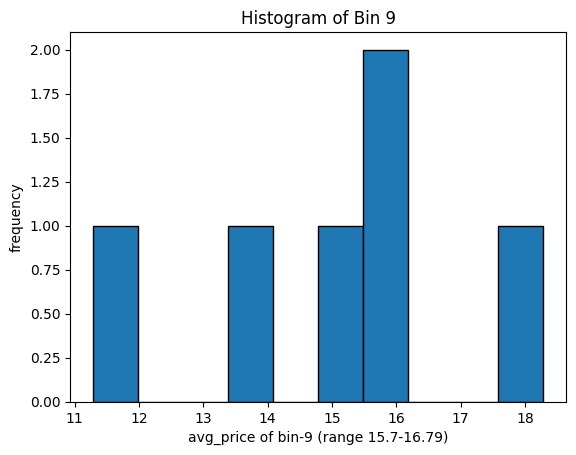

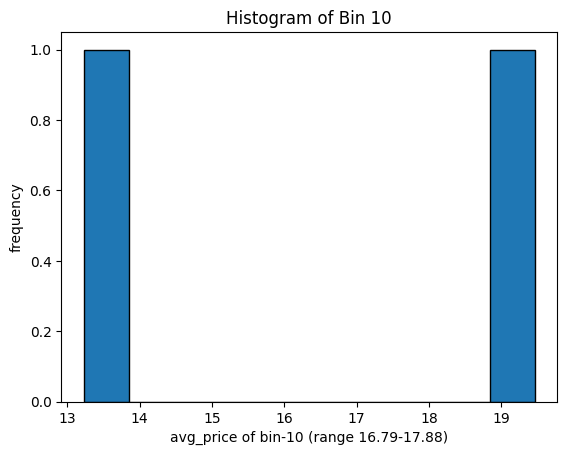

6.981
17.85
1.09


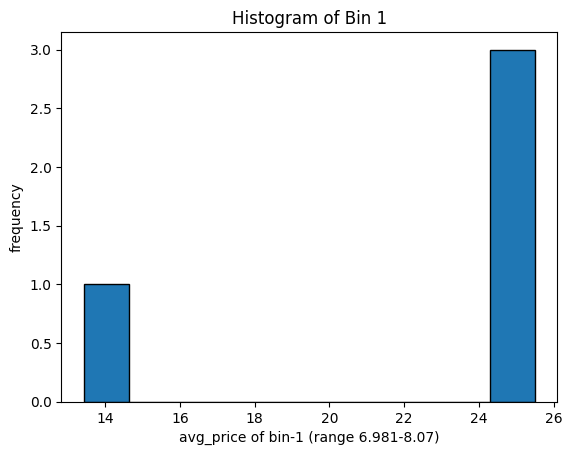

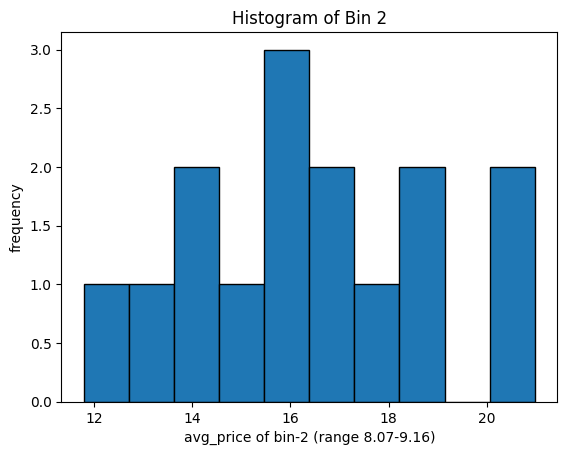

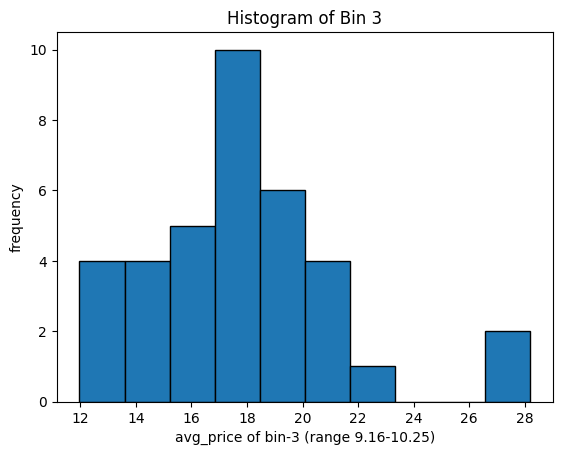

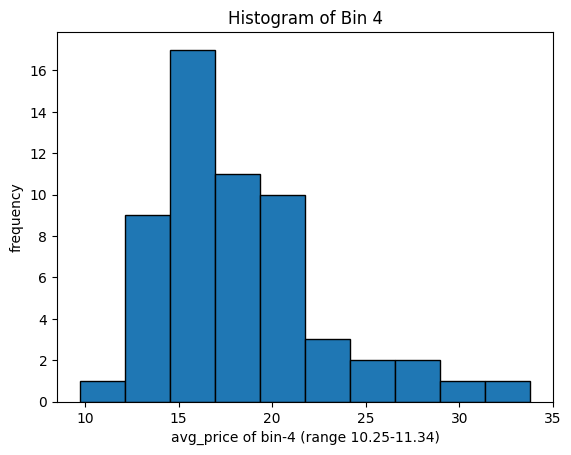

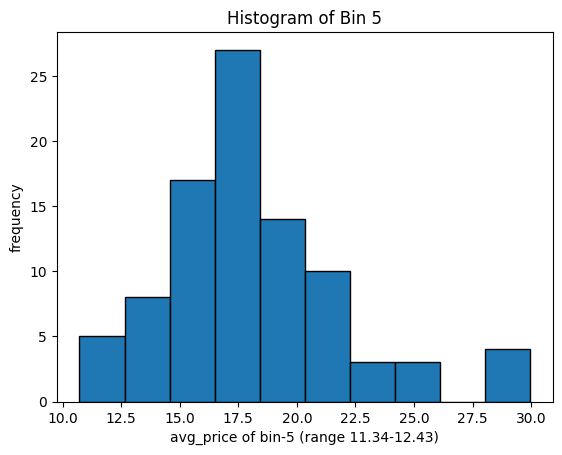

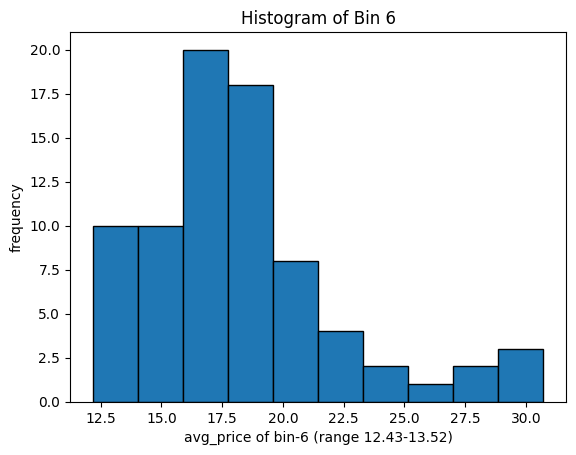

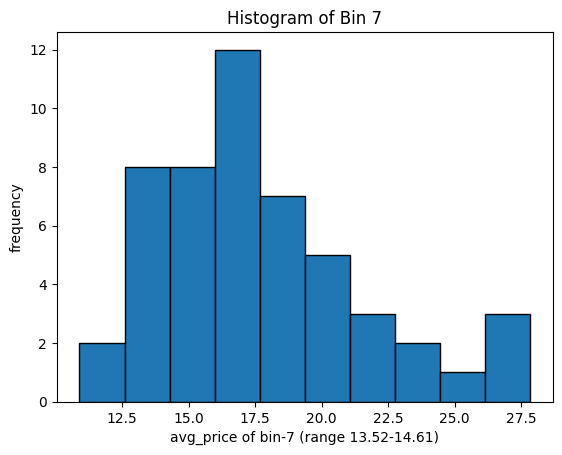

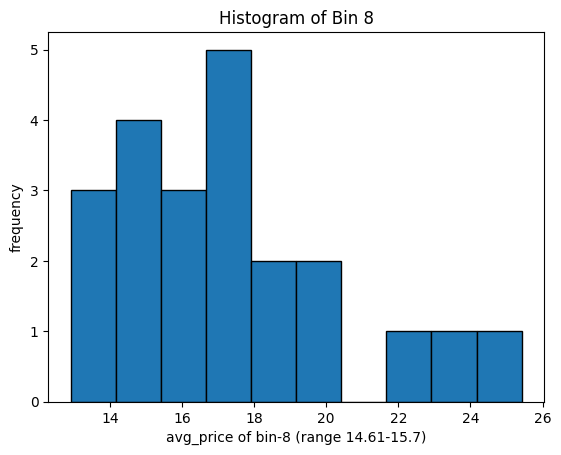

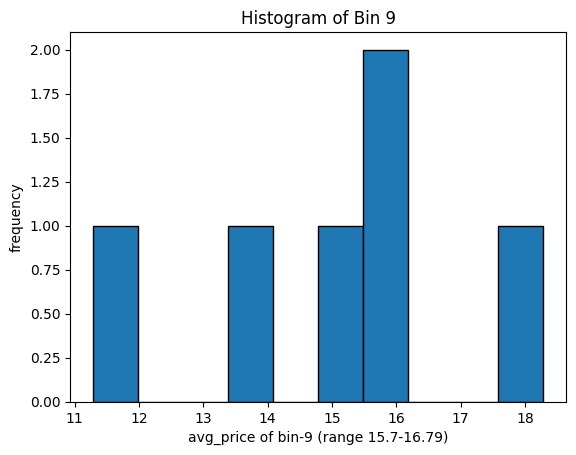

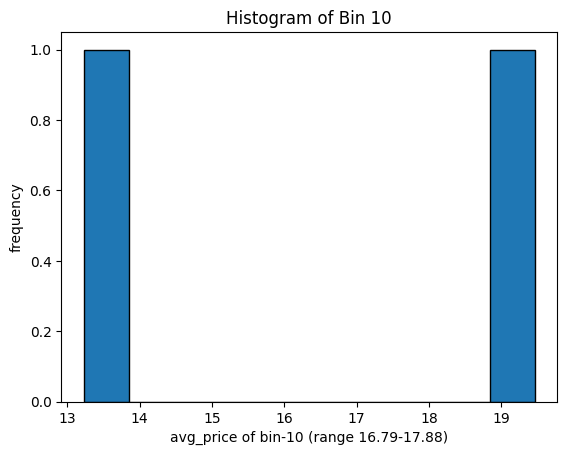

6.981
17.85
1.09


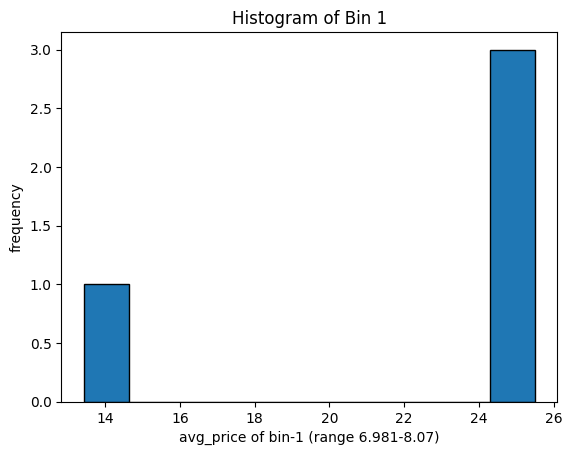

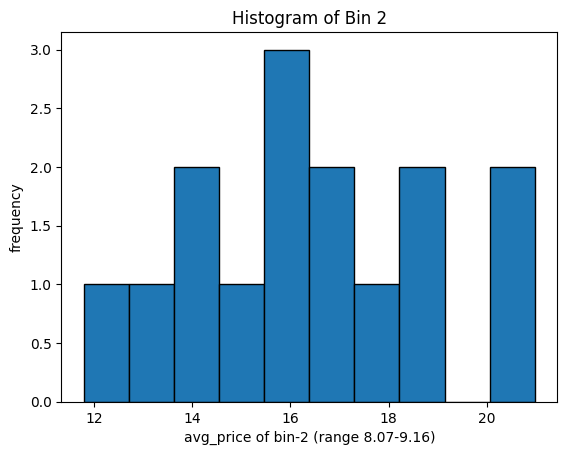

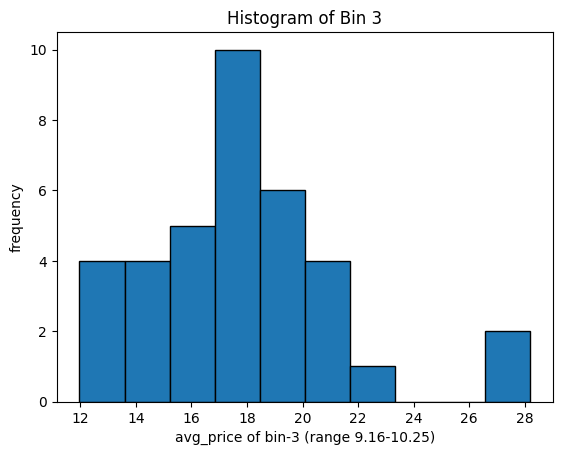

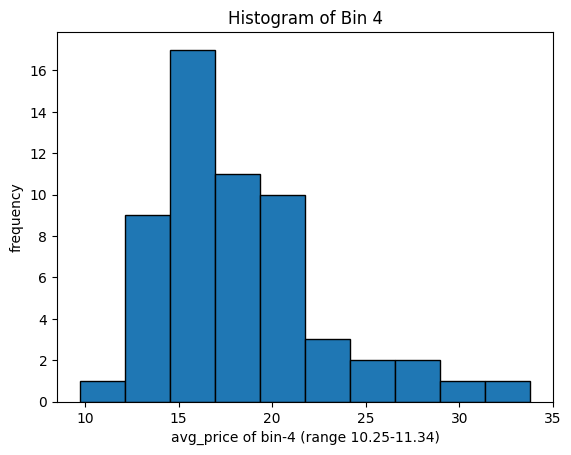

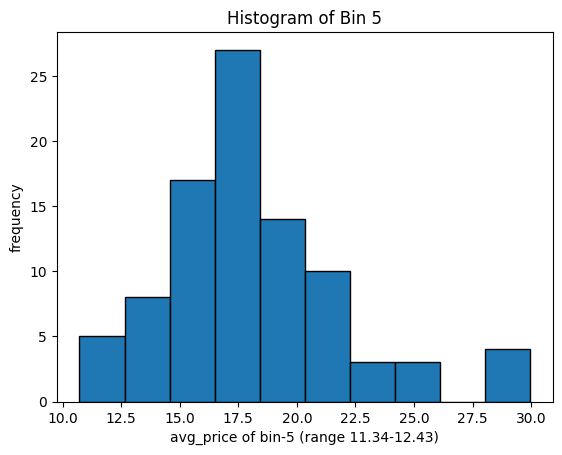

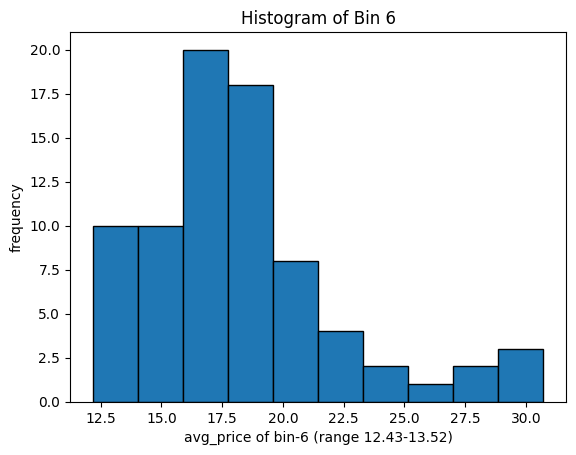

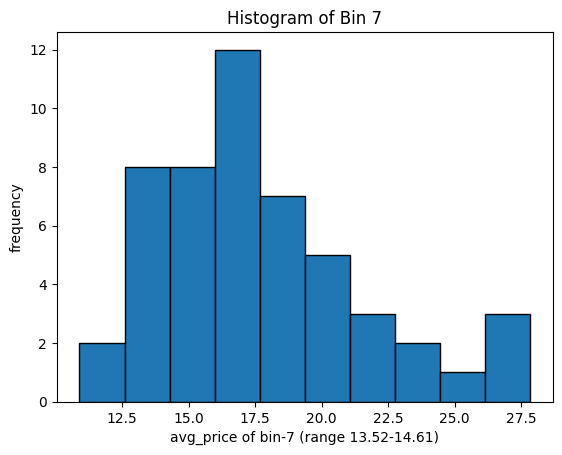

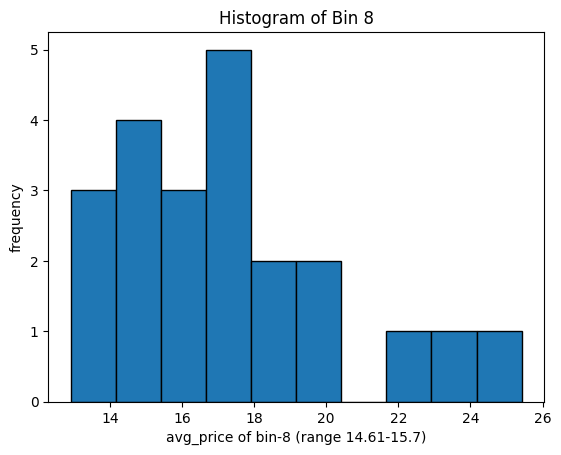

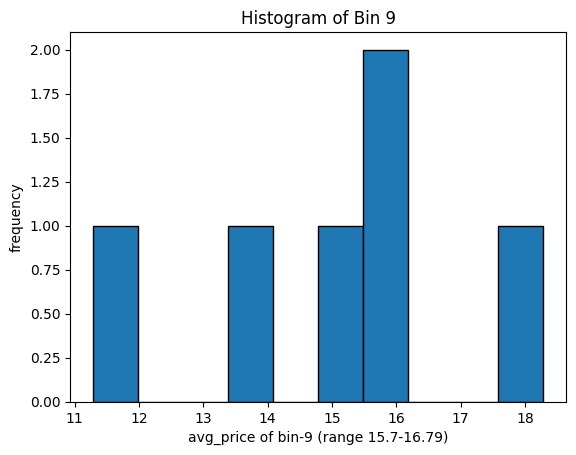

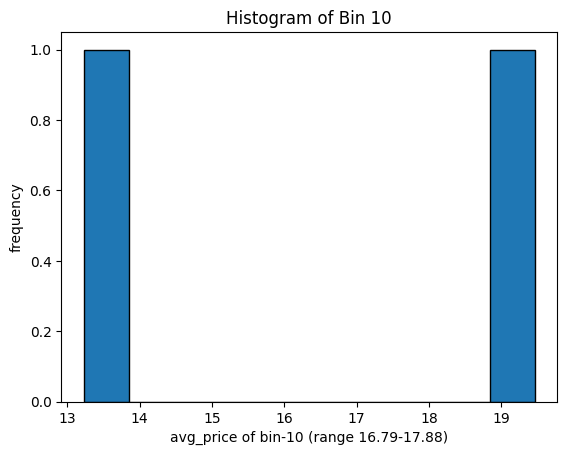

6.981
17.85
1.09


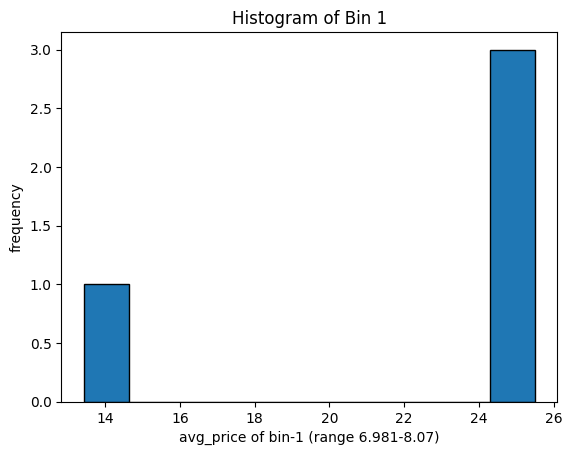

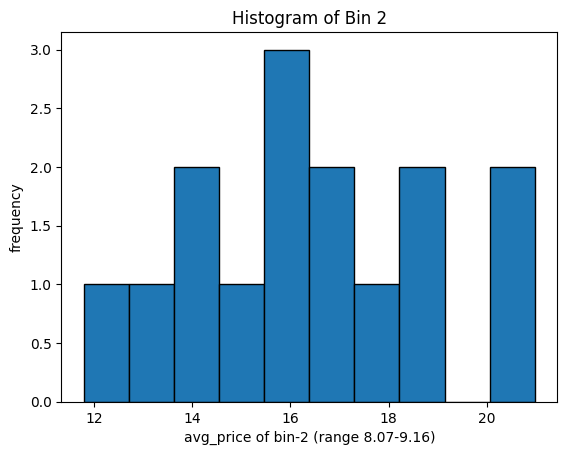

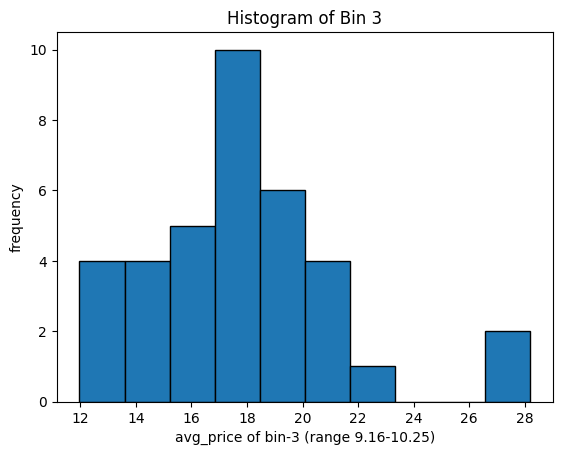

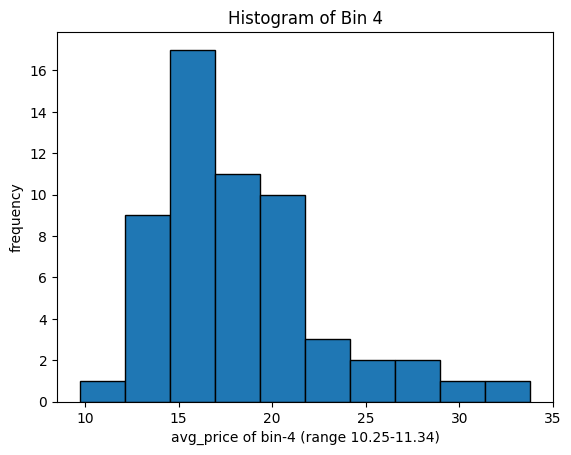

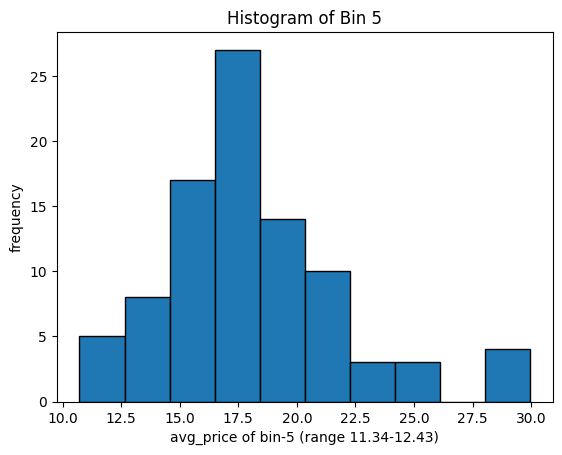

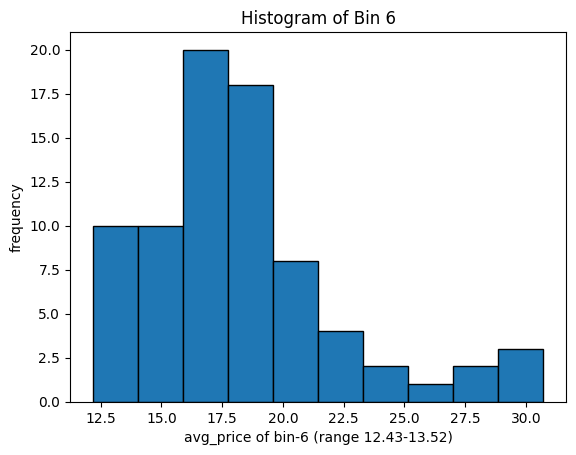

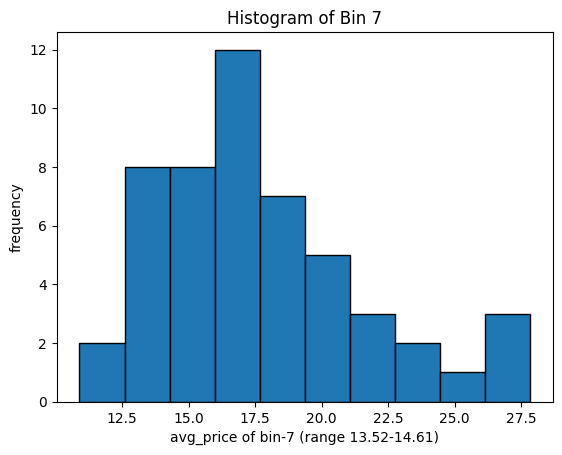

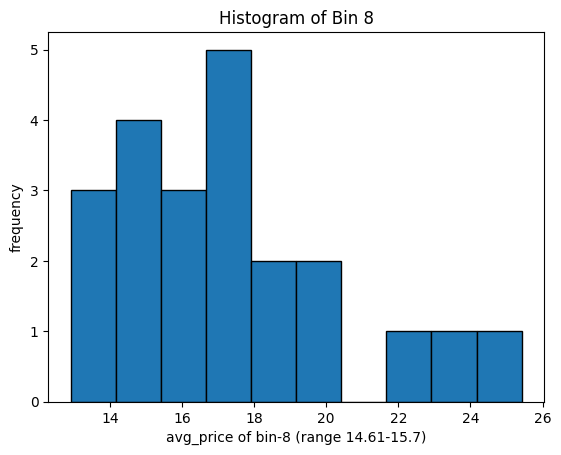

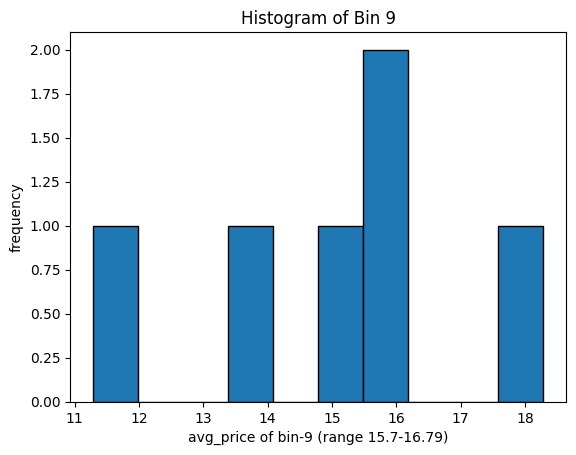

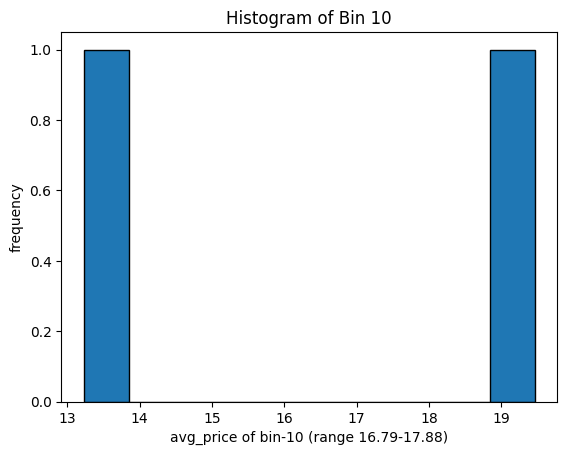

6.981
17.85
1.09


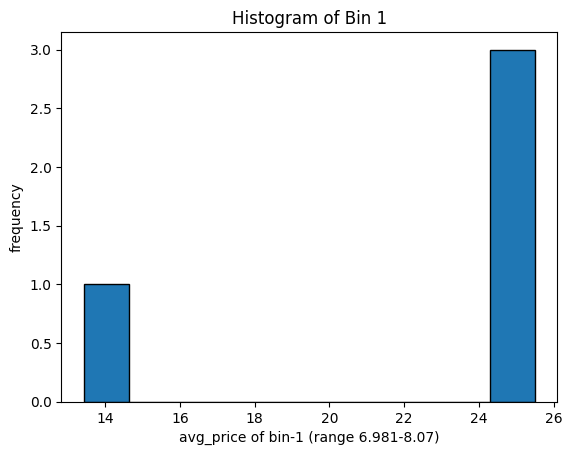

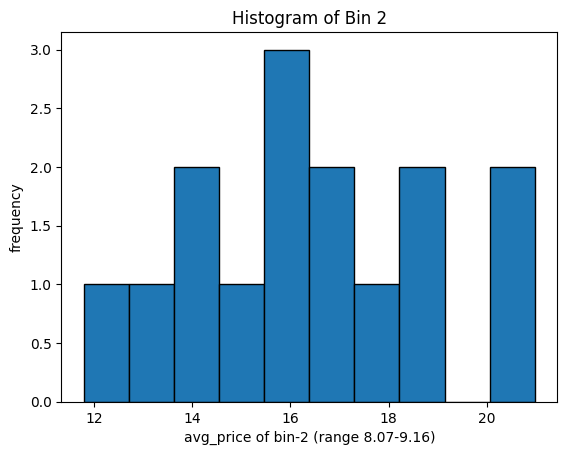

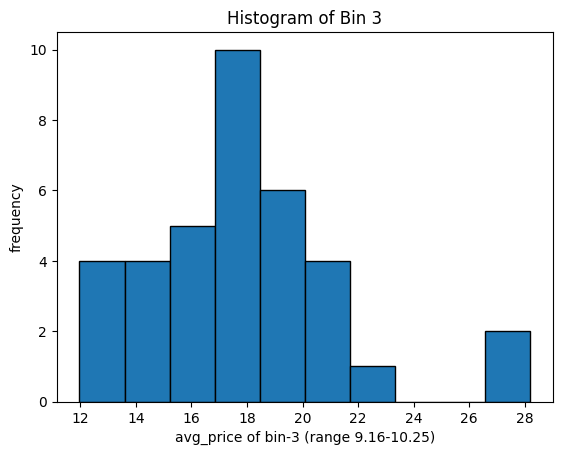

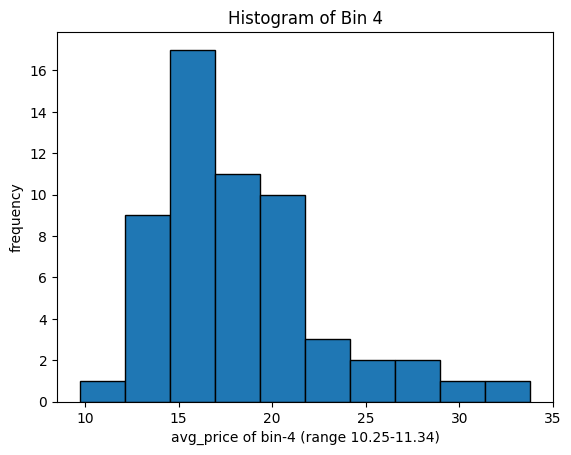

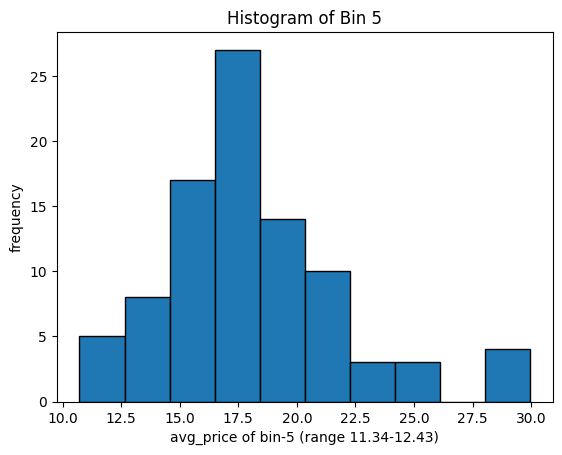

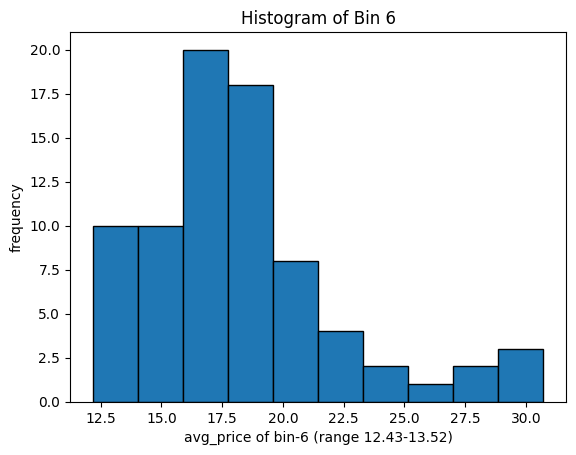

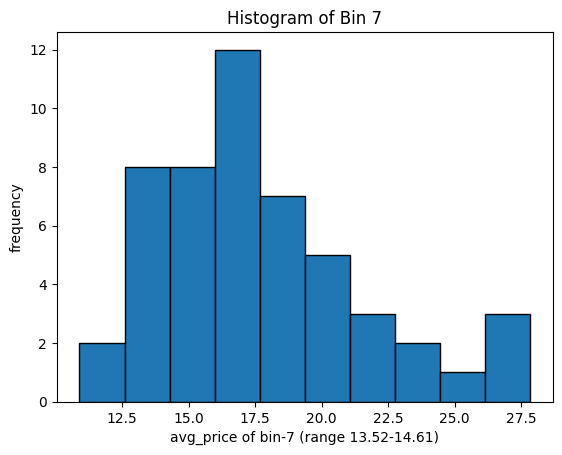

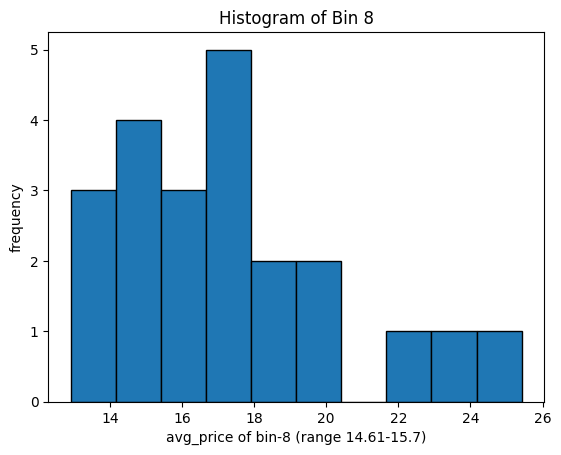

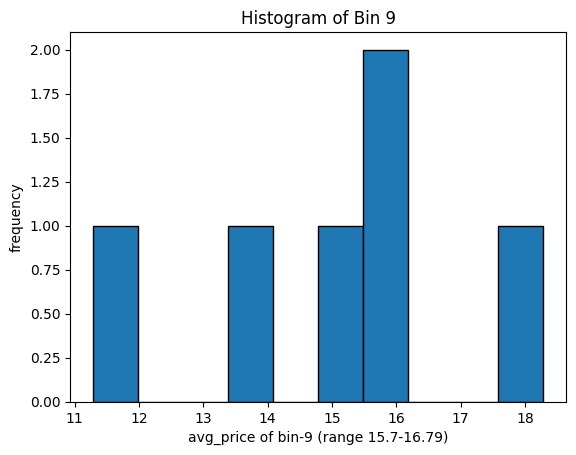

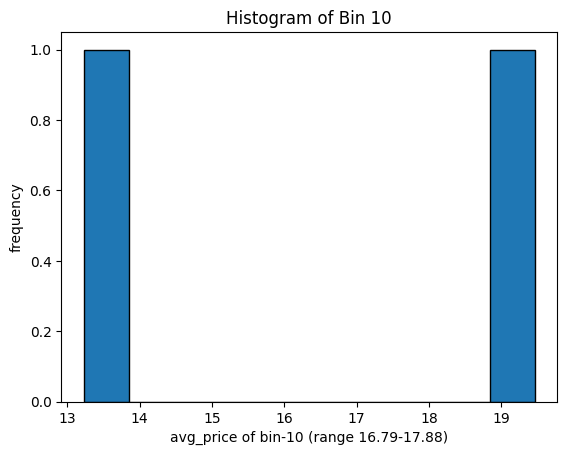

6.981
17.85
1.09


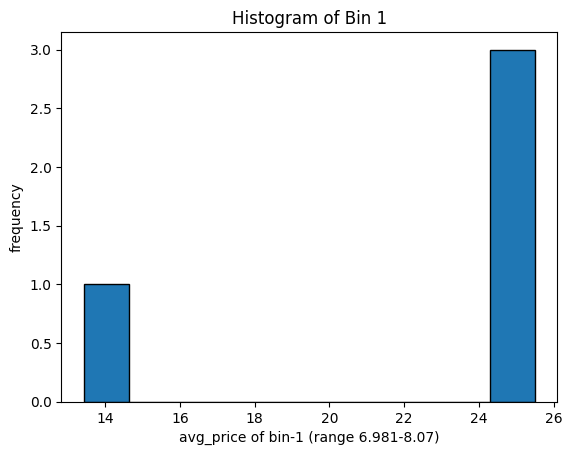

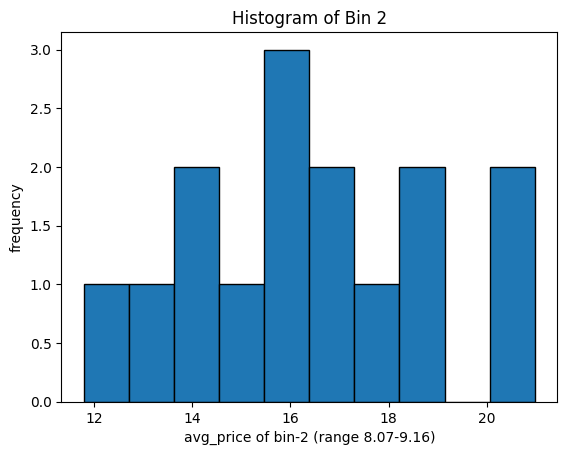

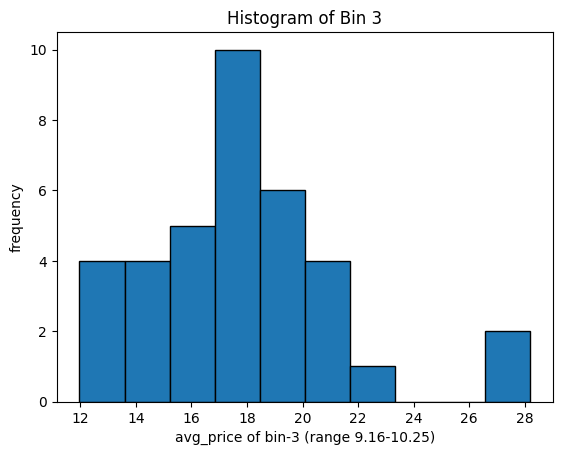

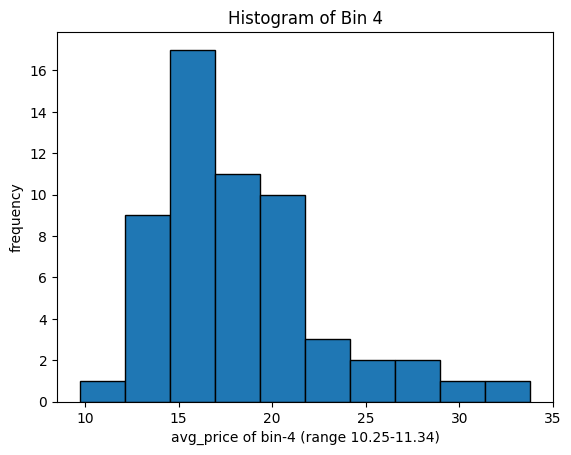

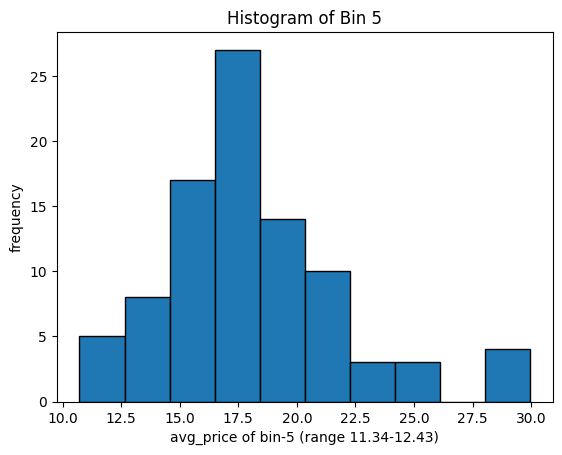

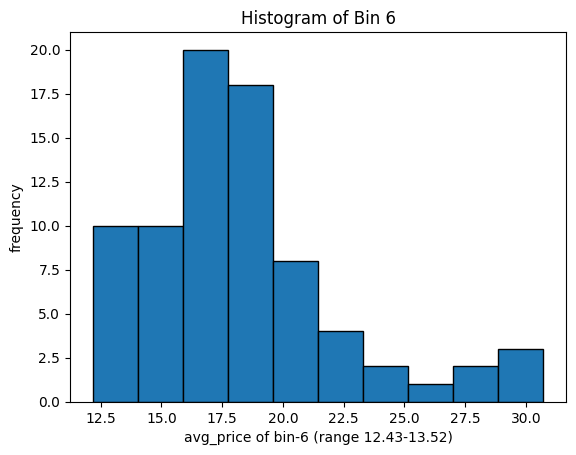

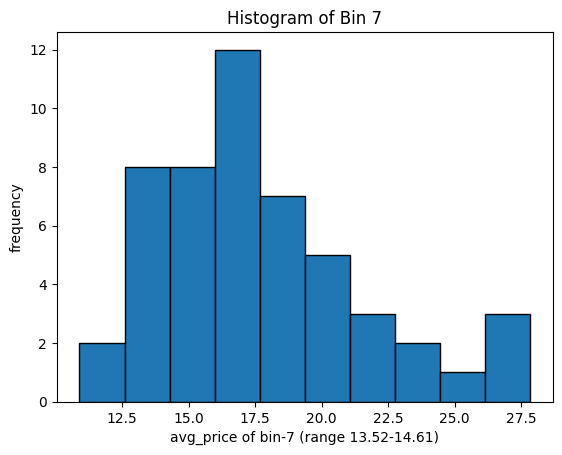

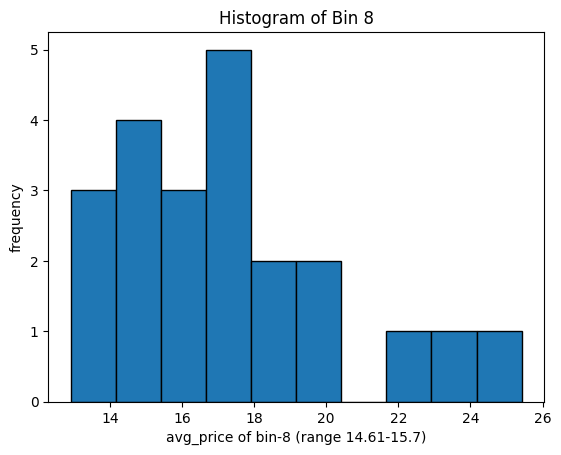

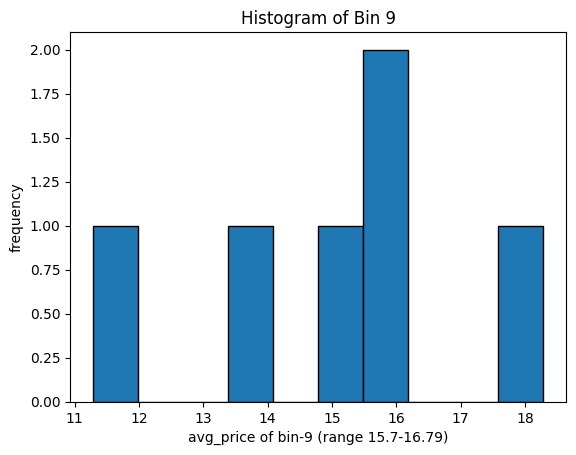

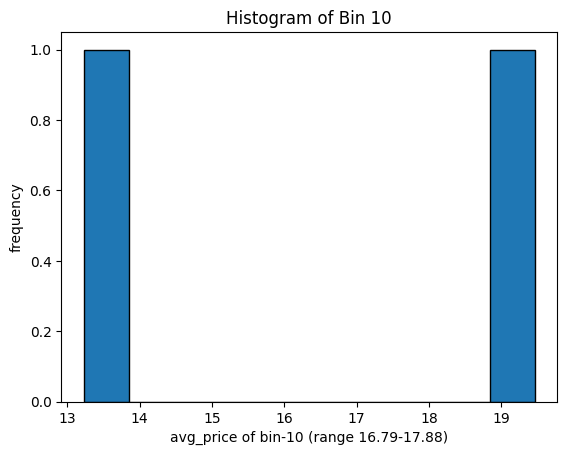

6.981
17.85
1.09


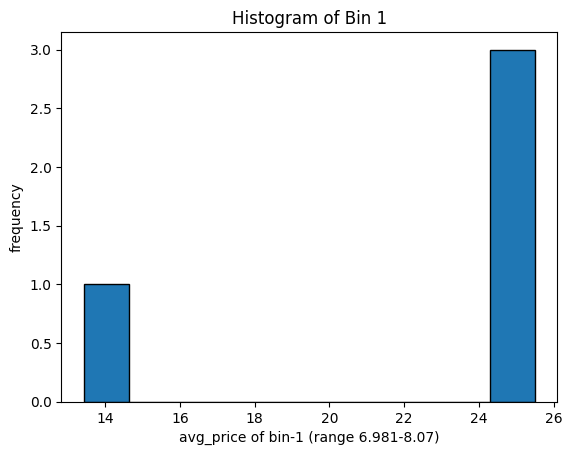

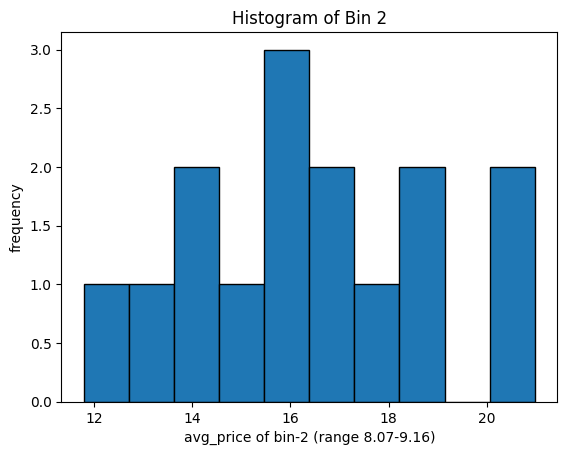

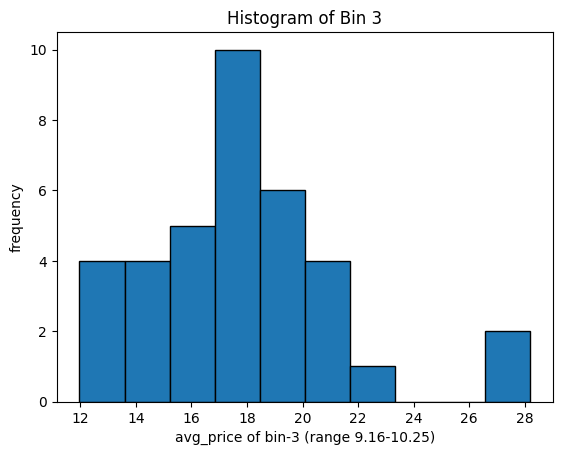

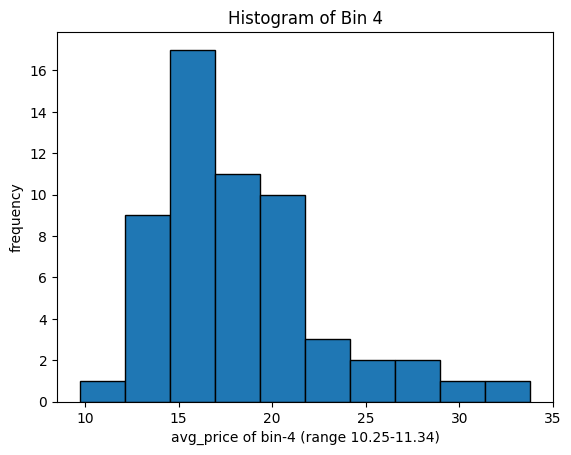

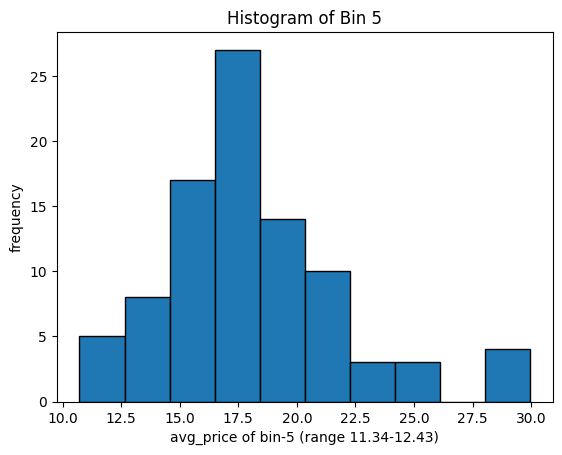

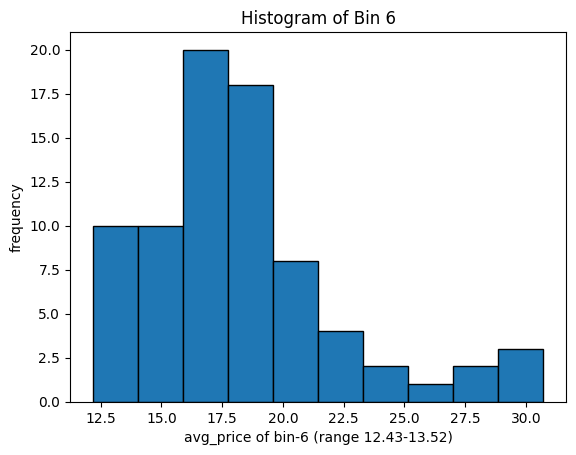

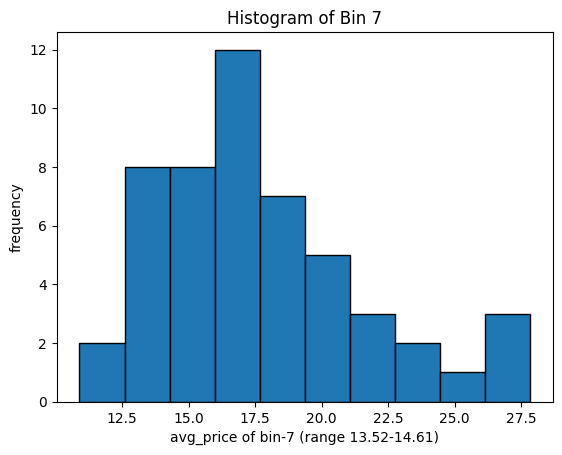

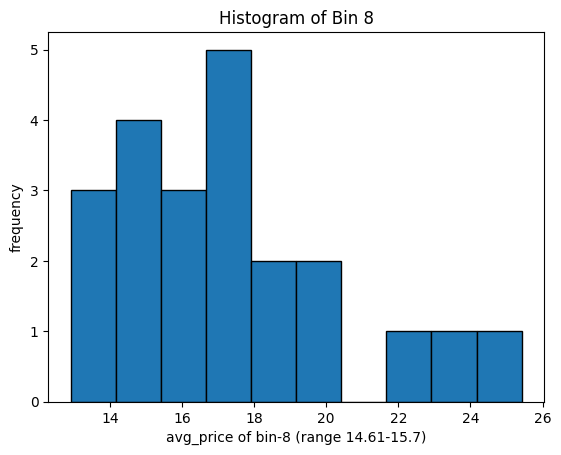

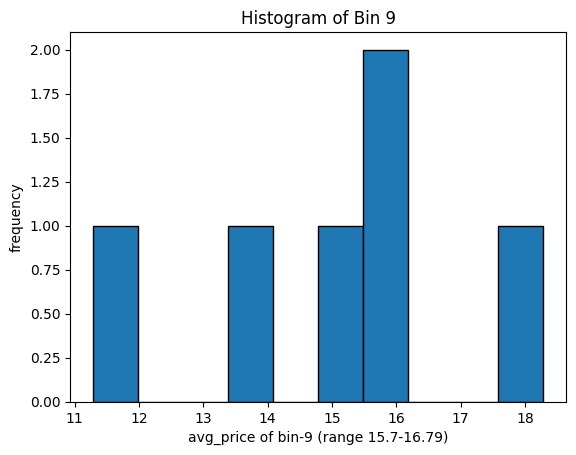

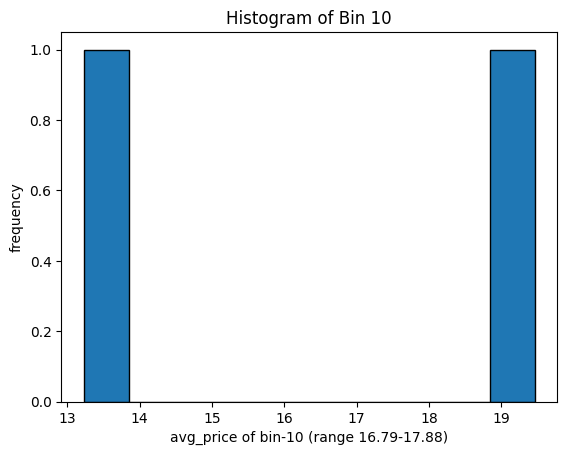

6.981
17.85
1.09


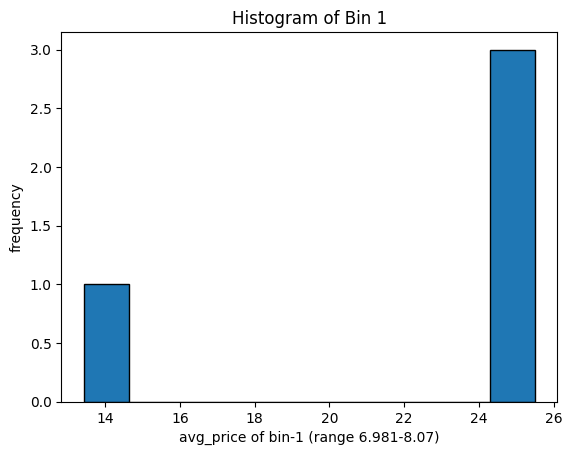

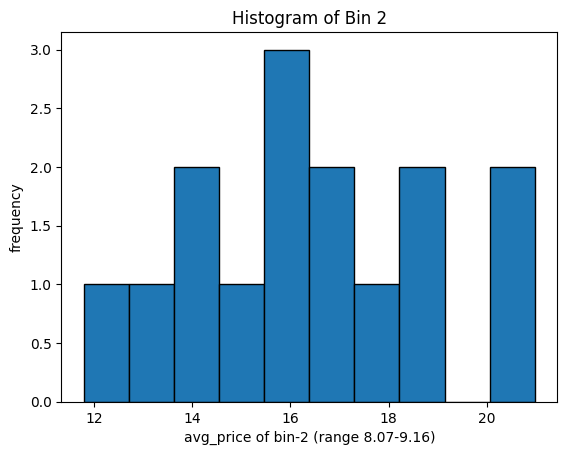

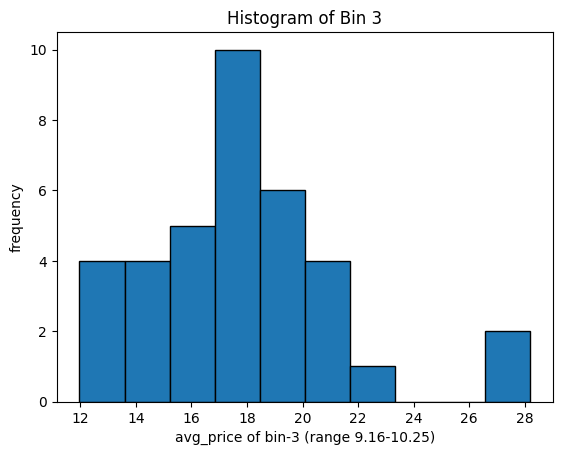

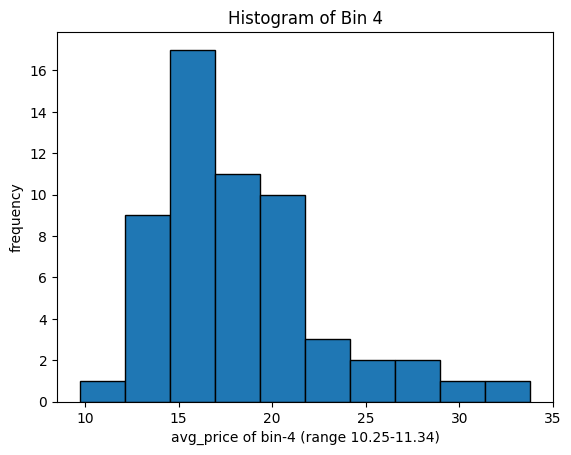

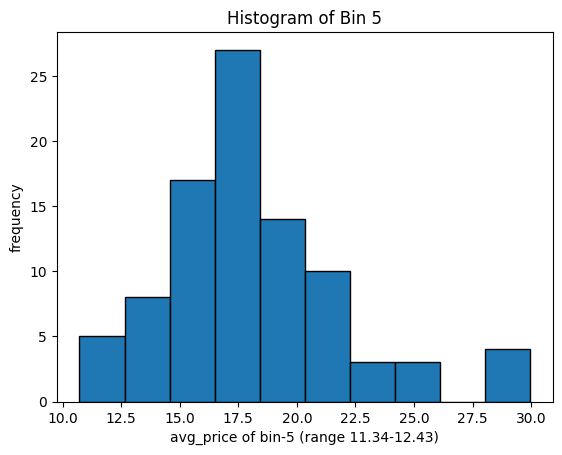

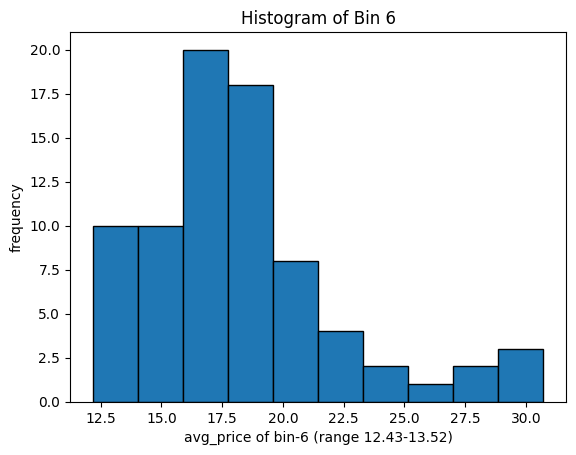

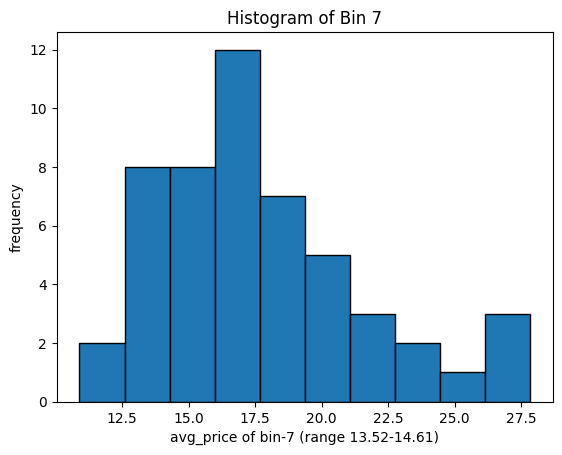

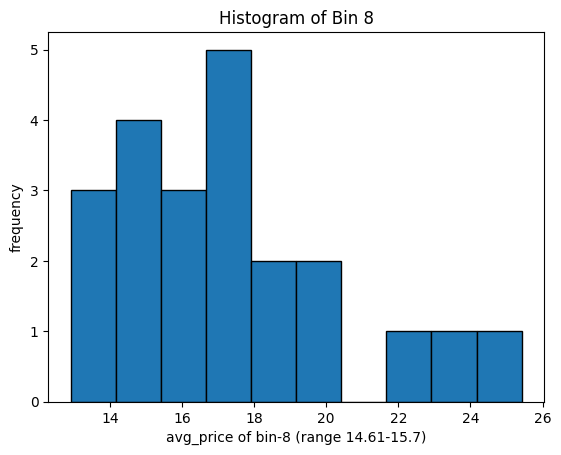

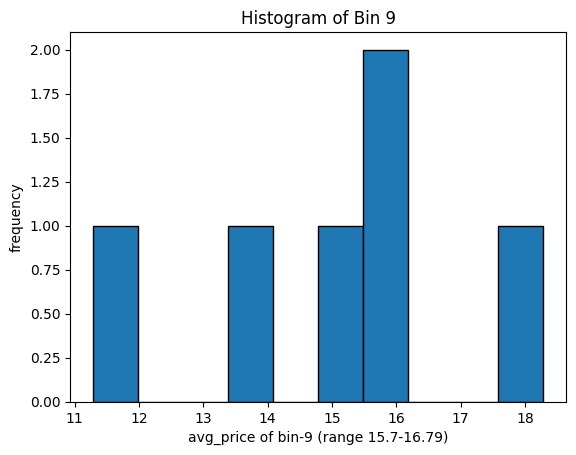

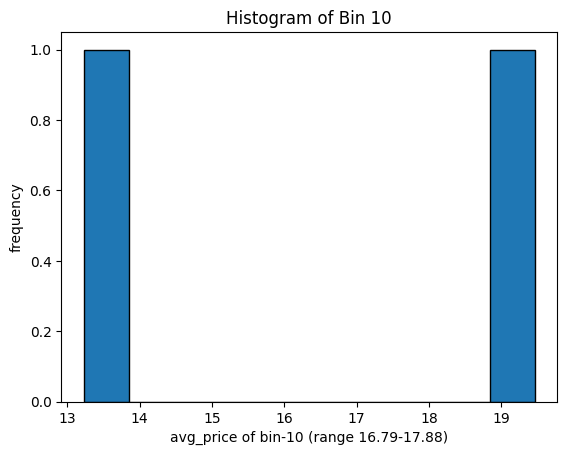

6.981
17.85
1.09


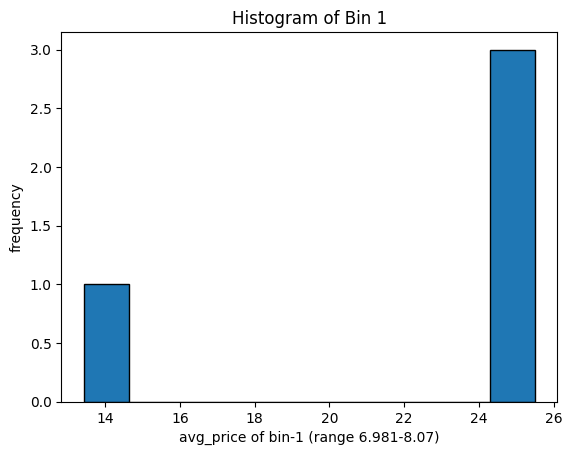

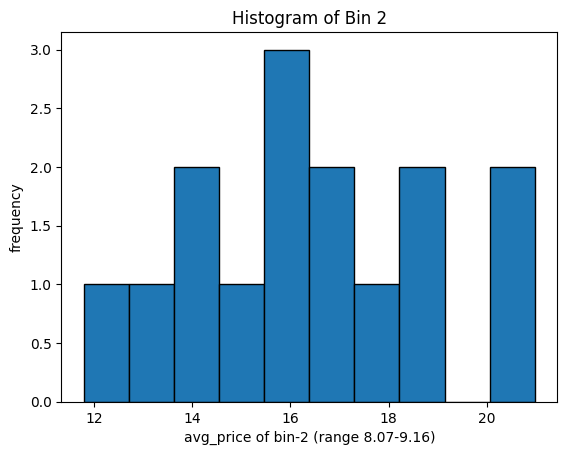

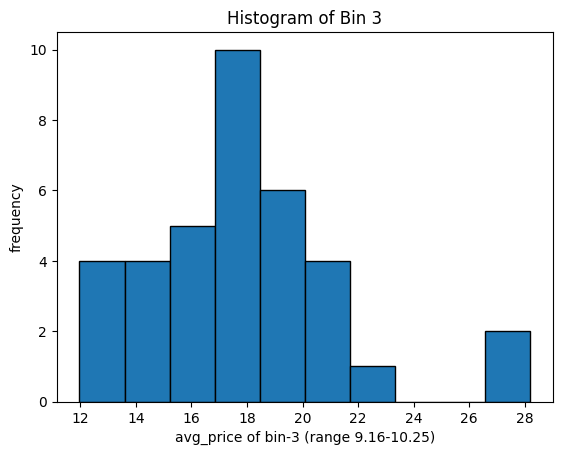

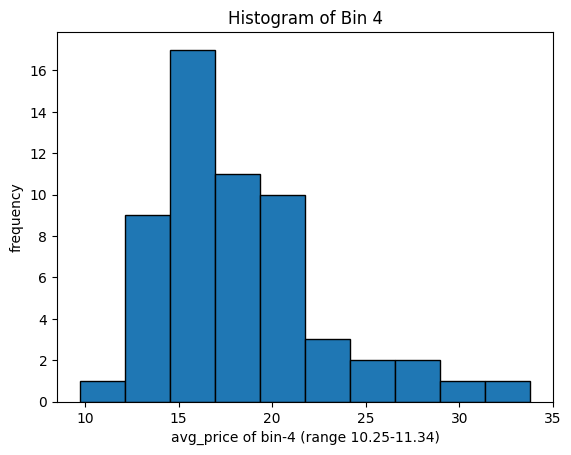

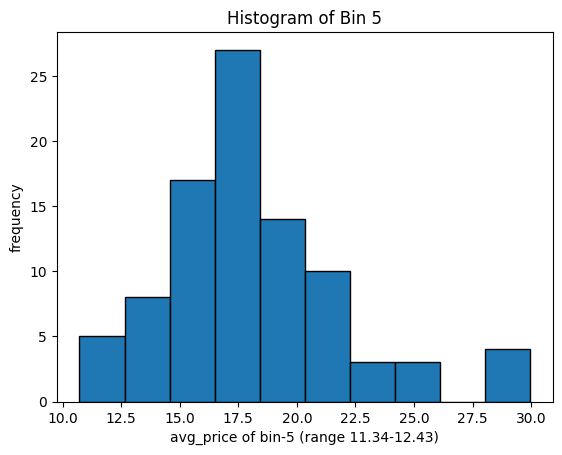

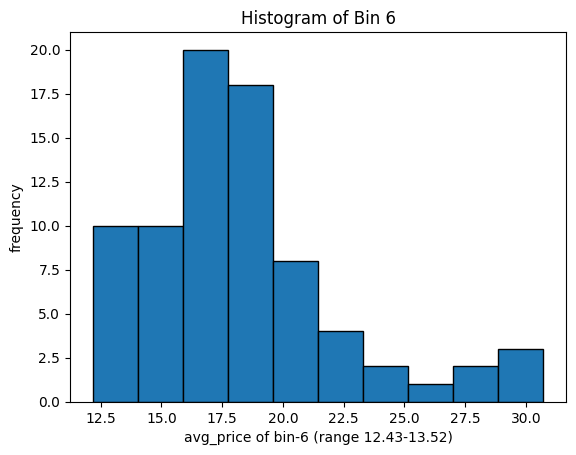

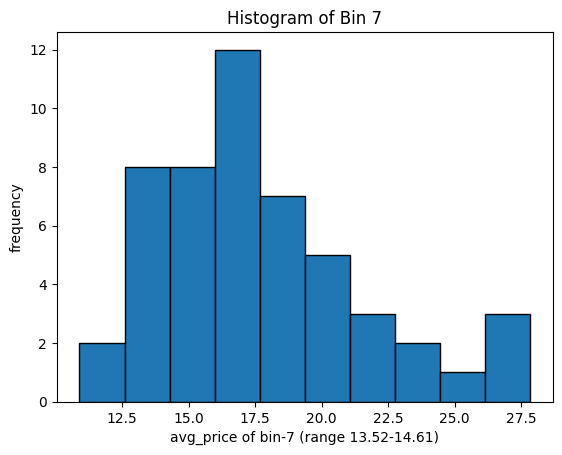

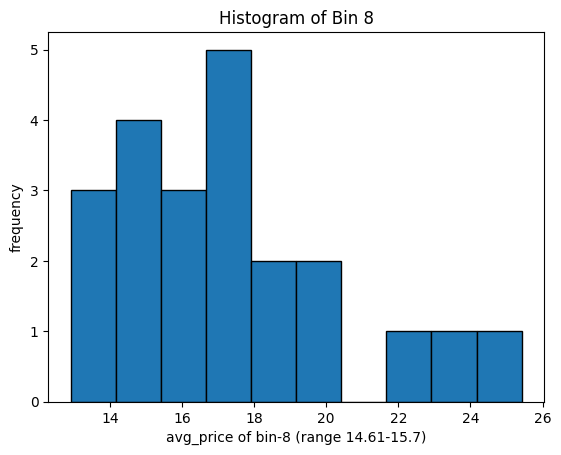

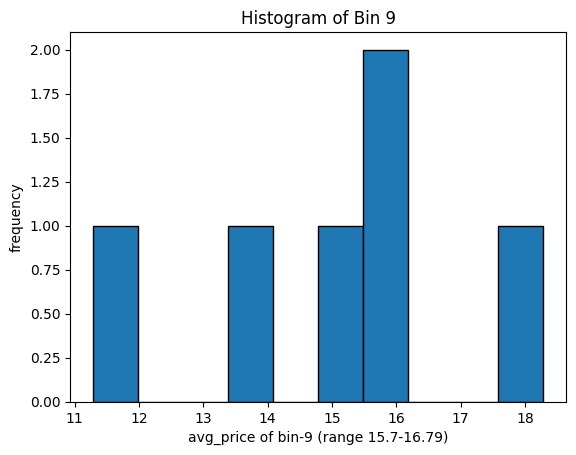

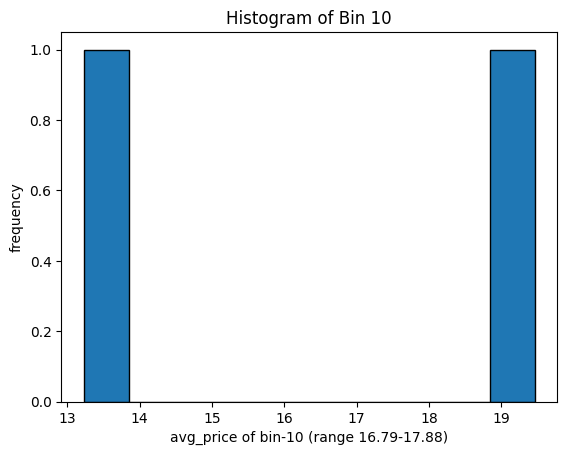

6.981
17.85
1.09


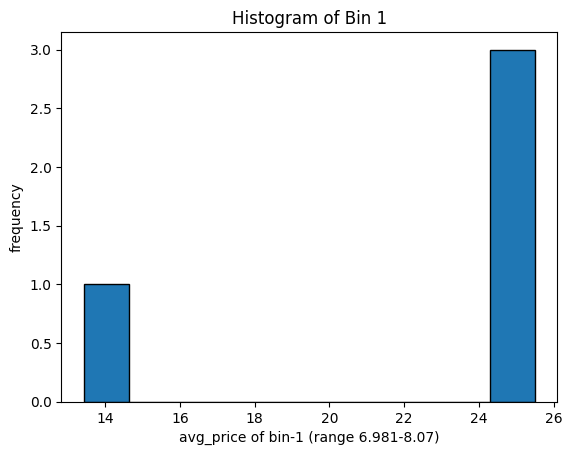

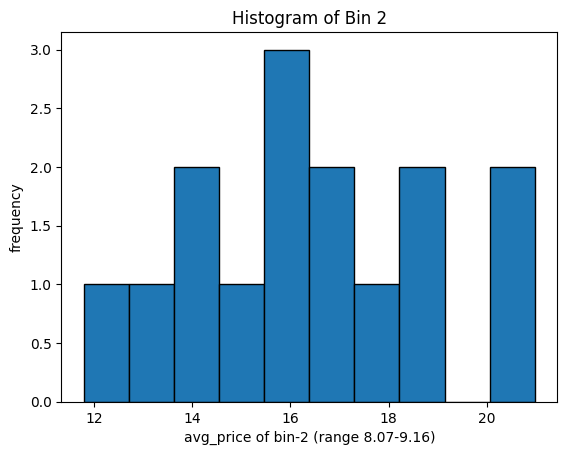

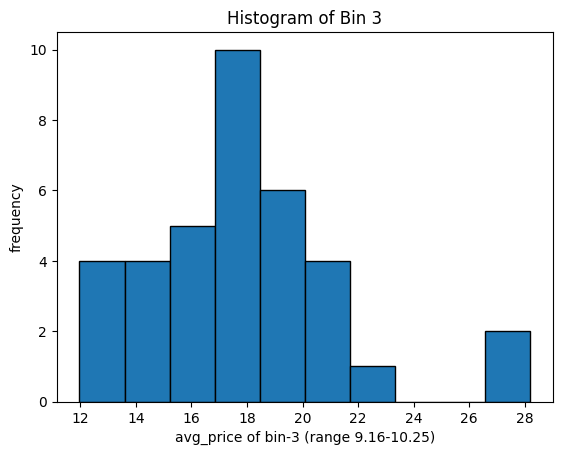

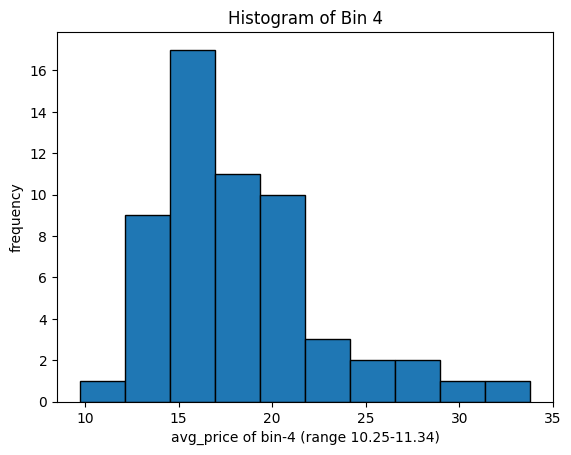

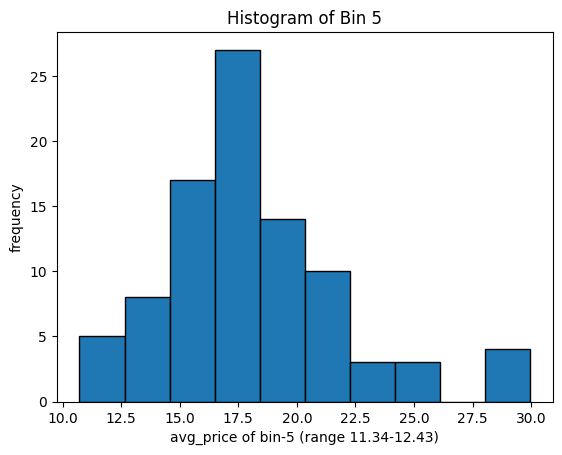

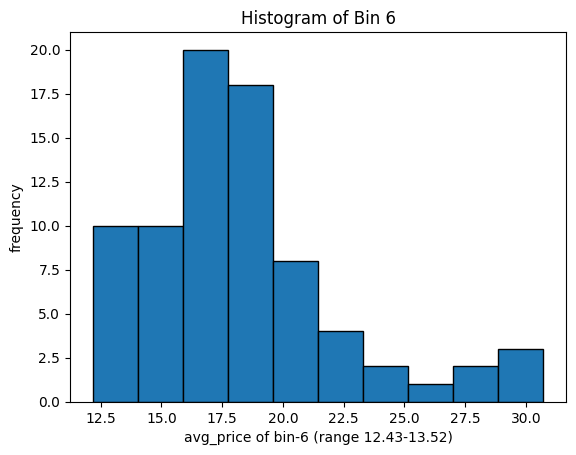

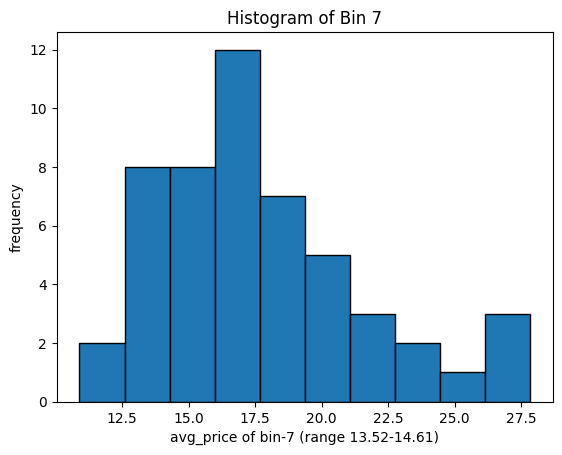

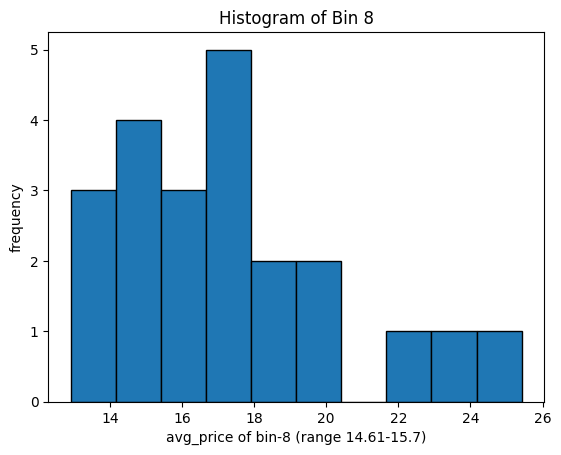

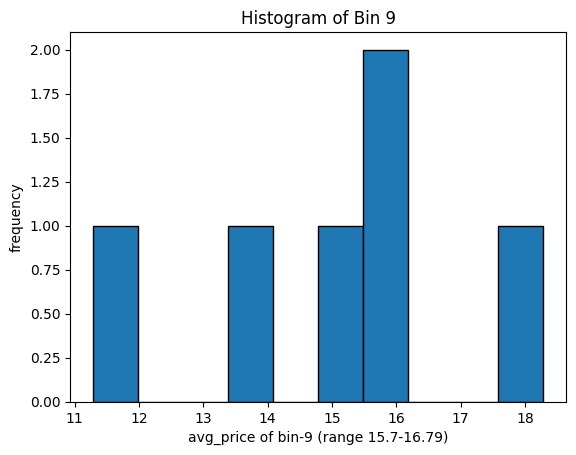

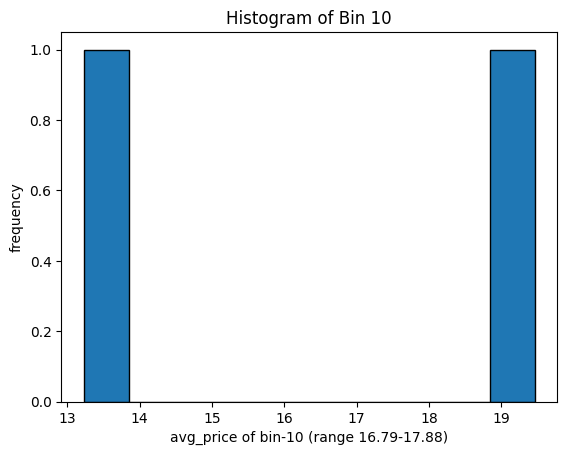

6.981
17.85
1.09


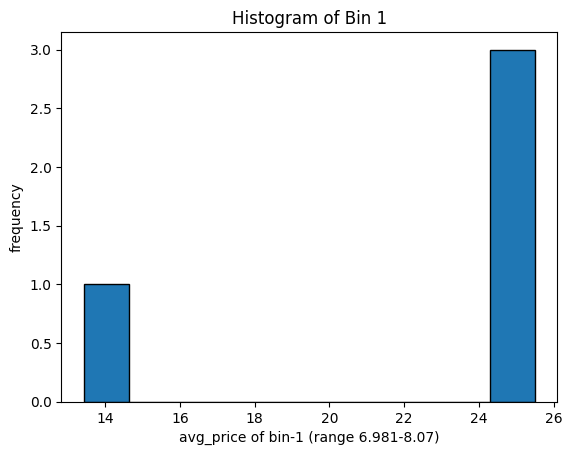

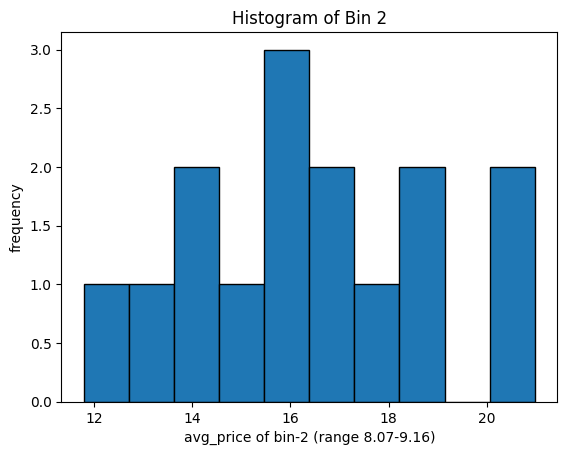

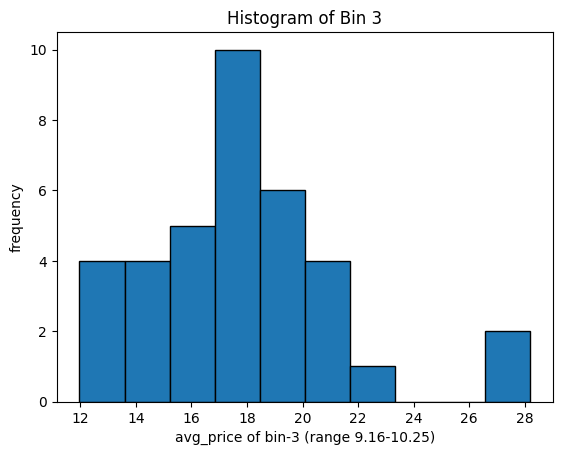

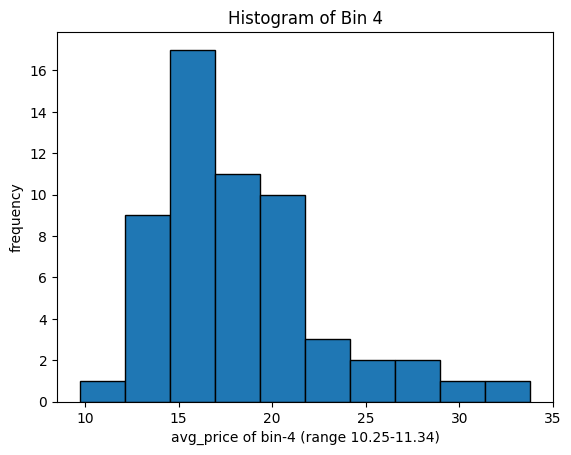

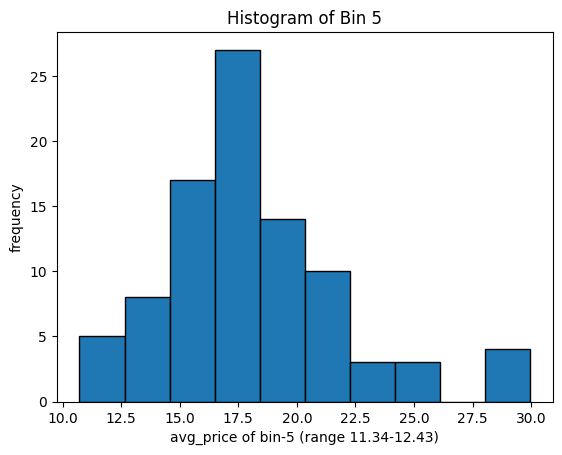

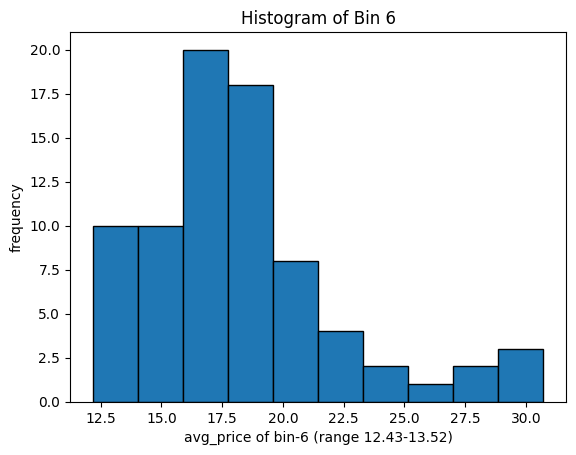

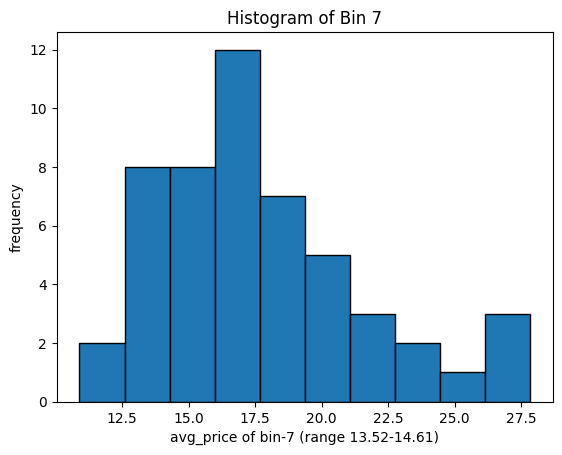

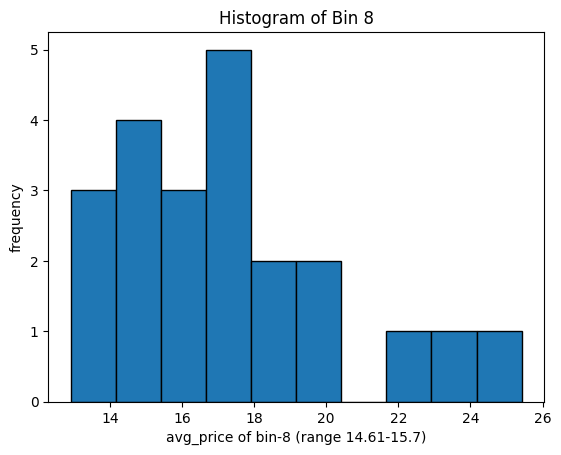

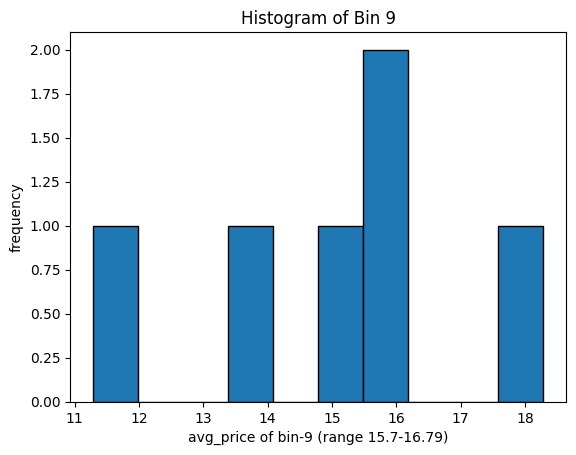

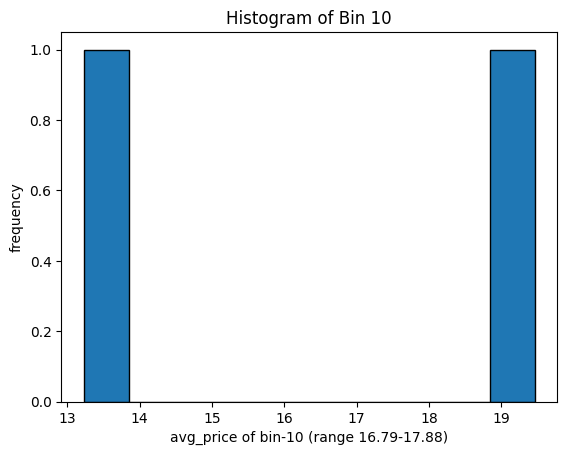

6.981
17.85
1.09


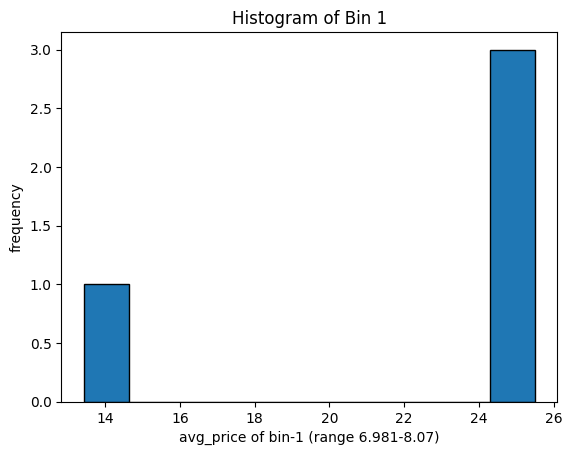

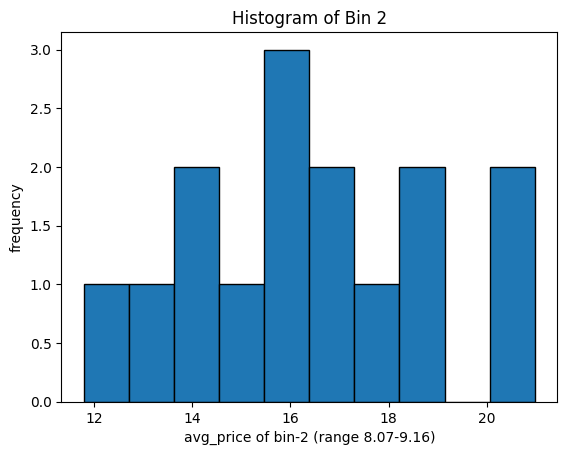

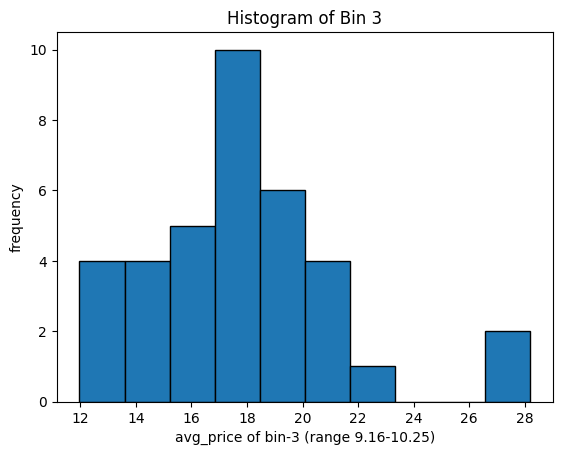

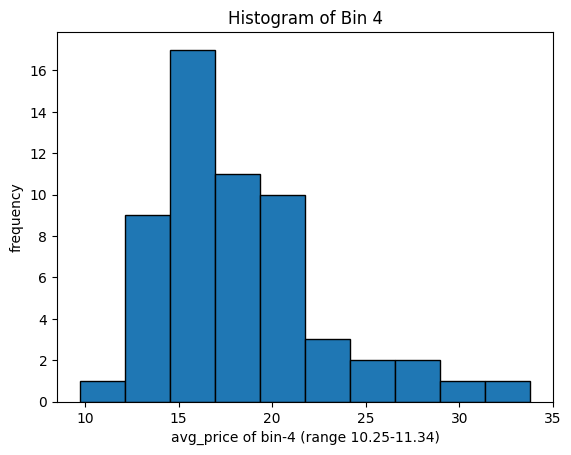

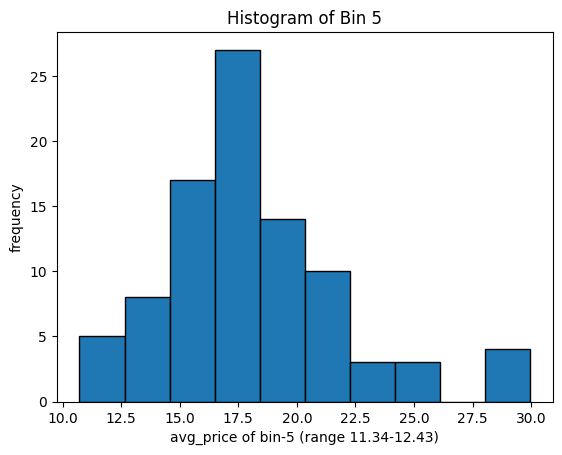

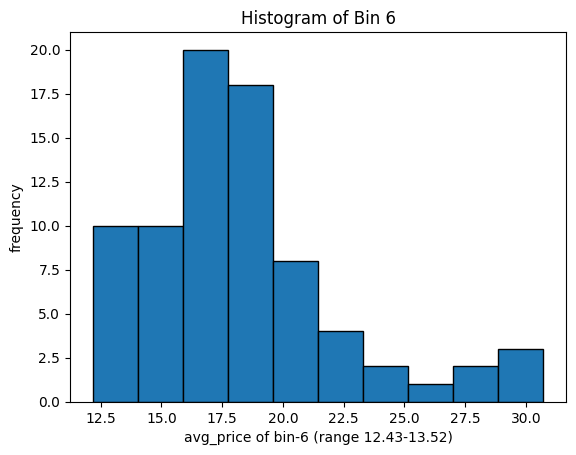

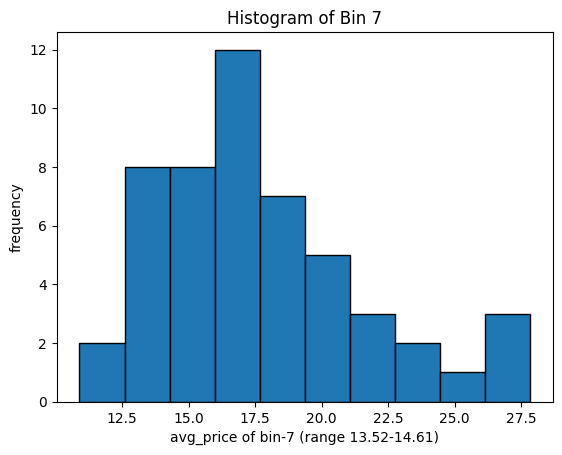

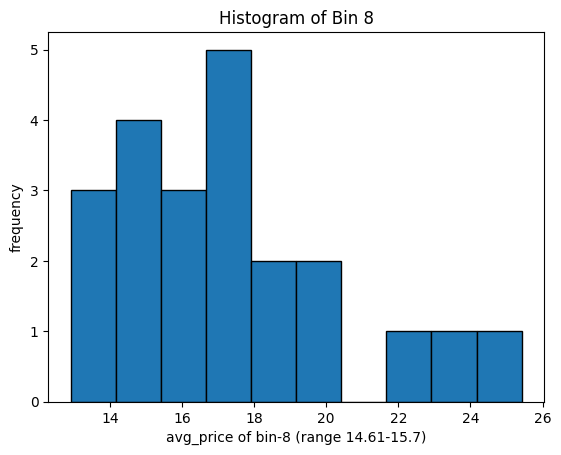

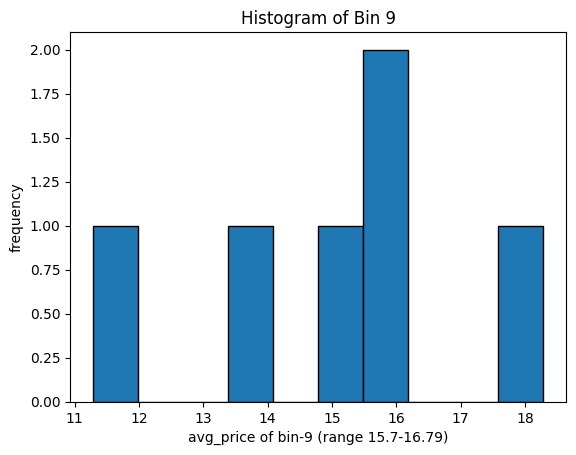

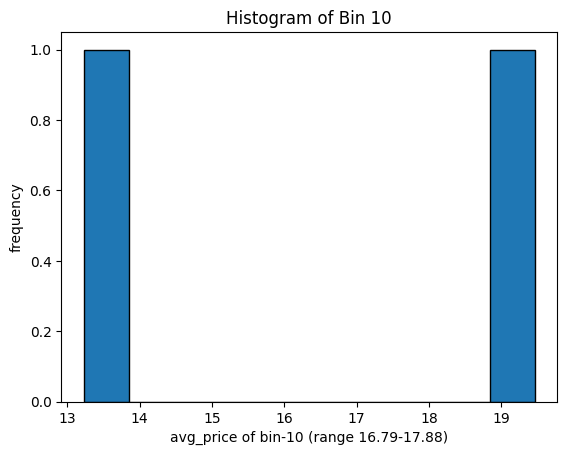

6.981
17.85
1.09


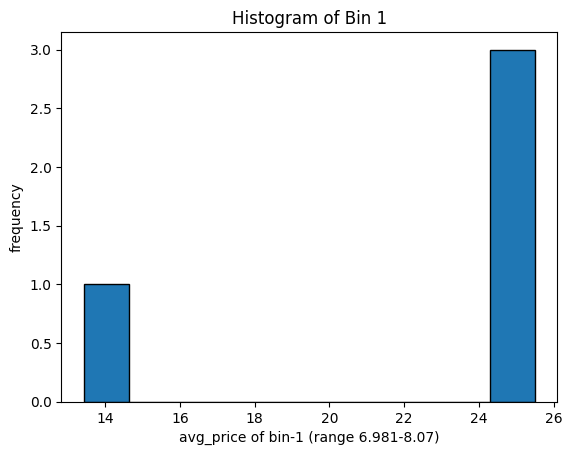

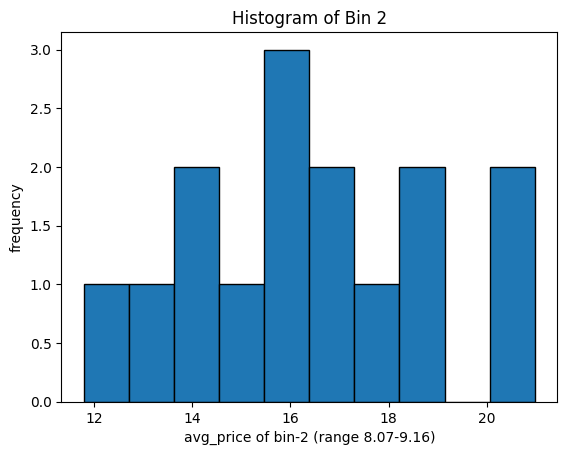

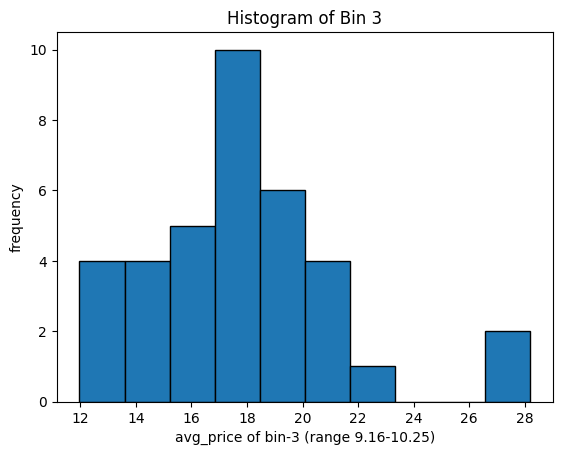

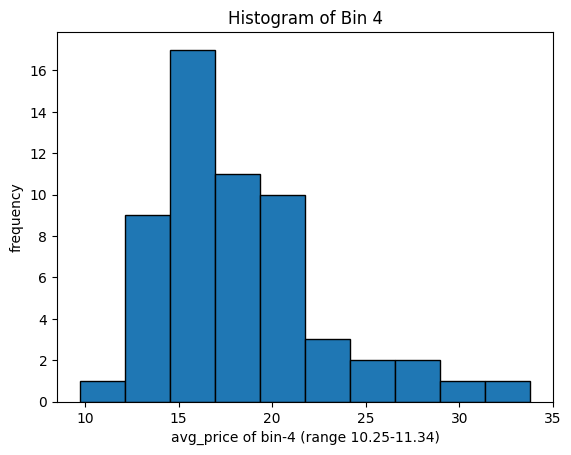

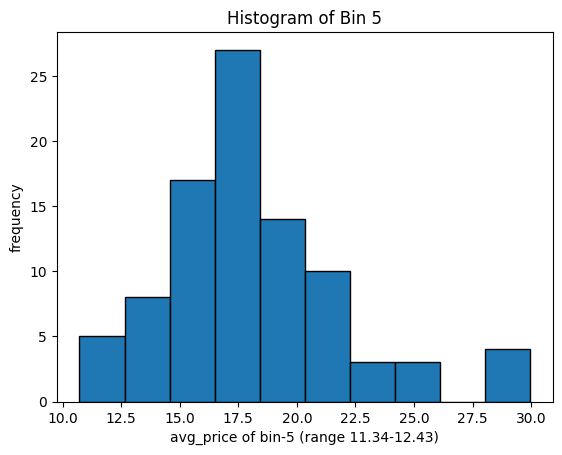

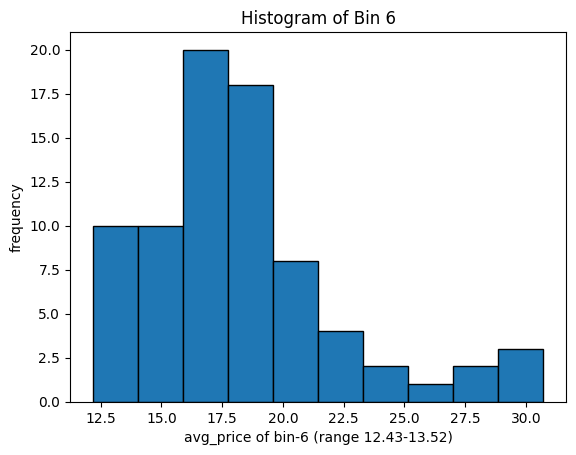

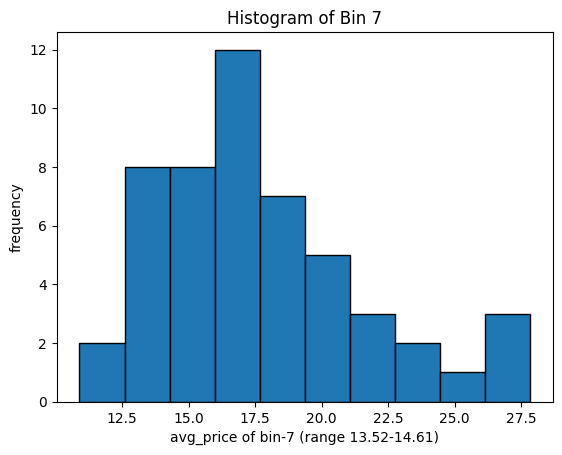

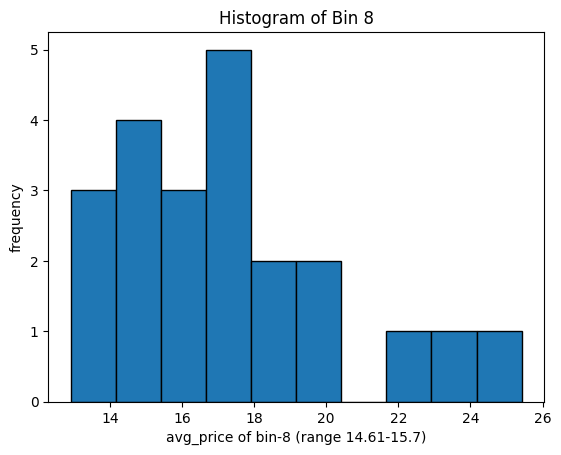

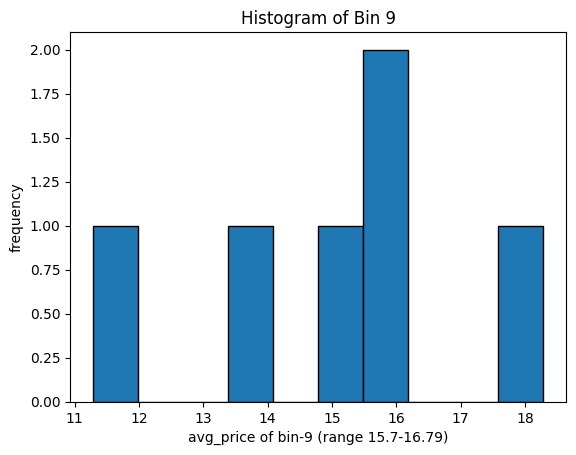

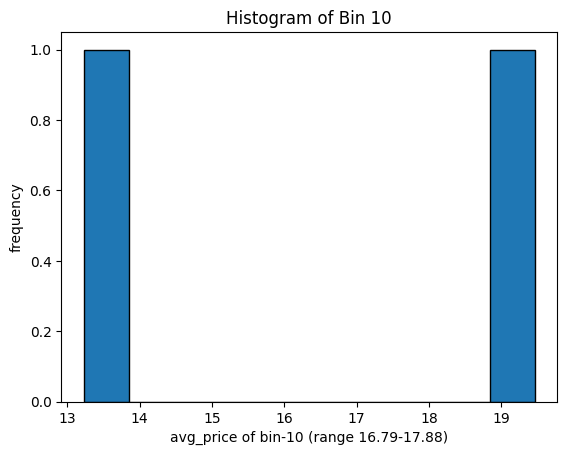

6.981
17.85
1.09


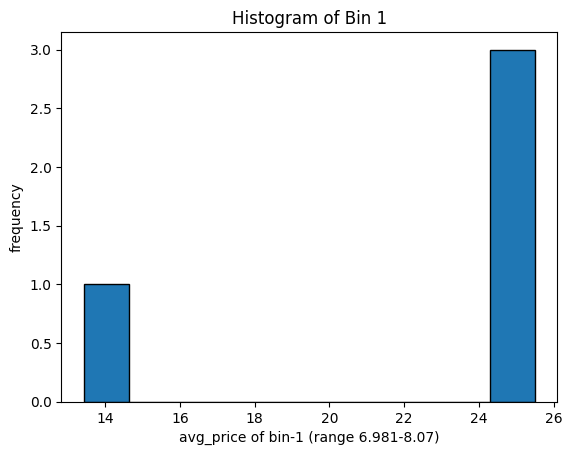

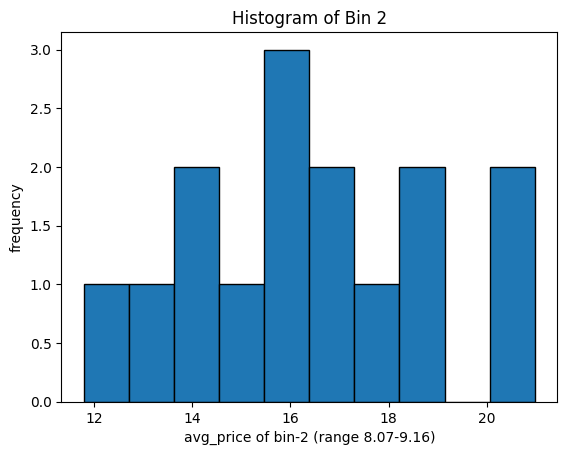

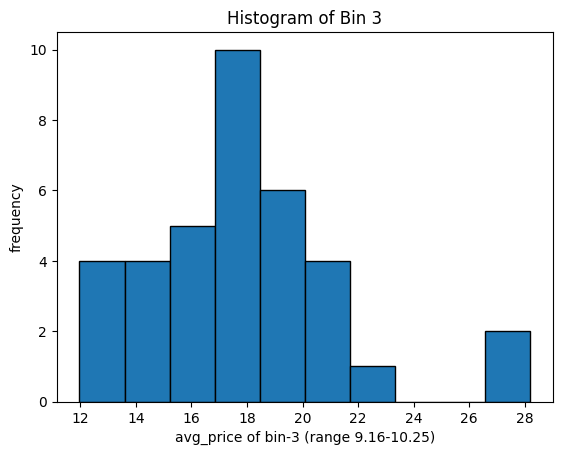

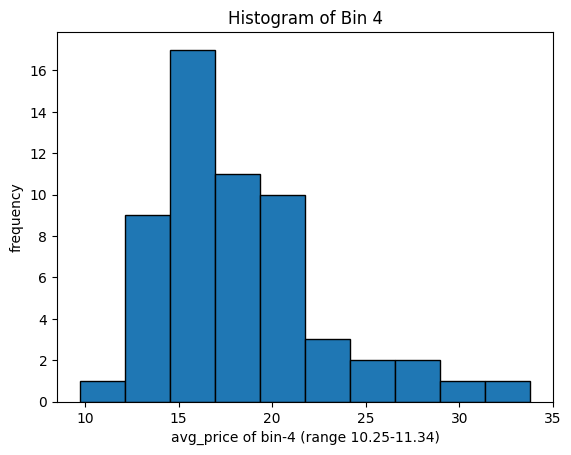

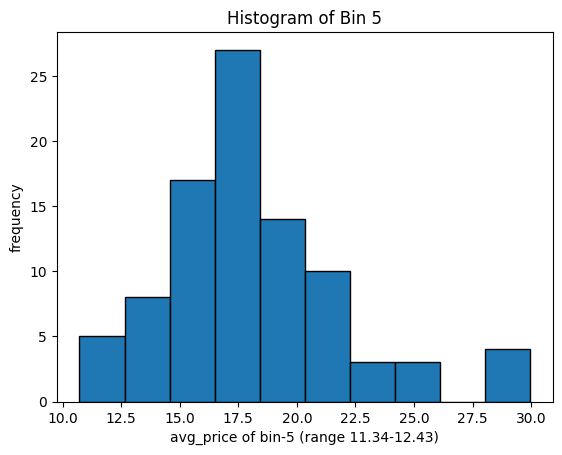

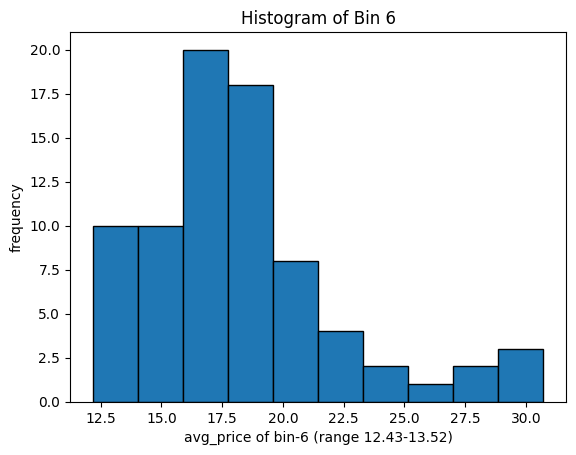

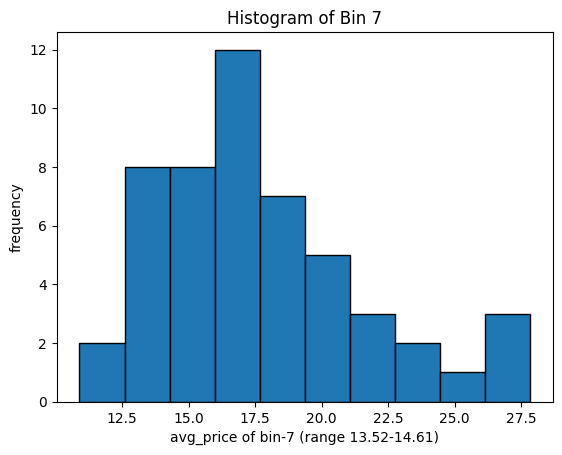

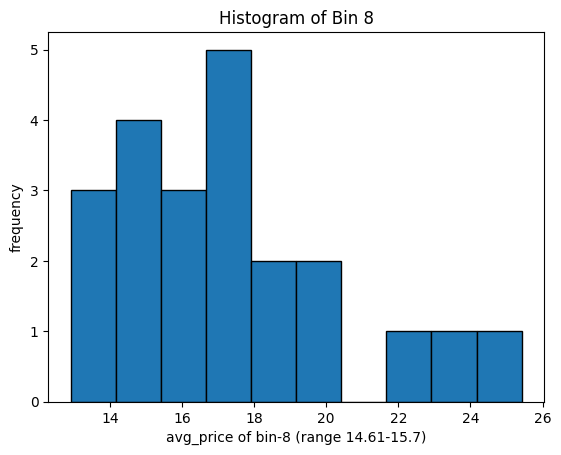

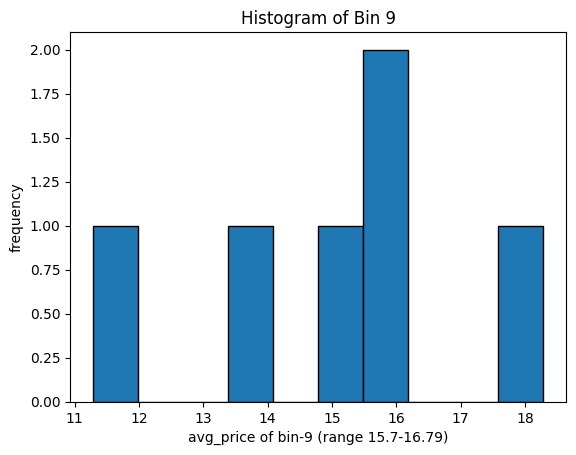

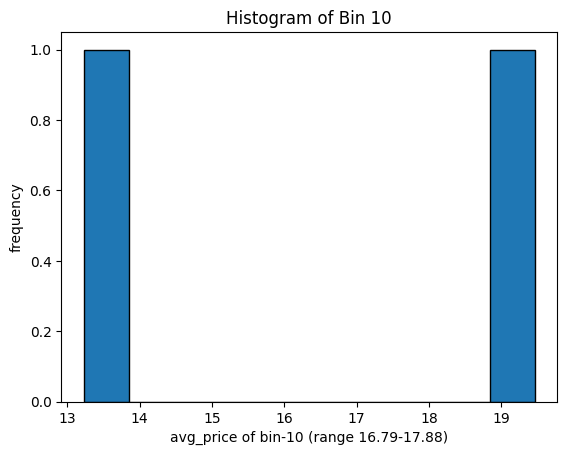

6.981
17.85
1.09


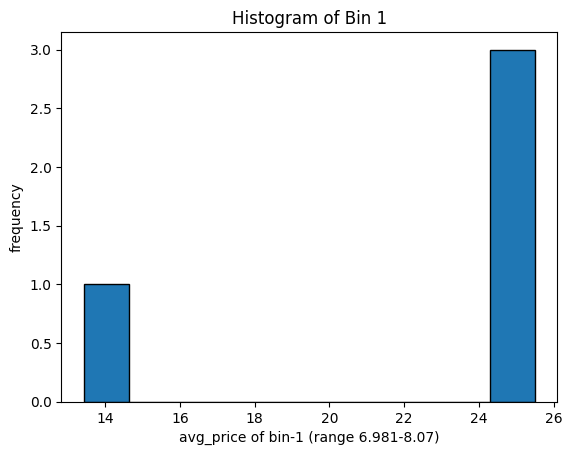

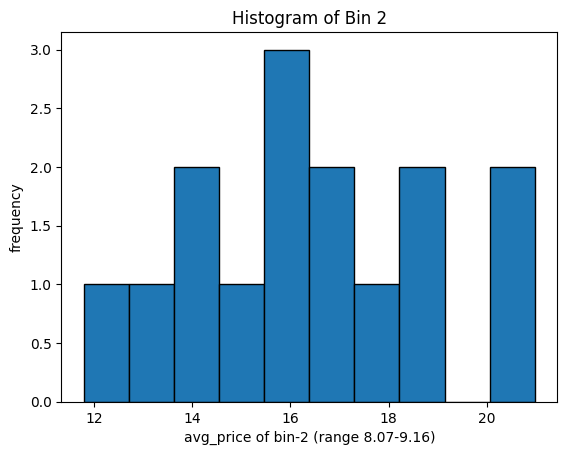

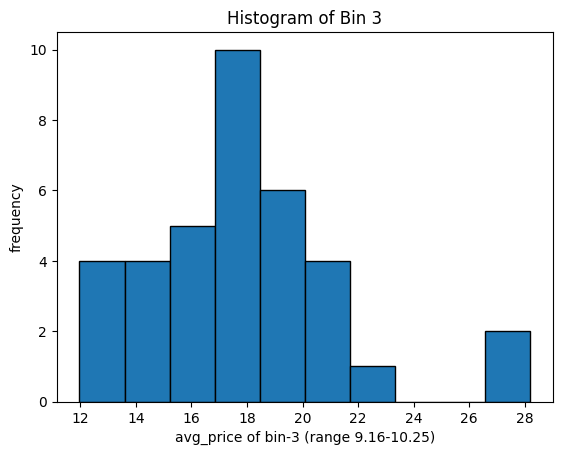

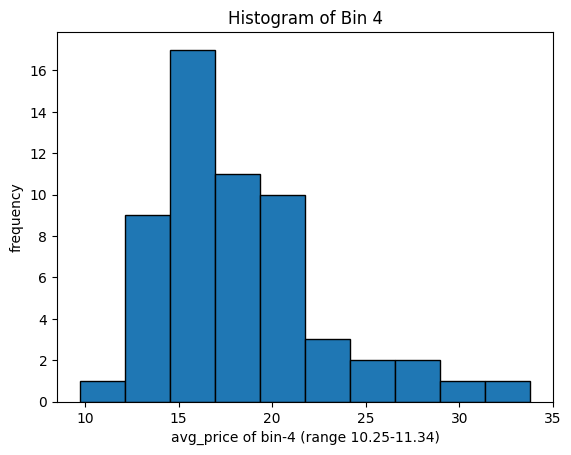

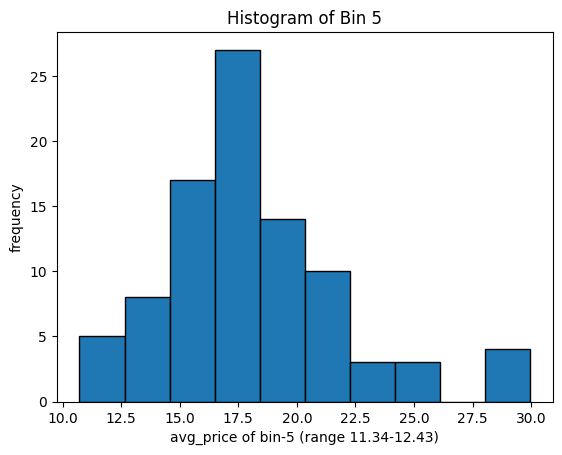

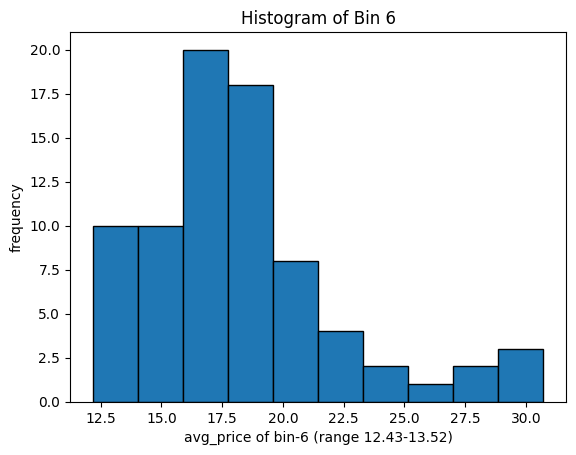

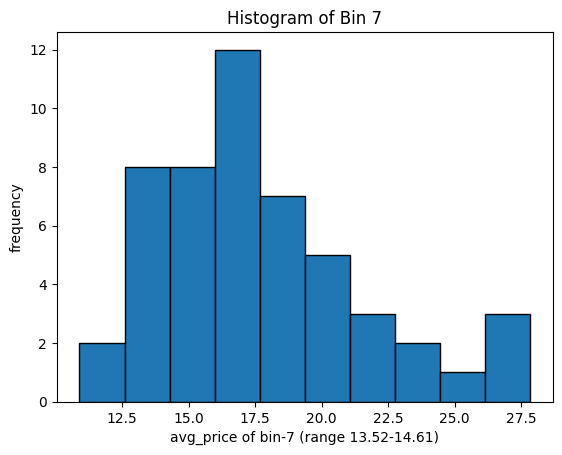

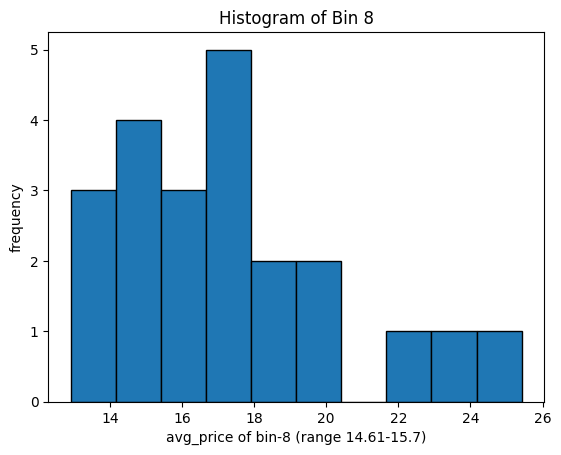

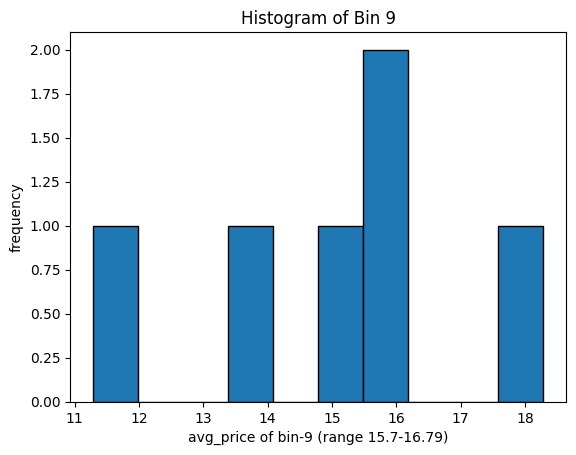

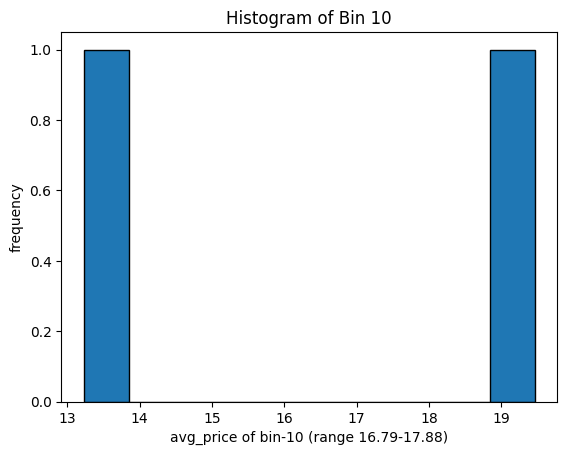

6.981
17.85
1.09


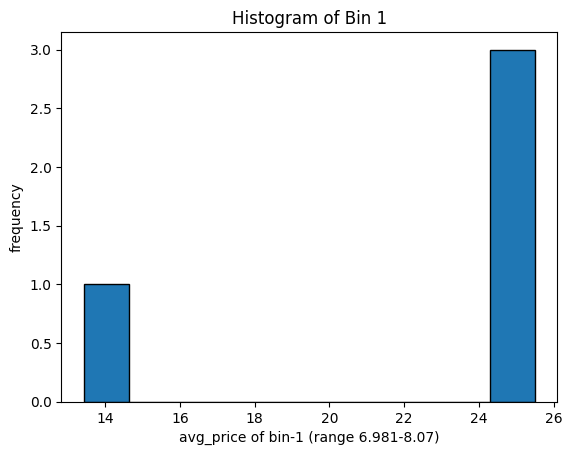

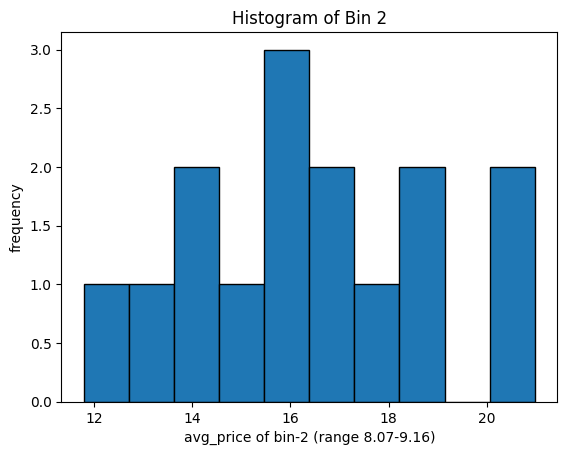

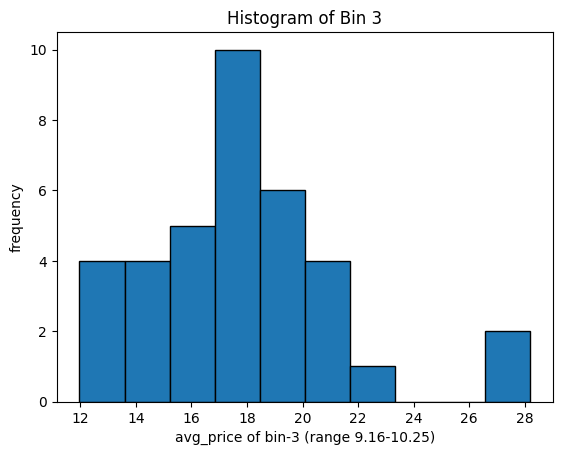

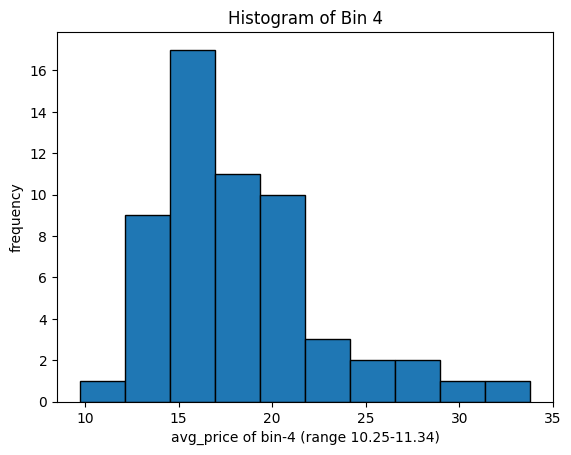

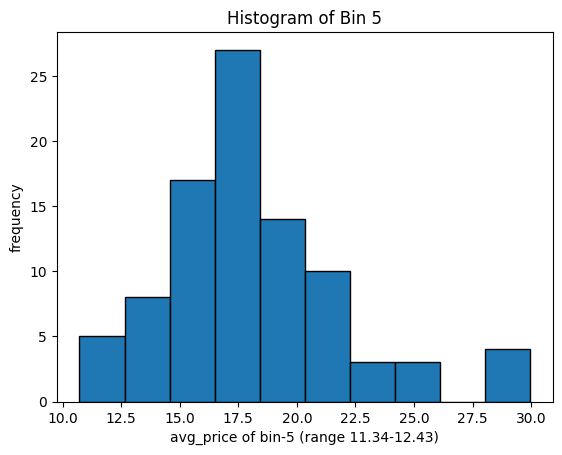

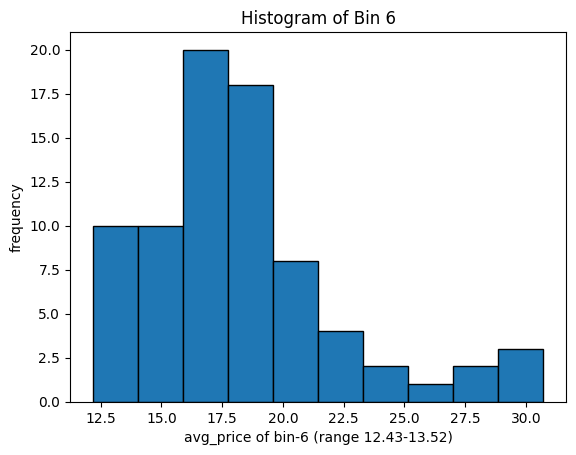

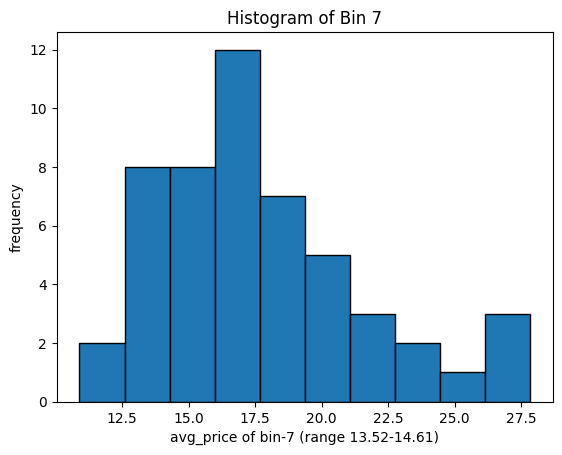

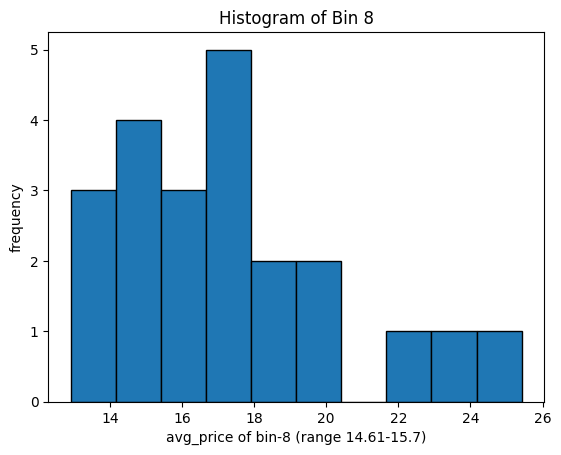

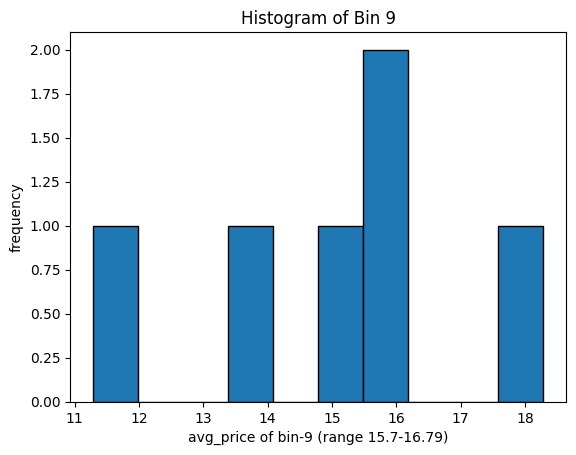

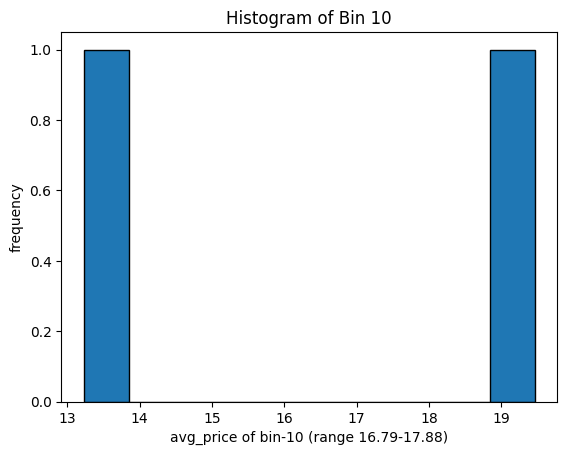

6.981
17.85
1.09


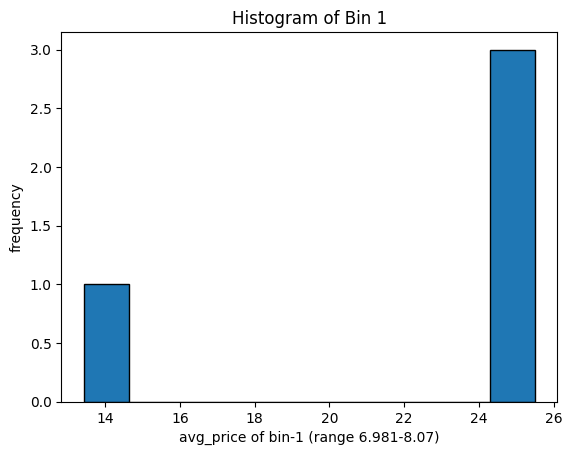

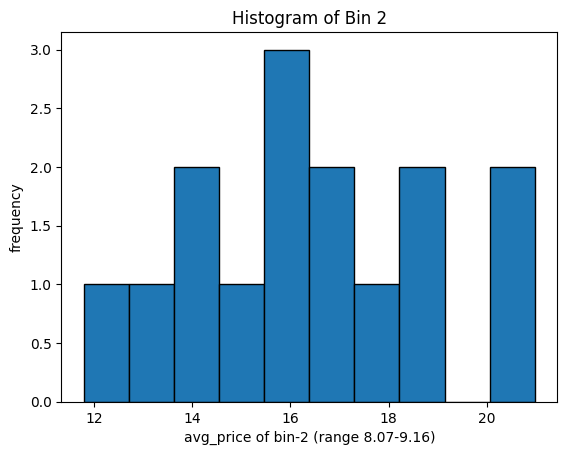

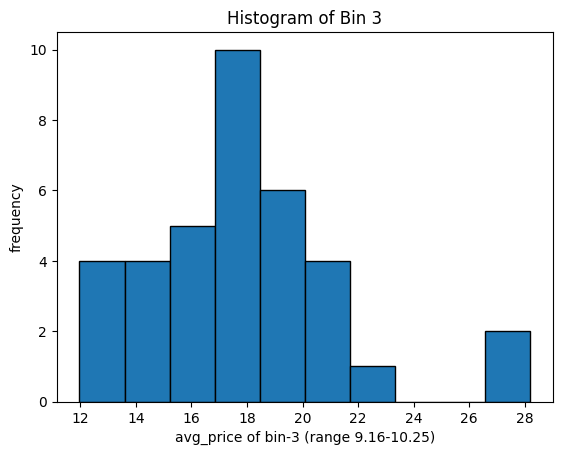

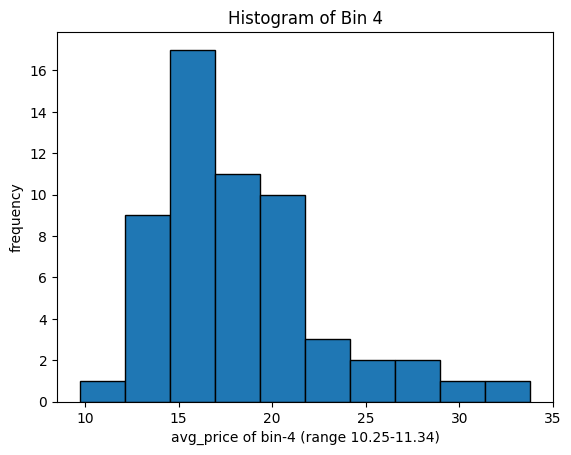

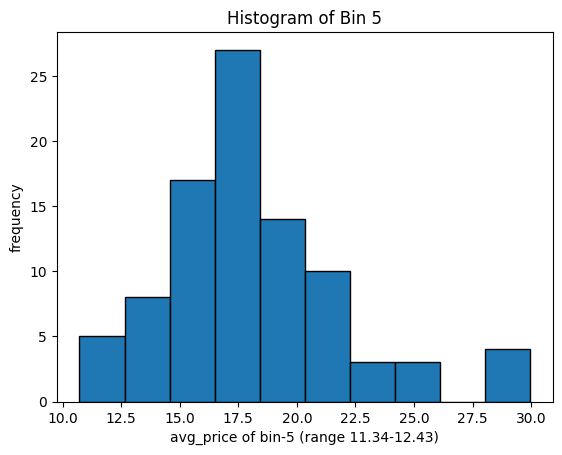

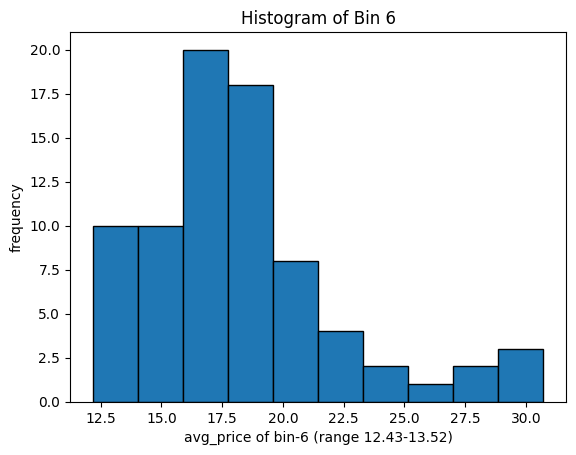

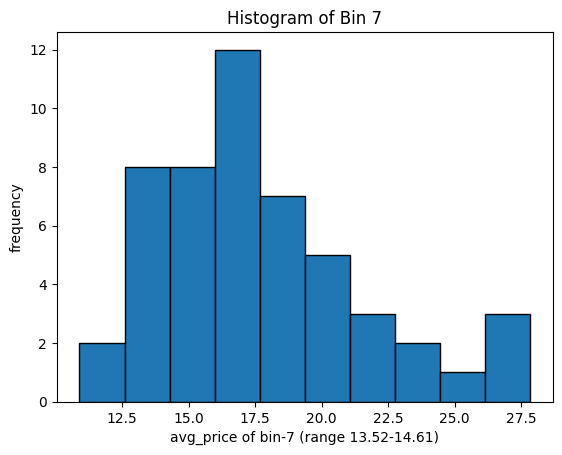

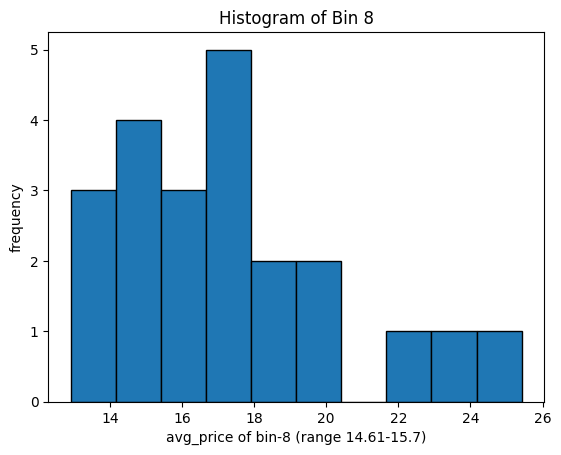

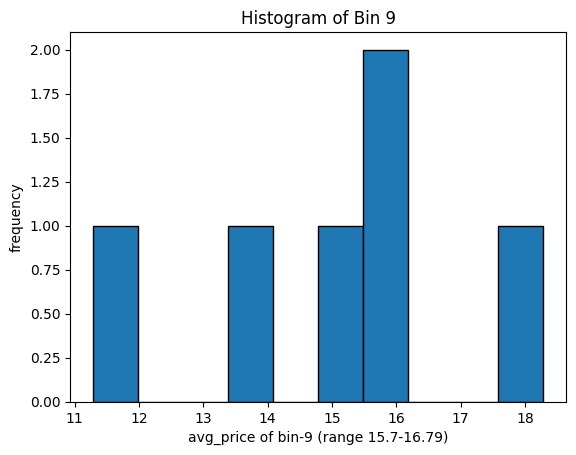

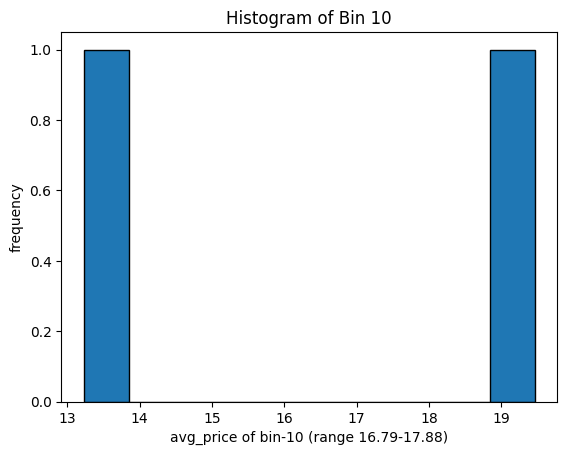

6.981
17.85
1.09


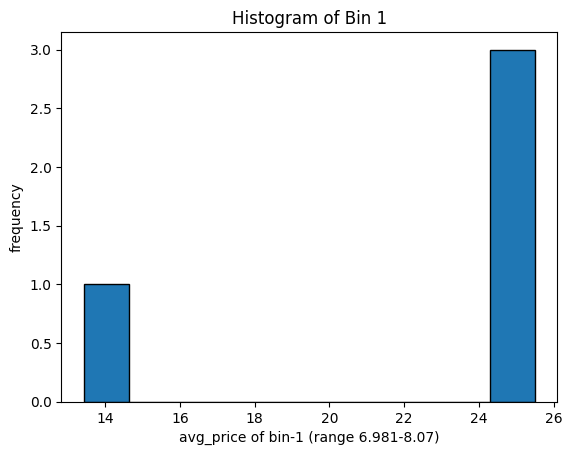

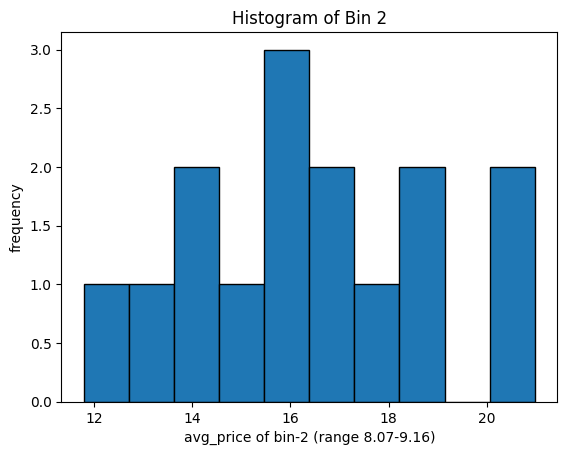

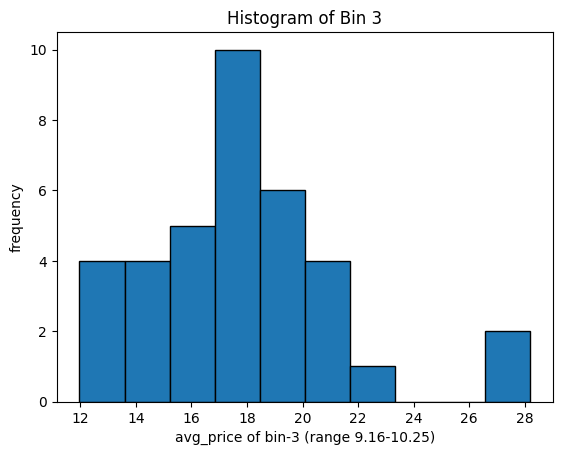

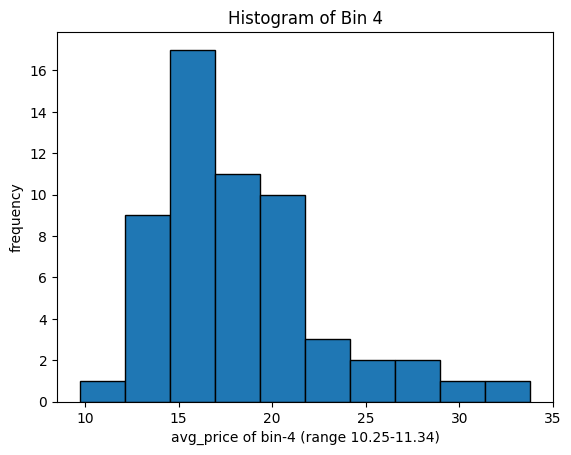

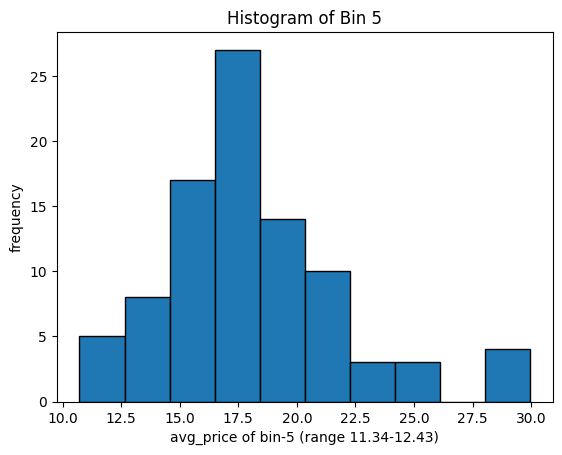

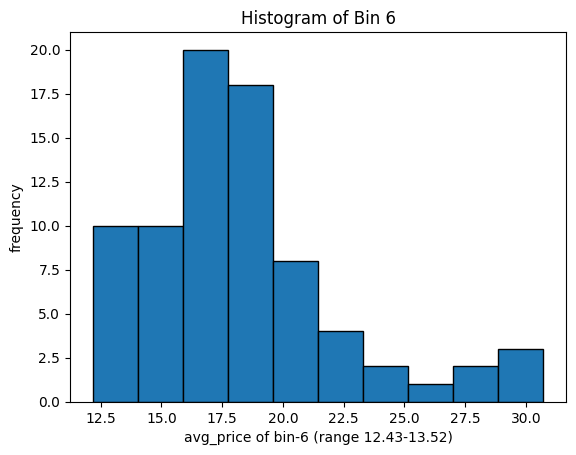

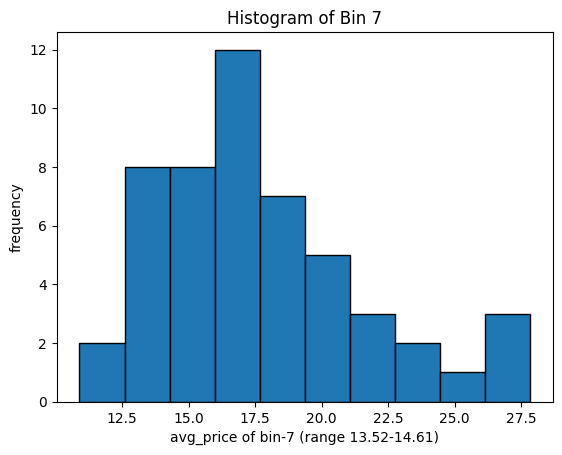

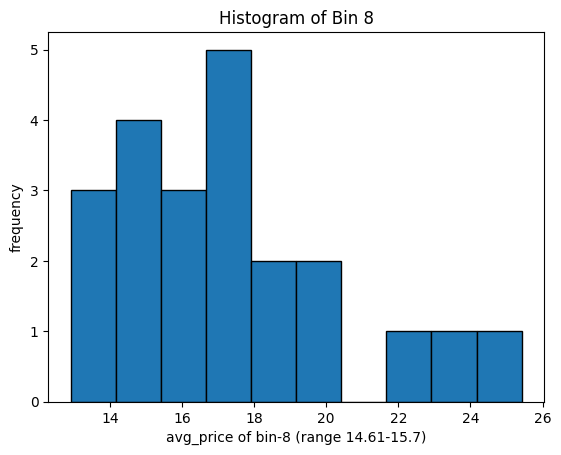

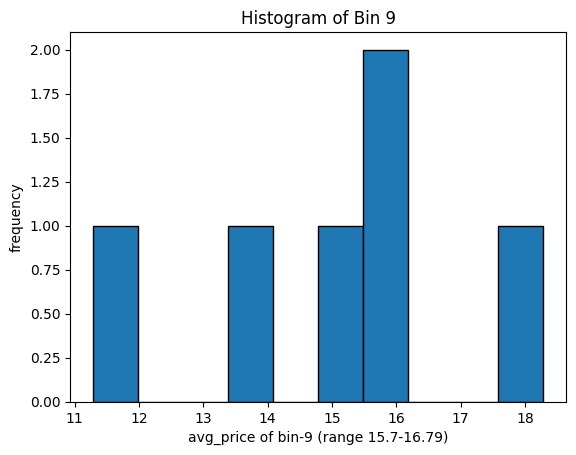

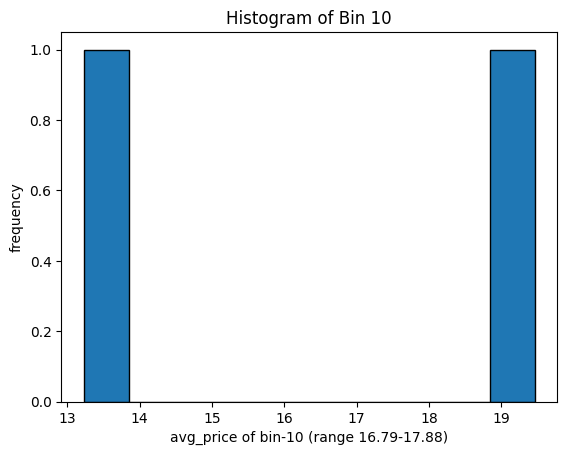

6.981
17.85
1.09


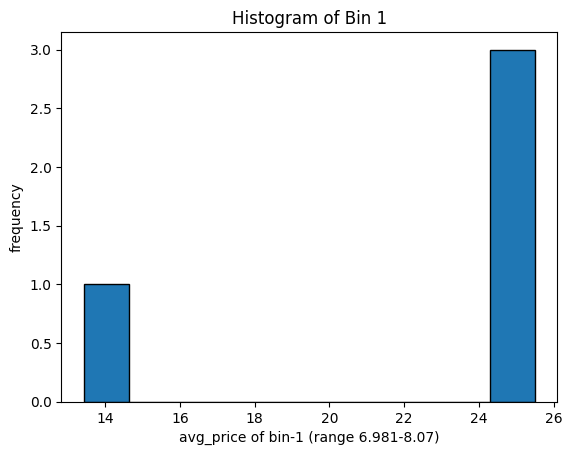

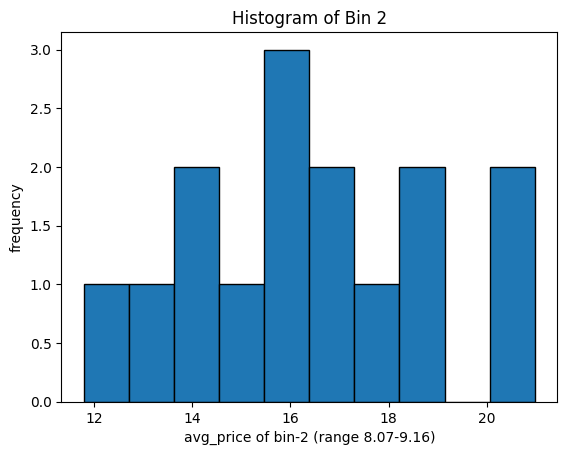

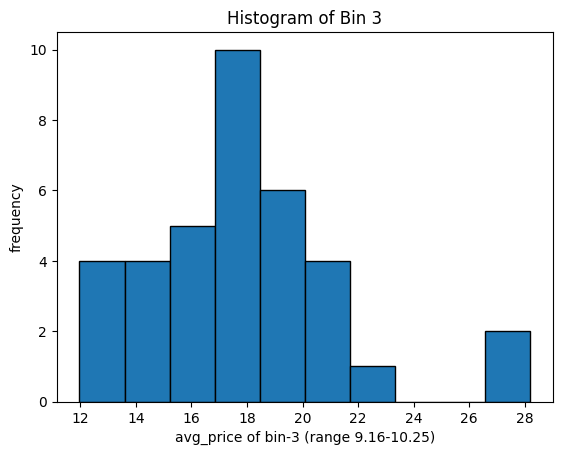

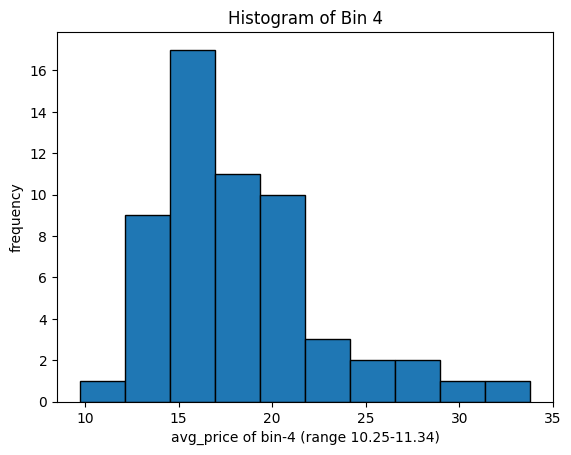

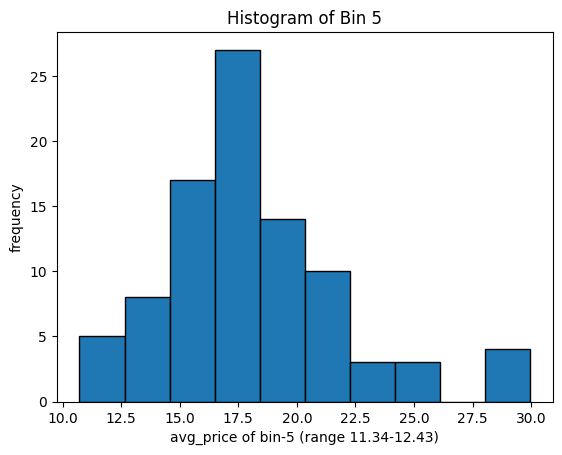

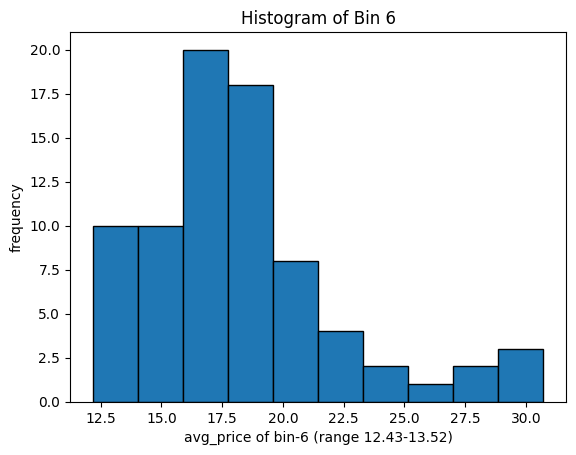

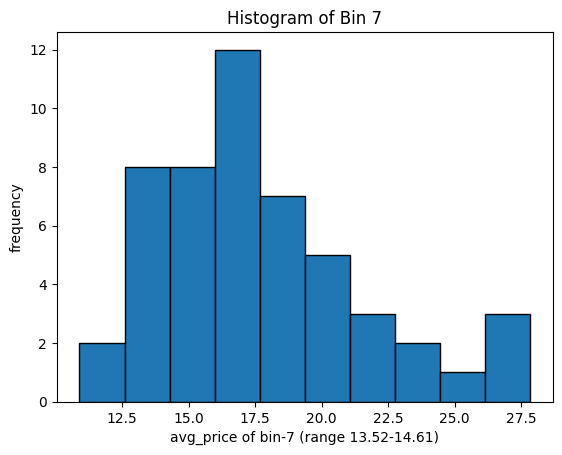

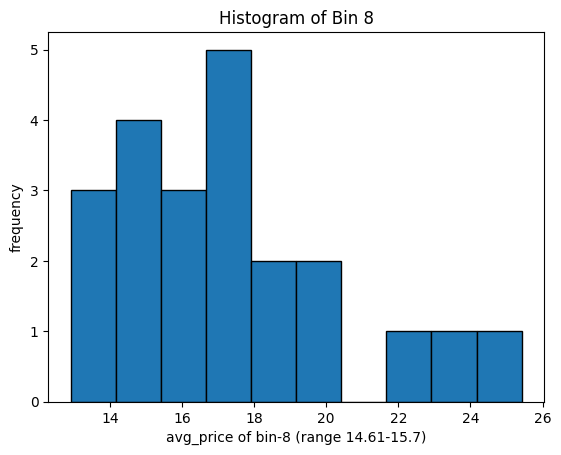

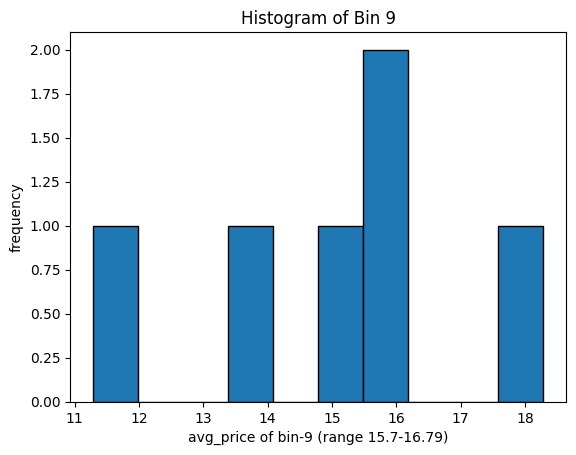

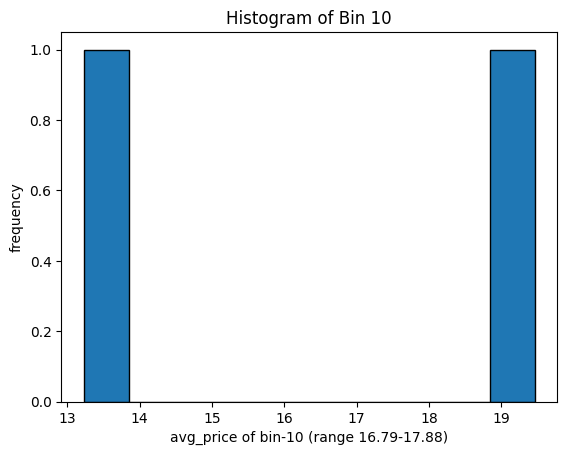

6.981
17.85
1.09


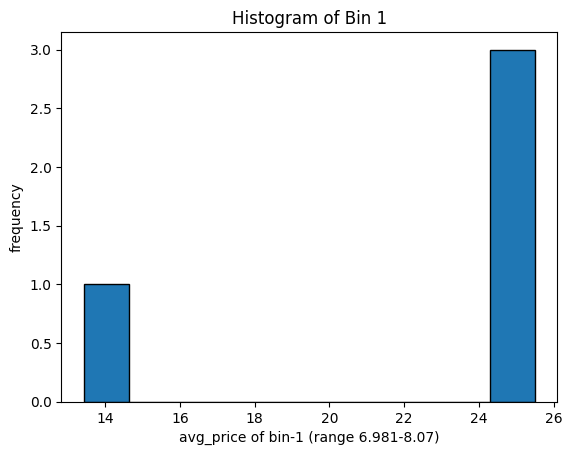

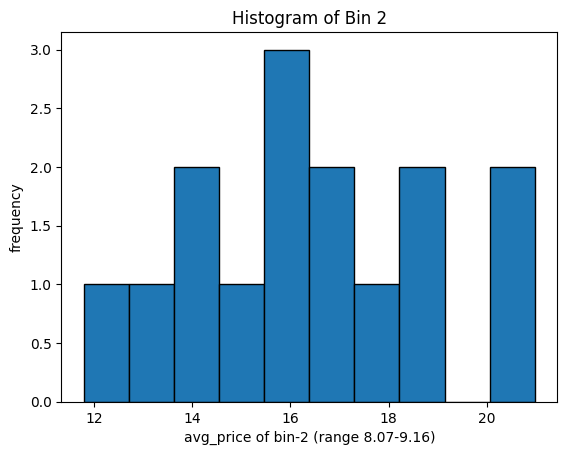

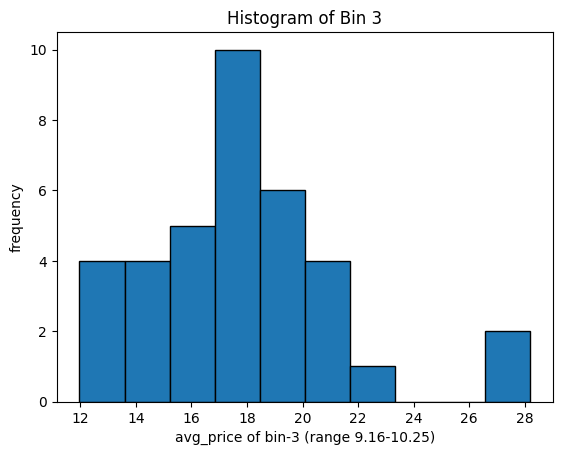

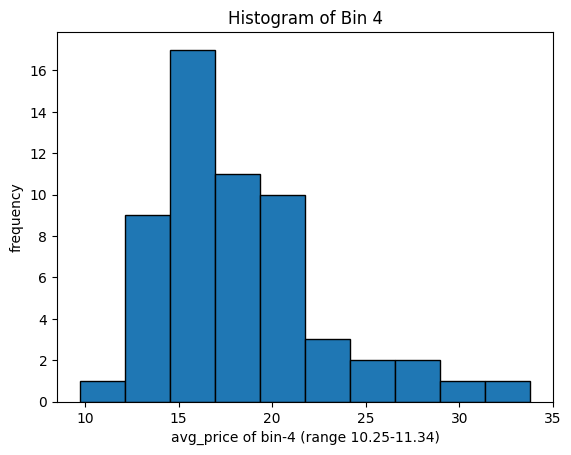

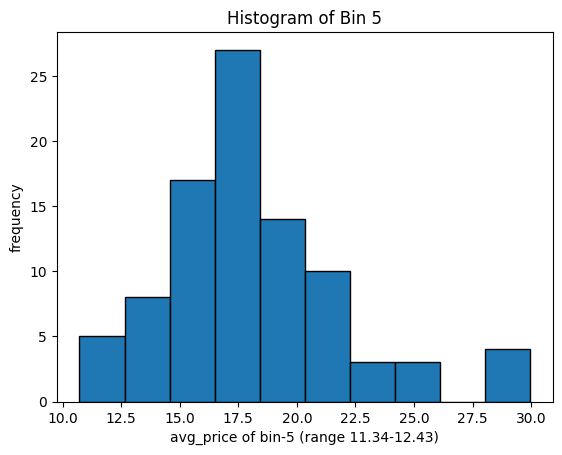

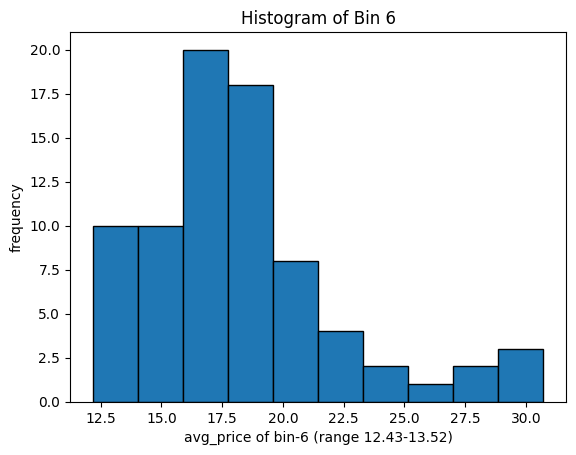

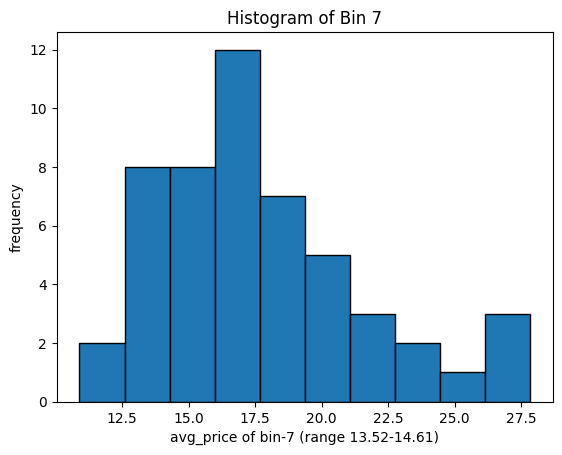

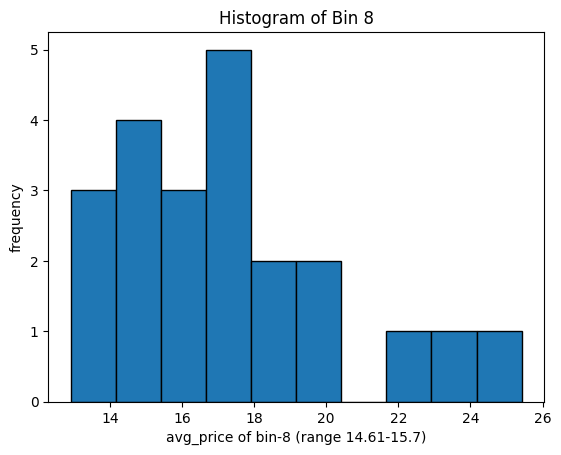

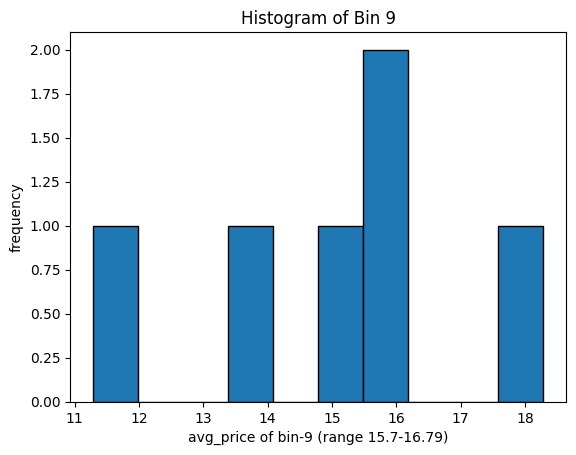

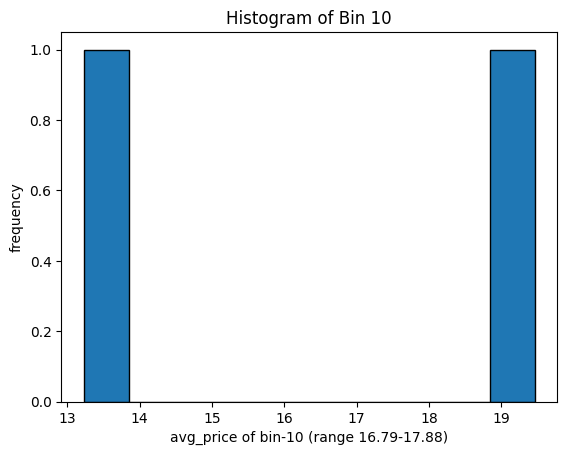

6.981
17.85
1.09


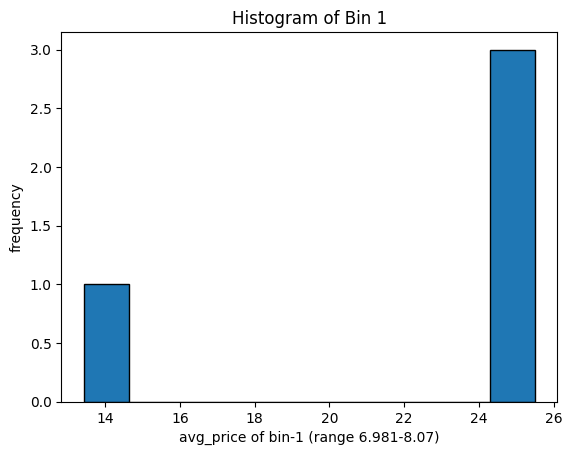

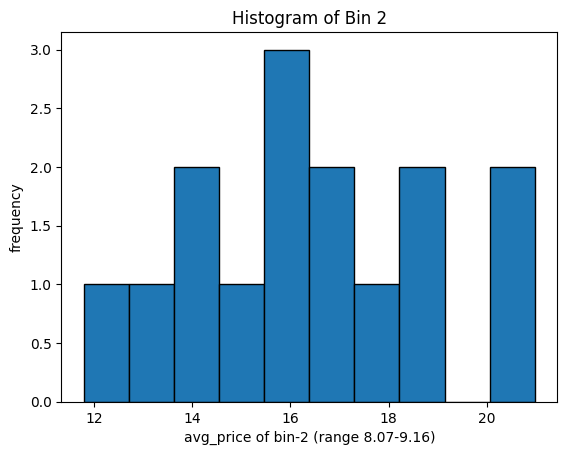

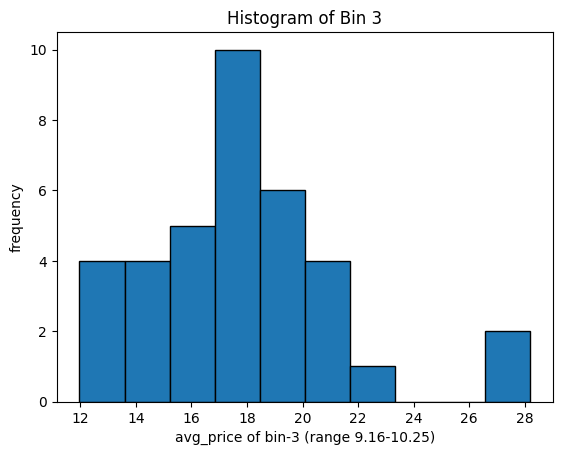

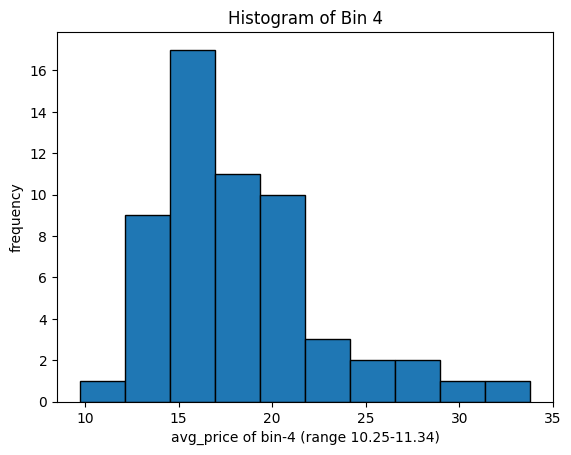

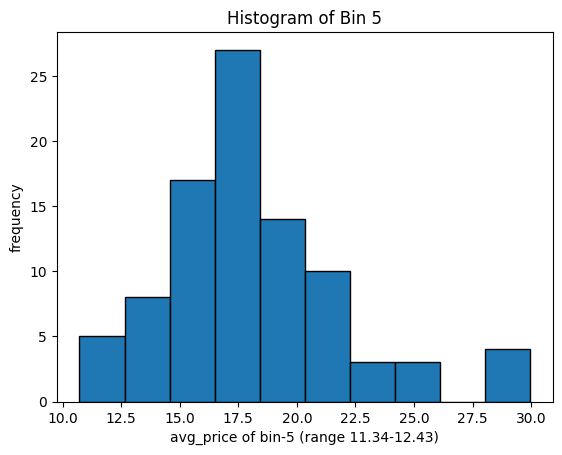

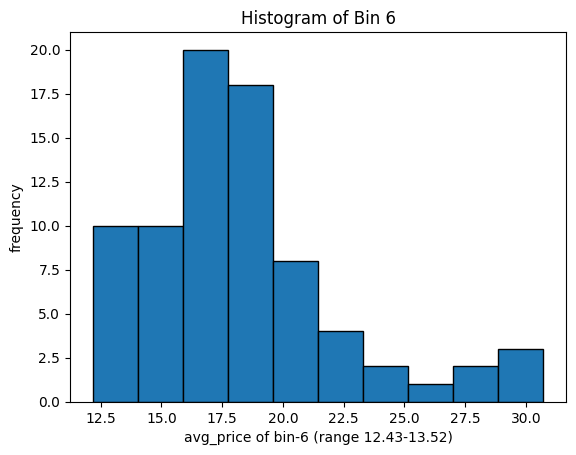

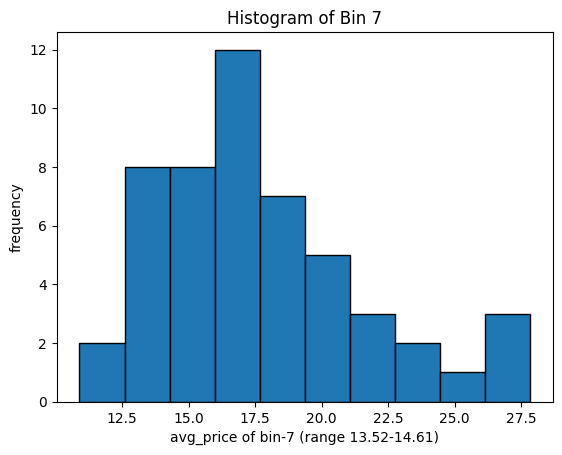

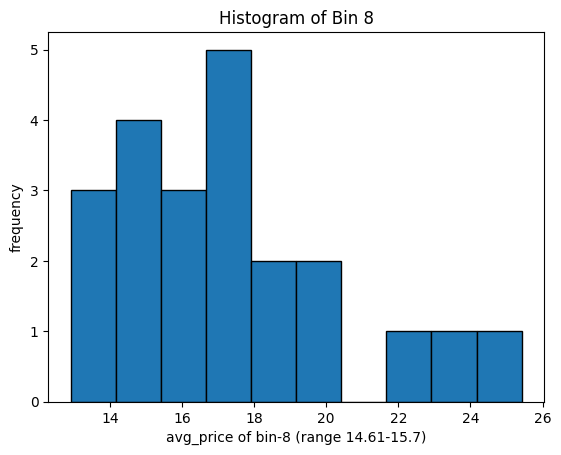

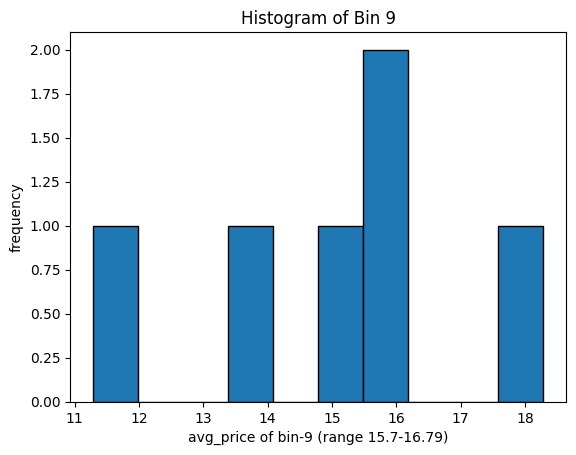

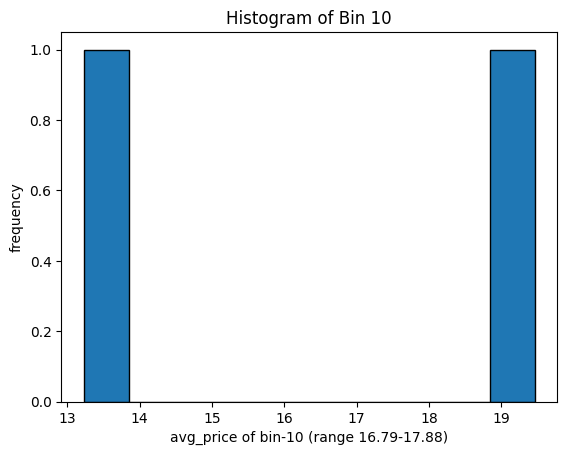

In [ ]:
bins = 10
with PdfPages("./cancerGraphs/cancerColumens.pdf") as pdf:
    for i in range(len(numdata.columns)):
        plt.title(f'column {i+1}')
        plt.hist(numdata.iloc[:,i].values,bins=bins,edgecolor='black')
        plt.ylabel('Frequency')
        plt.xlabel(numdata.columns[i])
        pdf.savefig()
        plt.close()

        max_value = numdata.iloc[:,0].max()
        min_value = numdata.iloc[:,0].min()
        start = min_value
        binrange = round((max_value - min_value) / bins, 2)
        print(min_value)
        print(max_value)
        print(binrange)
        with PdfPages(f"./cancerGraphs/subgraphs{i}.pdf") as pdf:
            for i in range(bins):
                offset = round(start + binrange, 2)
                        
                new_numdata = numdata[(numdata.iloc[:,0] >= start) & (numdata.iloc[:,0] <= offset)]
                        
                plt.hist(new_numdata.iloc[:,1], bins=10, edgecolor='black')
                plt.title(f"Histogram of Bin {i+1}")
                plt.xlabel(f'avg_price of bin-{i+1} (range {start}-{offset})')
                plt.ylabel('frequency')
                pdf.savefig()
                plt.show()
                plt.close()  
                        
                start = round(start + binrange, 2)